In [1]:
# Sample API
import flowx

In [2]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = -0.5, 0.5
ymin, ymax = -0.5, 0.5

# Define cell-centered variable names
center_vars = ["pres", "divv", "ibmf", "ibmx", "ibmy", "delp"]
face_vars = ["velc", "hvar"]
ins_vars = ["velc", "hvar", "divv", "pres", "delp"]
poisson_vars = ["delp", "divv"]
imbound_vars = ["ibmf", "velc", "ibmx", "ibmy"]

scalar_info = dict(tmax=5, dt=0.001, Re=100.0, Re_s=10.0, mu_s=1.0)

simulation_info = dict(
    with_ib=True, ib_type="visco", extrap_solid=10, mappin_type="shapely"
)

particle_info = [dict(input="HDF5", file="sm_body.00001.h5")]

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(
    delp=["neumann", "neumann", "neumann", "neumann"],
    ibmf=["projection", "projection", "projection", "projection"],
    ibmx=["projection", "projection", "projection", "projection"],
    ibmy=["projection", "projection", "projection", "projection"],
)

bc_val_center = dict(delp=[0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc=["dirichlet", "dirichlet", "dirichlet", "dirichlet"])
bc_val_facex = dict(velc=[0.0, 0.0, 0.0, 1.0])

bc_type_facey = dict(velc=["dirichlet", "dirichlet", "dirichlet", "dirichlet"])
bc_val_facey = dict(velc=[0.0, 0.0, 0.0, 0.0])

# Create the grid and data
gridc, gridx, gridy, scalars, particles = flowx.domain.Domain(
    nx,
    ny,
    xmin,
    xmax,
    ymin,
    ymax,
    center_vars,
    face_vars,
    scalar_info,
    particle_info,
    bc_type_center=bc_type_center,
    bc_val_center=bc_val_center,
    bc_type_facex=bc_type_facex,
    bc_val_facex=bc_val_facex,
    bc_type_facey=bc_type_facey,
    bc_val_facey=bc_val_facey,
)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson.Poisson(gridc, poisson_vars, poisson_info=simulation_info)

imbound = flowx.imbound.ImBound(
    domain_data_struct, imbound_vars, imbound_info=simulation_info
)

ins = flowx.ins.IncompNS(
    poisson, imbound, domain_data_struct, ins_vars, ins_info=simulation_info
)

In [3]:
imbound.map_to_grid()

Level Set Advection Time:  2.015298366546631
------------ Time = 0.0 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5484237111057293e-11
Total poisson time : 0.0003941059112548828
Total INS time : 1.0145621299743652
Max, Min, U   : 2.0, -0.009552906204103992
Max, Min, V   : 0.02396714772440395, -0.02396714772440395
Max, Min, P   : 2.6819901736370393, -2.782122858835436
Max, Min, DIV : 2.5118795932144167e-15, -2.671474153004283e-15
Qin, Qout     : 0.0, 0.0




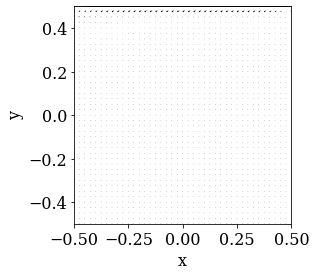

Level Set Advection Time:  0.004445075988769531
------------ Time = 0.001 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.50800142961916e-12
Total poisson time : 0.00032591819763183594
Total INS time : 0.003652334213256836
Max, Min, U   : 2.0, -0.014553364608420166
Max, Min, V   : 0.03765620283884879, -0.03765620283884879
Max, Min, P   : 1.7148901689036353, -1.7771068856858054
Max, Min, DIV : 8.881784197001252e-16, -1.0581813203458523e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004406929016113281
------------ Time = 0.002 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7604926278513186e-13
Total poisson time : 0.00025153160095214844
Total INS time : 0.003442049026489258
Max, Min, U   : 2.0, -0.019239892835103647
Max, Min, V   : 0.050827777922502426, -0.050827777922502426
Max, Min, P   : 1.6967947449513625, -1.7556063342814274
Max, Min, DIV : 4.996003610813204e-16, -3.0184188481996443e-16
Qin, Qout     :

Level Set Advection Time:  0.004209756851196289
------------ Time = 0.025000000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.147839906955824e-13
Total poisson time : 0.0002224445343017578
Total INS time : 0.004220247268676758
Max, Min, U   : 2.0, -0.0759243816512295
Max, Min, V   : 0.21434124728488982, -0.21434124728488982
Max, Min, P   : 1.386562765510069, -1.232738258301327
Max, Min, DIV : 1.887379141862766e-15, -1.7763568394002505e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00419306755065918
------------ Time = 0.026000000000000016 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.656093037234111e-13
Total poisson time : 0.000225067138671875
Total INS time : 0.003376483917236328
Max, Min, U   : 2.0, -0.07767446072288683
Max, Min, V   : 0.21792528250073834, -0.21792528250073834
Max, Min, P   : 1.3904136610233329, -1.208121365645482
Max, Min, DIV : 1.8257964584655895e-15, -1.9801868478275253e

Level Set Advection Time:  0.004697561264038086
------------ Time = 0.04900000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.748174051235234e-13
Total poisson time : 0.00022149085998535156
Total INS time : 0.0033311843872070312
Max, Min, U   : 2.0, -0.10141343127692544
Max, Min, V   : 0.2685981758435207, -0.2685981758435207
Max, Min, P   : 1.2575336287566312, -1.0317001155550543
Max, Min, DIV : 3.608224830031759e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004195213317871094
------------ Time = 0.05000000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3444904332300704e-13
Total poisson time : 0.00022363662719726562
Total INS time : 0.0032558441162109375
Max, Min, U   : 2.0, -0.10187324040064359
Max, Min, V   : 0.26990543695620783, -0.26990543695620783
Max, Min, P   : 1.2580667703053927, -1.022753791190885
Max, Min, DIV : 3.573530360512223e-15, -3.7816971776294

Level Set Advection Time:  0.004775524139404297
------------ Time = 0.07300000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.440989783745526e-13
Total poisson time : 0.00022363662719726562
Total INS time : 0.003919363021850586
Max, Min, U   : 2.0, -0.11851522398139169
Max, Min, V   : 0.2902096851313606, -0.2902096851313606
Max, Min, P   : 1.180506387033698, -0.9658257844911462
Max, Min, DIV : 3.0600522116230877e-15, -2.772955476348926e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0041849613189697266
------------ Time = 0.07400000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0772610016843676e-13
Total poisson time : 0.00022649765014648438
Total INS time : 0.0037894248962402344
Max, Min, U   : 2.0, -0.11911915992215294
Max, Min, V   : 0.2907939231040428, -0.2907939231040428
Max, Min, P   : 1.1687259921796822, -0.9736026858166678
Max, Min, DIV : 3.885780586188048e-15, -3.71924713249427

Level Set Advection Time:  0.004674434661865234
------------ Time = 0.09700000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.490811200502989e-13
Total poisson time : 0.00022101402282714844
Total INS time : 0.003313302993774414
Max, Min, U   : 2.0, -0.1281290584395311
Max, Min, V   : 0.30051010272742323, -0.30051010272742323
Max, Min, P   : 1.2138186147753465, -0.8601313752554478
Max, Min, DIV : 2.949029909160572e-15, -3.344546861683284e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004324436187744141
------------ Time = 0.09800000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.7437856125501014e-13
Total poisson time : 0.00022411346435546875
Total INS time : 0.003839731216430664
Max, Min, U   : 2.0, -0.12833685095402647
Max, Min, V   : 0.30081206037610464, -0.30081206037610464
Max, Min, P   : 1.2205992671524768, -0.8511571719421313
Max, Min, DIV : 2.9698465908722937e-15, -4.163336342344

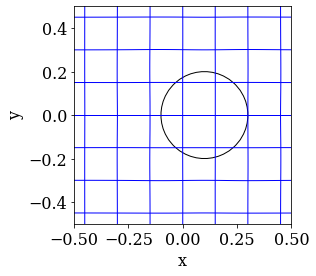

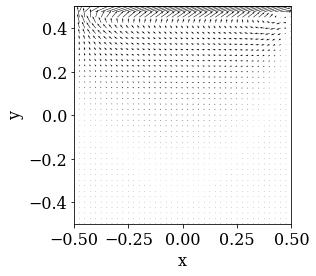

Level Set Advection Time:  0.004374980926513672
------------ Time = 0.10100000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.594577655891941e-13
Total poisson time : 0.00031113624572753906
Total INS time : 0.0035376548767089844
Max, Min, U   : 2.0, -0.12888276206098692
Max, Min, V   : 0.30167430123049993, -0.30167430123049993
Max, Min, P   : 1.203578438961194, -0.8618849371275572
Max, Min, DIV : 3.885780586188048e-15, -3.3029134982598407e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004311084747314453
------------ Time = 0.10200000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.338199819419318e-13
Total poisson time : 0.00025963783264160156
Total INS time : 0.003411531448364258
Max, Min, U   : 2.0, -0.12903974483666136
Max, Min, V   : 0.30194793133397657, -0.30194793133397657
Max, Min, P   : 1.1939979235852647, -0.8694589338337809
Max, Min, DIV : 3.552713678800501e-15, -3.885780586188

Level Set Advection Time:  0.004840373992919922
------------ Time = 0.12500000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.847076755784854e-13
Total poisson time : 0.0002346038818359375
Total INS time : 0.0033533573150634766
Max, Min, U   : 2.0, -0.13517597728831665
Max, Min, V   : 0.3067814673954119, -0.31958588445618763
Max, Min, P   : 1.1506658256964082, -0.876476608404672
Max, Min, DIV : 3.552713678800501e-15, -4.038436252074007e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0041484832763671875
------------ Time = 0.12600000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6023672640270272e-13
Total poisson time : 0.0003368854522705078
Total INS time : 0.0036575794219970703
Max, Min, U   : 2.0, -0.13552535107773522
Max, Min, V   : 0.3069419974437192, -0.3203107281424641
Max, Min, P   : 1.1547925668842502, -0.8711126815405795
Max, Min, DIV : 3.9968028886505635e-15, -4.44089209850062

Total INS time : 0.0037593841552734375
Max, Min, U   : 2.0, -0.14141140206938782
Max, Min, V   : 0.30989452573669973, -0.3345939155193396
Max, Min, P   : 1.1265610344722794, -0.876210706816849
Max, Min, DIV : 3.6914915568786455e-15, -4.0245584642661925e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004166841506958008
------------ Time = 0.1500000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5965685561330537e-13
Total poisson time : 0.00022983551025390625
Total INS time : 0.0038144588470458984
Max, Min, U   : 2.0, -0.14158169461335152
Max, Min, V   : 0.3099969095736983, -0.3351254358386698
Max, Min, P   : 1.1308225087150006, -0.8711351351077588
Max, Min, DIV : 3.3150565625916784e-15, -2.976785484776201e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0041599273681640625
------------ Time = 0.1510000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.327890608982692e-13
Total poi

Level Set Advection Time:  0.005063772201538086
------------ Time = 0.17300000000000013 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.405570667564194e-14
Total poisson time : 0.0002238750457763672
Total INS time : 0.004053354263305664
Max, Min, U   : 2.0, -0.14385572499652194
Max, Min, V   : 0.31194127403077226, -0.3471186742266266
Max, Min, P   : 1.0483414014169048, -0.9380667547251607
Max, Min, DIV : 3.3306690738754696e-15, -3.219646771412954e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004180192947387695
------------ Time = 0.17400000000000013 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.849663255600142e-13
Total poisson time : 0.0005578994750976562
Total INS time : 0.008174657821655273
Max, Min, U   : 2.0, -0.14389025592643395
Max, Min, V   : 0.31201098392170973, -0.3477750891848433
Max, Min, P   : 1.0327199524681183, -0.953130000720309
Max, Min, DIV : 3.608224830031759e-15, -3.552713678800501e-

Level Set Advection Time:  0.004221677780151367
------------ Time = 0.19700000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.0934653880063197e-13
Total poisson time : 0.0002288818359375
Total INS time : 0.003979921340942383
Max, Min, U   : 2.0, -0.1480975993135136
Max, Min, V   : 0.31636942755808917, -0.36144744660706396
Max, Min, P   : 0.9582458596583222, -1.0168079134646977
Max, Min, DIV : 3.66720542821497e-15, -3.1086244689504383e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004172801971435547
------------ Time = 0.19800000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0372497157361386e-12
Total poisson time : 0.00022983551025390625
Total INS time : 0.003409862518310547
Max, Min, U   : 2.0, -0.14829734644031456
Max, Min, V   : 0.31655137718062454, -0.36198563560467284
Max, Min, P   : 0.929385840345051, -1.0452761756005342
Max, Min, DIV : 3.191891195797325e-15, -3.3029134982598407e

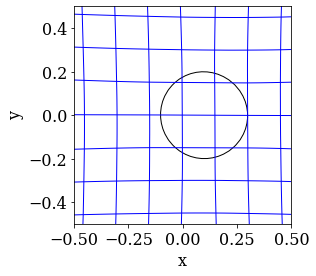

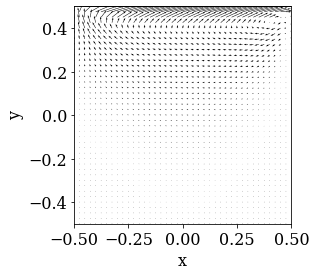

Level Set Advection Time:  0.004374027252197266
------------ Time = 0.20100000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3701857649679385e-13
Total poisson time : 0.00031304359436035156
Total INS time : 0.003518342971801758
Max, Min, U   : 2.0, -0.14887266884848424
Max, Min, V   : 0.3170864663157212, -0.3635748527361017
Max, Min, P   : 0.9401725065907853, -1.033346276992139
Max, Min, DIV : 2.8302013510561608e-15, -3.8719027983802334e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004375934600830078
------------ Time = 0.20200000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.240971062093659e-14
Total poisson time : 0.0002396106719970703
Total INS time : 0.003991603851318359
Max, Min, U   : 2.0, -0.14905655991034064
Max, Min, V   : 0.31726132818292047, -0.3640962970975627
Max, Min, P   : 0.9414051651841647, -1.0317433251968424
Max, Min, DIV : 3.552713678800501e-15, -3.941291737419306

Level Set Advection Time:  0.004971742630004883
------------ Time = 0.22400000000000017 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.356138640244864e-14
Total poisson time : 0.00022268295288085938
Total INS time : 0.0036630630493164062
Max, Min, U   : 2.0, -0.15216443671312135
Max, Min, V   : 0.3207150350645128, -0.37461181154567286
Max, Min, P   : 0.8823618221768044, -1.0838411701267254
Max, Min, DIV : 4.232725281383409e-15, -4.017619570362285e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00431513786315918
------------ Time = 0.22500000000000017 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.961305890672527e-13
Total poisson time : 0.0002243518829345703
Total INS time : 0.003784656524658203
Max, Min, U   : 2.0, -0.15226556761776744
Max, Min, V   : 0.3208559912019903, -0.3750498818137121
Max, Min, P   : 0.8956465080770363, -1.0702893027712364
Max, Min, DIV : 4.0245584642661925e-15, -3.608224830031759e

Level Set Advection Time:  0.004914760589599609
------------ Time = 0.2480000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.187676332951895e-13
Total poisson time : 0.00022149085998535156
Total INS time : 0.0033195018768310547
Max, Min, U   : 2.0, -0.15374012816936627
Max, Min, V   : 0.3237826411520404, -0.3843078654238145
Max, Min, P   : 0.8266933385048445, -1.1340367040177648
Max, Min, DIV : 3.1086244689504383e-15, -3.858025010572419e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004343509674072266
------------ Time = 0.2490000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.072436336518062e-13
Total poisson time : 0.00022459030151367188
Total INS time : 0.0033292770385742188
Max, Min, U   : 2.0, -0.15376976564574238
Max, Min, V   : 0.32389751721065746, -0.3846776701715158
Max, Min, P   : 0.840919458589998, -1.11962072882454
Max, Min, DIV : 4.107825191113079e-15, -4.052314039881821e-1

Level Set Advection Time:  0.0048940181732177734
------------ Time = 0.2720000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.101223062111872e-13
Total poisson time : 0.00022363662719726562
Total INS time : 0.0032677650451660156
Max, Min, U   : 2.0, -0.15679762558359353
Max, Min, V   : 0.32630321312832633, -0.39253618111772204
Max, Min, P   : 0.8013962633713602, -1.1554633482722554
Max, Min, DIV : 3.622102617839573e-15, -4.1043557441611256e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004271268844604492
------------ Time = 0.2730000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.061973437358198e-13
Total poisson time : 0.00022411346435546875
Total INS time : 0.003421783447265625
Max, Min, U   : 2.0, -0.15697366989527556
Max, Min, V   : 0.32639844893229997, -0.3928518243645672
Max, Min, P   : 0.7934988166427541, -1.1632276791548655
Max, Min, DIV : 4.3576253716537394e-15, -4.260480856999

Level Set Advection Time:  0.004972934722900391
------------ Time = 0.2960000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6856104292158923e-13
Total poisson time : 0.0002224445343017578
Total INS time : 0.0033540725708007812
Max, Min, U   : 2.0, -0.1604245275165983
Max, Min, V   : 0.3284071001655764, -0.39959171803059484
Max, Min, P   : 0.8538419619114516, -1.100332103492571
Max, Min, DIV : 3.816391647148976e-15, -3.573530360512223e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004319429397583008
------------ Time = 0.2970000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6655257225123347e-13
Total poisson time : 0.0002238750457763672
Total INS time : 0.0037255287170410156
Max, Min, U   : 2.0, -0.1605496745873055
Max, Min, V   : 0.3284871841935351, -0.3998637391225314
Max, Min, P   : 0.8613541599203302, -1.0927292559146085
Max, Min, DIV : 3.83026943495679e-15, -4.218847493575595e-15


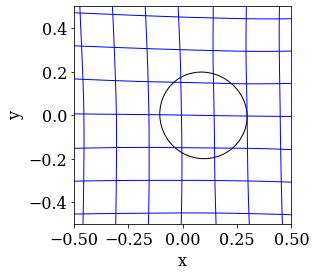

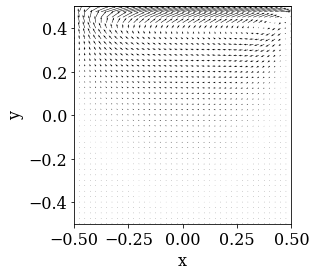

Level Set Advection Time:  0.004350900650024414
------------ Time = 0.3010000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1268764664925944e-13
Total poisson time : 0.0003135204315185547
Total INS time : 0.003545522689819336
Max, Min, U   : 2.0, -0.16103057083337993
Max, Min, V   : 0.3288020300987049, -0.4009356684150881
Max, Min, P   : 0.8582474618177145, -1.095488483640443
Max, Min, DIV : 3.941291737419306e-15, -3.2404634531246757e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004298686981201172
------------ Time = 0.3020000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.151716978113988e-13
Total poisson time : 0.00023984909057617188
Total INS time : 0.0034637451171875
Max, Min, U   : 2.0, -0.16114592831302027
Max, Min, V   : 0.32887939578734593, -0.4011996791229678
Max, Min, P   : 0.8338381351309792, -1.119814649371852
Max, Min, DIV : 3.9968028886505635e-15, -3.903127820947816e-15


Level Set Advection Time:  0.004850864410400391
------------ Time = 0.32500000000000023 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.093309567610106e-14
Total poisson time : 0.00022101402282714844
Total INS time : 0.00395512580871582
Max, Min, U   : 2.0, -0.16329044562801942
Max, Min, V   : 0.3305230377184754, -0.4068658995165939
Max, Min, P   : 0.806119647936155, -1.1459858189095864
Max, Min, DIV : 3.774758283725532e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004225254058837891
------------ Time = 0.32600000000000023 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9989999953409224e-14
Total poisson time : 0.00022482872009277344
Total INS time : 0.0037660598754882812
Max, Min, U   : 2.0, -0.16336268662129635
Max, Min, V   : 0.33058903562178227, -0.4070957433158368
Max, Min, P   : 0.8068058527756474, -1.1452472942935519
Max, Min, DIV : 3.925977381732948e-15, -3.1086244689504383

Level Set Advection Time:  0.004762411117553711
------------ Time = 0.34900000000000025 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.036955385930485e-13
Total poisson time : 0.00023317337036132812
Total INS time : 0.003942728042602539
Max, Min, U   : 2.0, -0.16458739498206987
Max, Min, V   : 0.3319979058949211, -0.4120461712280407
Max, Min, P   : 0.8135010477290682, -1.1376349017762606
Max, Min, DIV : 3.608224830031759e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004472017288208008
------------ Time = 0.35000000000000026 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.896598290013445e-14
Total poisson time : 0.00022292137145996094
Total INS time : 0.003297567367553711
Max, Min, U   : 2.0, -0.16462268078375178
Max, Min, V   : 0.3320547522402331, -0.4122476975026135
Max, Min, P   : 0.8115374263082872, -1.139570203399749
Max, Min, DIV : 2.9950000812739574e-15, -3.776493007201509e-

Level Set Advection Time:  0.004934072494506836
------------ Time = 0.3730000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.2093729106898666e-13
Total poisson time : 0.00022101402282714844
Total INS time : 0.003699064254760742
Max, Min, U   : 2.0, -0.16730567284281667
Max, Min, V   : 0.3332733912070119, -0.41660198239119295
Max, Min, P   : 0.8393735244714118, -1.1113063475610565
Max, Min, DIV : 3.858025010572419e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0045490264892578125
------------ Time = 0.3740000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.5131875642596847e-13
Total poisson time : 0.00022172927856445312
Total INS time : 0.0033216476440429688
Max, Min, U   : 2.0, -0.1674244781400896
Max, Min, V   : 0.33332276490661983, -0.4167797945448956
Max, Min, P   : 0.8275453722410683, -1.1231251333231704
Max, Min, DIV : 3.6914915568786455e-15, -3.9551695252271

Level Set Advection Time:  0.004892587661743164
------------ Time = 0.3960000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.147047335039778e-13
Total poisson time : 0.00023698806762695312
Total INS time : 0.004230976104736328
Max, Min, U   : 2.0, -0.16970274944745714
Max, Min, V   : 0.33434158489514293, -0.42047378495575977
Max, Min, P   : 0.8983072140959152, -1.0523280780666813
Max, Min, DIV : 3.566591466608315e-15, -4.052314039881821e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004407644271850586
------------ Time = 0.3970000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.144504625879123e-14
Total poisson time : 0.00025200843811035156
Total INS time : 0.0040585994720458984
Max, Min, U   : 2.0, -0.16979153238664674
Max, Min, V   : 0.33438502000811154, -0.42063232627466174
Max, Min, P   : 0.8978695087148482, -1.0527707579572143
Max, Min, DIV : 4.010680676458378e-15, -4.10782519111307

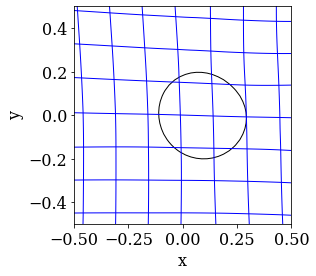

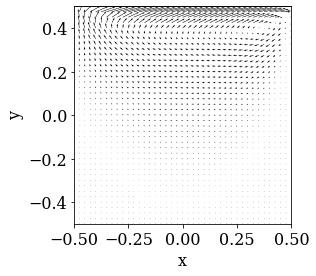

Level Set Advection Time:  0.004408597946166992
------------ Time = 0.4010000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5826874353541105e-13
Total poisson time : 0.00031065940856933594
Total INS time : 0.0035486221313476562
Max, Min, U   : 2.0, -0.1701343086270256
Max, Min, V   : 0.3345564275257663, -0.42125883139588743
Max, Min, P   : 0.8606979135413662, -1.0899677642539198
Max, Min, DIV : 4.0245584642661925e-15, -3.3003114130458755e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004386186599731445
------------ Time = 0.4020000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.855281388267546e-13
Total poisson time : 0.00026726722717285156
Total INS time : 0.003474712371826172
Max, Min, U   : 2.0, -0.17021694135461649
Max, Min, V   : 0.3345987047775677, -0.4214135678983217
Max, Min, P   : 0.8334861648839144, -1.1171872185384897
Max, Min, DIV : 3.927413949611491e-15, -4.107825191113079

Level Set Advection Time:  0.004883289337158203
------------ Time = 0.4240000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3935017429412836e-13
Total poisson time : 0.00024962425231933594
Total INS time : 0.0033829212188720703
Max, Min, U   : 2.0, -0.1717374580753048
Max, Min, V   : 0.3354743347310008, -0.42463738656542394
Max, Min, P   : 0.8832759764063446, -1.0676901921972575
Max, Min, DIV : 3.70536934468646e-15, -4.100886297209172e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004349470138549805
------------ Time = 0.4250000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.883453800975693e-13
Total poisson time : 0.0002505779266357422
Total INS time : 0.0038573741912841797
Max, Min, U   : 2.0, -0.1717935591032325
Max, Min, V   : 0.335511796511249, -0.42477613402715353
Max, Min, P   : 0.8756382484564018, -1.0753428392015338
Max, Min, DIV : 3.552713678800501e-15, -3.1502578323738817e-1

Level Set Advection Time:  0.004920244216918945
------------ Time = 0.44700000000000034 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0662800216029547e-13
Total poisson time : 0.00023293495178222656
Total INS time : 0.004006147384643555
Max, Min, U   : 2.0, -0.1727628608313531
Max, Min, V   : 0.3362897097197017, -0.4276727885191741
Max, Min, P   : 0.8531421911730119, -1.0983408619139132
Max, Min, DIV : 3.677613769070831e-15, -3.913536161803677e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043795108795166016
------------ Time = 0.44800000000000034 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.227559357560644e-13
Total poisson time : 0.0002465248107910156
Total INS time : 0.004494428634643555
Max, Min, U   : 2.0, -0.1727953141256757
Max, Min, V   : 0.3363230781232333, -0.4277977122799332
Max, Min, P   : 0.8776624072504566, -1.0738482740736823
Max, Min, DIV : 4.08006961549745e-15, -4.135580766728708e-15

Level Set Advection Time:  0.005815267562866211
------------ Time = 0.47000000000000036 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0409523580591555e-13
Total poisson time : 0.0002689361572265625
Total INS time : 0.004843950271606445
Max, Min, U   : 2.0, -0.17386564320671258
Max, Min, V   : 0.3370176723659776, -0.4304107510420766
Max, Min, P   : 0.8214205481537767, -1.130764443636787
Max, Min, DIV : 4.277828091758806e-15, -3.3861802251067274e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004385232925415039
------------ Time = 0.47100000000000036 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.204229190642761e-14
Total poisson time : 0.00025844573974609375
Total INS time : 0.0034532546997070312
Max, Min, U   : 2.0, -0.17396392774190717
Max, Min, V   : 0.33704754388471964, -0.4305236686364499
Max, Min, P   : 0.8235005225157684, -1.128719246847214
Max, Min, DIV : 3.969047313034935e-15, -3.920475055707584e

Level Set Advection Time:  0.004898548126220703
------------ Time = 0.4930000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.42633330587717e-13
Total poisson time : 0.000232696533203125
Total INS time : 0.0034918785095214844
Max, Min, U   : 2.0, -0.17589481595128703
Max, Min, V   : 0.3376705229903332, -0.4328894408337494
Max, Min, P   : 0.8834225217026617, -1.0696293734633124
Max, Min, DIV : 4.0592529337857286e-15, -3.4746511223815446e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004378557205200195
------------ Time = 0.4940000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.440611900007555e-13
Total poisson time : 0.00024199485778808594
Total INS time : 0.003796100616455078
Max, Min, U   : 2.0, -0.17597233865329978
Max, Min, V   : 0.3376973619994093, -0.43299183216606796
Max, Min, P   : 0.898337364236886, -1.0547551848657422
Max, Min, DIV : 4.014150123410332e-15, -4.232725281383409e-15

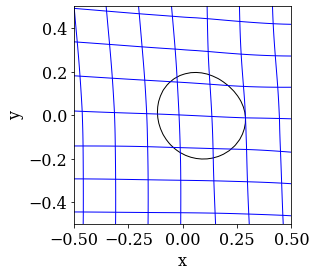

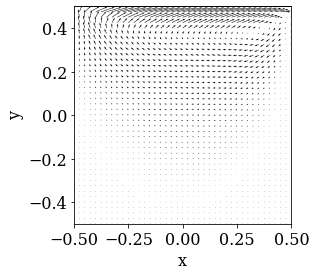

Level Set Advection Time:  0.004448413848876953
------------ Time = 0.5010000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3390410765895726e-14
Total poisson time : 0.0003097057342529297
Total INS time : 0.0036034584045410156
Max, Min, U   : 2.0, -0.17649088747411865
Max, Min, V   : 0.33788185308217766, -0.43369673429029293
Max, Min, P   : 0.9507768944334704, -1.0026065076826338
Max, Min, DIV : 3.58046925441613e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004392385482788086
------------ Time = 0.5020000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.03683772985413e-13
Total poisson time : 0.00024437904357910156
Total INS time : 0.004303455352783203
Max, Min, U   : 2.0, -0.17656155751487784
Max, Min, V   : 0.3379077345468326, -0.4337957713842058
Max, Min, P   : 0.937011680773987, -1.0164141436492484
Max, Min, DIV : 4.218847493575595e-15, -4.107825191113079e-1

Level Set Advection Time:  0.0049593448638916016
------------ Time = 0.5240000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.131486108495449e-13
Total poisson time : 0.00024247169494628906
Total INS time : 0.004068136215209961
Max, Min, U   : 2.0, -0.17790822214046748
Max, Min, V   : 0.3384488535442844, -0.435874941268536
Max, Min, P   : 0.7304408694958616, -1.2239717379493025
Max, Min, DIV : 4.08006961549745e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004705905914306641
------------ Time = 0.5250000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.297414779226695e-13
Total poisson time : 0.00023651123046875
Total INS time : 0.004078865051269531
Max, Min, U   : 2.0, -0.17796025375798566
Max, Min, V   : 0.3384722248319204, -0.43596511220315004
Max, Min, P   : 0.7085076761951776, -1.2459520076928858
Max, Min, DIV : 4.0245584642661925e-15, -3.552713678800501e-15
Q

Level Set Advection Time:  0.004795551300048828
------------ Time = 0.5470000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1157455291959637e-13
Total poisson time : 0.00023245811462402344
Total INS time : 0.0037424564361572266
Max, Min, U   : 2.0, -0.17891506461833542
Max, Min, V   : 0.3389617494024395, -0.4378608878551117
Max, Min, P   : 0.6348247439864615, -1.3207129658806722
Max, Min, DIV : 3.95516952522712e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004604339599609375
------------ Time = 0.5480000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.777253491930534e-14
Total poisson time : 0.00023508071899414062
Total INS time : 0.003504037857055664
Max, Min, U   : 2.0, -0.1789500958270615
Max, Min, V   : 0.3389829233000346, -0.4379432120380564
Max, Min, P   : 0.6324626712082508, -1.3231257882588539
Max, Min, DIV : 2.7755575615628914e-15, -3.982925100842749e-1



Level Set Advection Time:  0.00577855110168457
------------ Time = 0.5710000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.017815260106537e-13
Total poisson time : 0.00046753883361816406
Total INS time : 0.007371664047241211
Max, Min, U   : 2.0, -0.17956656982175884
Max, Min, V   : 0.339446290859823, -0.4397514320064173
Max, Min, P   : 0.582524242182787, -1.3742658321996946
Max, Min, DIV : 3.552713678800501e-15, -3.0253577421035516e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004410982131958008
------------ Time = 0.5720000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.241754334329384e-13
Total poisson time : 0.00023484230041503906
Total INS time : 0.0034394264221191406
Max, Min, U   : 2.0, -0.1795854318820685
Max, Min, V   : 0.3394654555176769, -0.43982649674739316
Max, Min, P   : 0.5686778558513046, -1.3881659177468377
Max, Min, DIV : 4.093947403305265e-15, -3.788636071533347e-1

Level Set Advection Time:  0.004644870758056641
------------ Time = 0.5930000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.953475493657079e-13
Total poisson time : 0.0002377033233642578
Total INS time : 0.0038633346557617188
Max, Min, U   : 2.0, -0.1798401107308156
Max, Min, V   : 0.3398504504078291, -0.44133929926300947
Max, Min, P   : 0.4746657000077159, -1.4833001527079264
Max, Min, DIV : 4.218847493575595e-15, -4.15639744844043e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00437164306640625
------------ Time = 0.5940000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.324393091632957e-13
Total poisson time : 0.0002357959747314453
Total INS time : 0.0038573741912841797
Max, Min, U   : 2.0, -0.17984566329749074
Max, Min, V   : 0.3398679891231239, -0.4414084291052931
Max, Min, P   : 0.46036819246251165, -1.4976533005560722
Max, Min, DIV : 3.462508058049707e-15, -3.733124920302089e-15


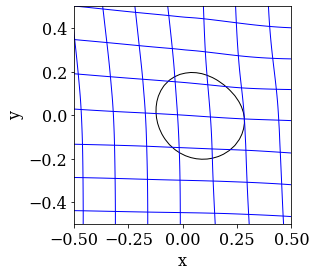

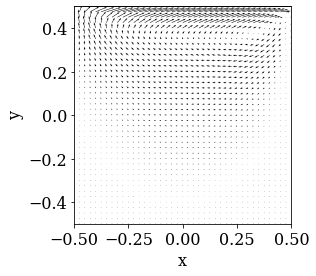

Level Set Advection Time:  0.0044634342193603516
------------ Time = 0.6010000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.2856388010418e-13
Total poisson time : 0.0003094673156738281
Total INS time : 0.003540515899658203
Max, Min, U   : 2.0, -0.18021260309878226
Max, Min, V   : 0.33998883308328504, -0.4418852681953946
Max, Min, P   : 0.37587919591702373, -1.5825317441605165
Max, Min, DIV : 4.163336342344337e-15, -3.2725558374302466e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004431962966918945
------------ Time = 0.6020000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4913111610687187e-13
Total poisson time : 0.00024437904357910156
Total INS time : 0.0039479732513427734
Max, Min, U   : 2.0, -0.18027766924450583
Max, Min, V   : 0.3400058250346752, -0.441952391847921
Max, Min, P   : 0.366572601253888, -1.5918950567780379
Max, Min, DIV : 3.9968028886505635e-15, -3.802513859341161e-

Level Set Advection Time:  0.005059480667114258
------------ Time = 0.6240000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9720310335438344e-13
Total poisson time : 0.0004901885986328125
Total INS time : 0.00795125961303711
Max, Min, U   : 2.0, -0.18155828046392905
Max, Min, V   : 0.3403635065705827, -0.4433693018613027
Max, Min, P   : 0.1684065627400527, -1.7913153449518784
Max, Min, DIV : 3.3029134982598407e-15, -3.219646771412954e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0044023990631103516
------------ Time = 0.6250000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.47867786204593e-14
Total poisson time : 0.00023317337036132812
Total INS time : 0.004023551940917969
Max, Min, U   : 2.0, -0.18160976605085352
Max, Min, V   : 0.3403790569385057, -0.44343108506615675
Max, Min, P   : 0.16616820973664104, -1.79361173855677
Max, Min, DIV : 4.11823353196894e-15, -3.864963904476326e-15




Level Set Advection Time:  0.0044193267822265625
------------ Time = 0.6480000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.568845834605962e-13
Total poisson time : 0.000232696533203125
Total INS time : 0.004190921783447266
Max, Min, U   : 2.0, -0.18263871942826218
Max, Min, V   : 0.34072087442451, -0.44479329204422
Max, Min, P   : 0.10246226538194923, -1.8586673178753959
Max, Min, DIV : 4.107825191113079e-15, -3.747002708109903e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004348039627075195
------------ Time = 0.6490000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3142463352756034e-13
Total poisson time : 0.0002334117889404297
Total INS time : 0.004168033599853516
Max, Min, U   : 2.0, -0.18267688549601835
Max, Min, V   : 0.34073507524281144, -0.44485005667113686
Max, Min, P   : 0.10602072351060945, -1.8551681453211977
Max, Min, DIV : 3.774758283725532e-15, -3.552713678800501e-1



Level Set Advection Time:  0.004396677017211914
------------ Time = 0.6710000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1396778525170692e-13
Total poisson time : 0.000232696533203125
Total INS time : 0.004210710525512695
Max, Min, U   : 2.0, -0.18338519230619604
Max, Min, V   : 0.3410345745277237, -0.4460504480187379
Max, Min, P   : 0.04073488219480742, -1.9217590084221923
Max, Min, DIV : 3.774758283725532e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004354000091552734
------------ Time = 0.6720000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.106449973477665e-15
Total poisson time : 0.0002338886260986328
Total INS time : 0.003455638885498047
Max, Min, U   : 2.0, -0.18341163965085064
Max, Min, V   : 0.34104762243902736, -0.44610288572049867
Max, Min, P   : 0.04107603701434683, -1.9214780466838315
Max, Min, DIV : 3.524958103184872e-15, -3.691491556878645

Level Set Advection Time:  0.004357814788818359
------------ Time = 0.6940000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2368752371849345e-14
Total poisson time : 0.0002334117889404297
Total INS time : 0.004716634750366211
Max, Min, U   : 2.0, -0.18387084509474644
Max, Min, V   : 0.34132324243070483, -0.44721300027467353
Max, Min, P   : -0.10255512686652056, -2.0664232178133424
Max, Min, DIV : 3.885780586188048e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043718814849853516
------------ Time = 0.6950000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.658190184831309e-13
Total poisson time : 0.00023674964904785156
Total INS time : 0.0034332275390625
Max, Min, U   : 2.0, -0.18388629187008296
Max, Min, V   : 0.34133526826080873, -0.4472615485937489
Max, Min, P   : -0.12484072117576116, -2.0887696268741083
Max, Min, DIV : 4.246603069191224e-15, -3.8857805861880

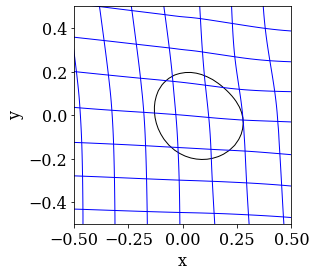

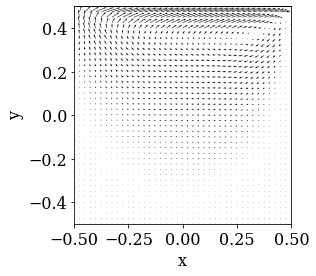

Level Set Advection Time:  0.004474163055419922
------------ Time = 0.7010000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0003289462488371e-12
Total poisson time : 0.00031185150146484375
Total INS time : 0.0037364959716796875
Max, Min, U   : 2.0, -0.18397003789727656
Max, Min, V   : 0.34140651788903076, -0.4475494470684341
Max, Min, P   : -0.12660670260935705, -2.090896951725323
Max, Min, DIV : 3.941291737419306e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0050504207611083984
------------ Time = 0.7020000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.815714802601226e-13
Total poisson time : 0.00024318695068359375
Total INS time : 0.0034754276275634766
Max, Min, U   : 2.0, -0.18398243850406173
Max, Min, V   : 0.3414182450674135, -0.44759687273479903
Max, Min, P   : -0.1546033293696315, -2.1189501747578867
Max, Min, DIV : 2.886579864025407e-15, -3.6567970873

Level Set Advection Time:  0.004375457763671875
------------ Time = 0.7240000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1665945346430336e-13
Total poisson time : 0.00023436546325683594
Total INS time : 0.003892183303833008
Max, Min, U   : 2.0, -0.18414795172925247
Max, Min, V   : 0.34166618067274257, -0.44860179766924857
Max, Min, P   : -0.127243711209709, -2.092945284820804
Max, Min, DIV : 2.7755575615628914e-15, -3.892719480091955e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004351377487182617
------------ Time = 0.7250000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.495961908518495e-13
Total poisson time : 0.00023484230041503906
Total INS time : 0.003813028335571289
Max, Min, U   : 2.0, -0.1841611191233644
Max, Min, V   : 0.341677007501384, -0.44864578366947866
Max, Min, P   : -0.14930691393898934, -2.1150699606274457
Max, Min, DIV : 3.885780586188048e-15, -3.760880495917718

Level Set Advection Time:  0.004373311996459961
------------ Time = 0.7480000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.586683695275173e-14
Total poisson time : 0.000232696533203125
Total INS time : 0.004607439041137695
Max, Min, U   : 2.0, -0.18435936908006673
Max, Min, V   : 0.3419161145557464, -0.44961936909902606
Max, Min, P   : -0.1231634860806341, -2.0903425267960762
Max, Min, DIV : 3.9968028886505635e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004358053207397461
------------ Time = 0.7490000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.783247053756005e-13
Total poisson time : 0.00023245811462402344
Total INS time : 0.003459453582763672
Max, Min, U   : 2.0, -0.18436358865973518
Max, Min, V   : 0.3419260947303942, -0.44966009754946495
Max, Min, P   : -0.1361531876921372, -2.1033938726683084
Max, Min, DIV : 3.774758283725532e-15, -3.823330541052883e



Level Set Advection Time:  0.004334211349487305
------------ Time = 0.7720000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.925689684116912e-13
Total poisson time : 0.0002353191375732422
Total INS time : 0.0042073726654052734
Max, Min, U   : 2.0, -0.18465196356772817
Max, Min, V   : 0.34214670686017723, -0.451903446255624
Max, Min, P   : -0.2785139597721668, -2.247144847341476
Max, Min, DIV : 3.1086244689504383e-15, -3.95516952522712e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00436711311340332
------------ Time = 0.7730000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.496122667443396e-13
Total poisson time : 0.00023365020751953125
Total INS time : 0.0034689903259277344
Max, Min, U   : 2.0, -0.18469035083985952
Max, Min, V   : 0.34215593672925404, -0.45201569109579737
Max, Min, P   : -0.2603886348626538, -2.2290769113549014
Max, Min, DIV : 3.3306690738754696e-15, -3.9968028886505

Level Set Advection Time:  0.004369258880615234
------------ Time = 0.7950000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.187119409505651e-13
Total poisson time : 0.00023674964904785156
Total INS time : 0.004458904266357422
Max, Min, U   : 2.0, -0.18544172398879658
Max, Min, V   : 0.34235158412362504, -0.4544114819141215
Max, Min, P   : -0.2584430691860997, -2.228470955927975
Max, Min, DIV : 3.1502578323738817e-15, -3.1502578323738817e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043566226959228516
------------ Time = 0.7960000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.5572615319459156e-13
Total poisson time : 0.00023937225341796875
Total INS time : 0.0040416717529296875
Max, Min, U   : 2.0, -0.18547179425192528
Max, Min, V   : 0.34236015238732287, -0.45451712367853425
Max, Min, P   : -0.24871816746484834, -2.218807289004299
Max, Min, DIV : 4.052314039881821e-15, -3.5527136788

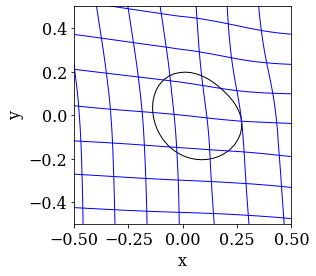

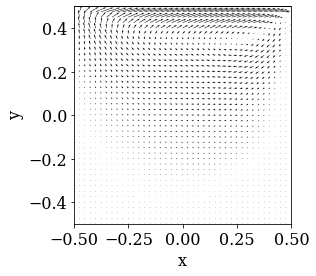

Level Set Advection Time:  0.004477262496948242
------------ Time = 0.8010000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.346127354169985e-14
Total poisson time : 0.0003261566162109375
Total INS time : 0.0036034584045410156
Max, Min, U   : 2.0, -0.18561688169139115
Max, Min, V   : 0.3424025850830382, -0.45504120606844123
Max, Min, P   : -0.2223287297028832, -2.192723820900571
Max, Min, DIV : 3.885780586188048e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043790340423583984
------------ Time = 0.8020000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.360260203289042e-13
Total poisson time : 0.00026226043701171875
Total INS time : 0.003505229949951172
Max, Min, U   : 2.0, -0.1856448541914234
Max, Min, V   : 0.34241099069157765, -0.4551452034234278
Max, Min, P   : -0.20775764627069954, -2.178213888691894
Max, Min, DIV : 3.4139358007223564e-15, -4.08484010505638



Level Set Advection Time:  0.004375934600830078
------------ Time = 0.8250000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.123172864476989e-13
Total poisson time : 0.0002536773681640625
Total INS time : 0.004298686981201172
Max, Min, U   : 2.0, -0.18619569575880648
Max, Min, V   : 0.3425971483181461, -0.4574640041221212
Max, Min, P   : -0.3729485535996906, -2.3447901572537346
Max, Min, DIV : 3.7192471324942744e-15, -4.3298697960381105e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004431009292602539
------------ Time = 0.8260000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.699518435661099e-14
Total poisson time : 0.0002472400665283203
Total INS time : 0.0037827491760253906
Max, Min, U   : 2.0, -0.18621568896944532
Max, Min, V   : 0.3426049445229677, -0.4575617351693295
Max, Min, P   : -0.3735648380186564, -2.3454671595579124
Max, Min, DIV : 4.246603069191224e-15, -3.71924713249427

Level Set Advection Time:  0.005756855010986328
------------ Time = 0.8480000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2176182773765133e-14
Total poisson time : 0.00025343894958496094
Total INS time : 0.0045318603515625
Max, Min, U   : 2.0, -0.1865804905724428
Max, Min, V   : 0.3427705971816745, -0.45964998862596584
Max, Min, P   : -0.4375850007462899, -2.41079731151599
Max, Min, DIV : 3.885780586188048e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.006712198257446289
------------ Time = 0.8490000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0331739238074242e-13
Total poisson time : 0.00038123130798339844
Total INS time : 0.005379199981689453
Max, Min, U   : 2.0, -0.18659370574860362
Max, Min, V   : 0.3427778663490433, -0.4597421637148713
Max, Min, P   : -0.442555828494601, -2.4158283221707775
Max, Min, DIV : 3.722716579446228e-15, -3.7192471324942744e-15

Level Set Advection Time:  0.004949808120727539
------------ Time = 0.8710000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3041518693000394e-13
Total poisson time : 0.00024962425231933594
Total INS time : 0.0034711360931396484
Max, Min, U   : 2.0, -0.18681138917792064
Max, Min, V   : 0.3429323657825793, -0.4617123190758305
Max, Min, P   : -0.6353786768352135, -2.6099664350480754
Max, Min, DIV : 3.552713678800501e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004360675811767578
------------ Time = 0.8720000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.300861402498377e-13
Total poisson time : 0.00025916099548339844
Total INS time : 0.004091501235961914
Max, Min, U   : 2.0, -0.18681802520859458
Max, Min, V   : 0.3429391492401037, -0.4617993122127018
Max, Min, P   : -0.6607691079146554, -2.635416610494561
Max, Min, DIV : 3.9968028886505635e-15, -4.038436252074007

Level Set Advection Time:  0.0043487548828125
------------ Time = 0.8950000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6123765736720054e-12
Total poisson time : 0.0002460479736328125
Total INS time : 0.004486560821533203
Max, Min, U   : 2.0, -0.18689654280305792
Max, Min, V   : 0.3430897890904169, -0.46374165219316205
Max, Min, P   : -0.8021255312164632, -2.778143570402765
Max, Min, DIV : 3.552713678800501e-15, -3.899658373995862e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004335880279541016
------------ Time = 0.8960000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.7201214062329903e-13
Total poisson time : 0.0002512931823730469
Total INS time : 0.0034537315368652344
Max, Min, U   : 2.0, -0.1868968386819478
Max, Min, V   : 0.3430961155616141, -0.4638236309565012
Max, Min, P   : -0.8093351211067572, -2.7853982020295613
Max, Min, DIV : 2.942091015256665e-15, -3.552713678800501e-15

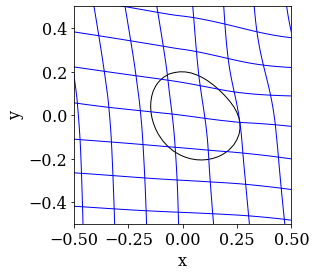

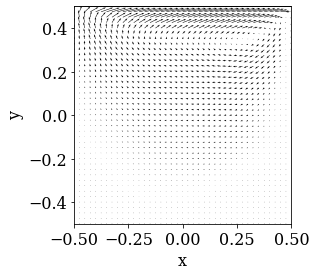

Level Set Advection Time:  0.004404783248901367
------------ Time = 0.9010000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.326106246171242e-13
Total poisson time : 0.0003223419189453125
Total INS time : 0.0035848617553710938
Max, Min, U   : 2.0, -0.1868945497425171
Max, Min, V   : 0.34312747201329213, -0.4642305120215601
Max, Min, P   : -0.8056895572730233, -2.782046624866218
Max, Min, DIV : 2.886579864025407e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004435062408447266
------------ Time = 0.9020000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4795298628938735e-13
Total poisson time : 0.00024175643920898438
Total INS time : 0.0035338401794433594
Max, Min, U   : 2.0, -0.1868933449059218
Max, Min, V   : 0.3431336886799425, -0.46431128986820824
Max, Min, P   : -0.8016863754147024, -2.778102143906887
Max, Min, DIV : 4.246603069191224e-15, -3.3306690738754696e

Level Set Advection Time:  0.004374980926513672
------------ Time = 0.9250000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.360490144332863e-14
Total poisson time : 0.0002453327178955078
Total INS time : 0.004502058029174805
Max, Min, U   : 2.0, -0.18679941001837683
Max, Min, V   : 0.3432718539647149, -0.46611576298267915
Max, Min, P   : -0.9082414675906161, -2.886009907540085
Max, Min, DIV : 3.6637359812630166e-15, -3.3861802251067274e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004355907440185547
------------ Time = 0.9260000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.013557989938084e-13
Total poisson time : 0.00023436546325683594
Total INS time : 0.004277706146240234
Max, Min, U   : 2.0, -0.18679253801408086
Max, Min, V   : 0.3432776584628539, -0.4661919544102585
Max, Min, P   : -0.9161864983129262, -2.8940131242423957
Max, Min, DIV : 4.371503159461554e-15, -4.440892098500626e



Level Set Advection Time:  0.004352092742919922
------------ Time = 0.9490000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.703792905978113e-15
Total poisson time : 0.00024008750915527344
Total INS time : 0.0042002201080322266
Max, Min, U   : 2.0, -0.18657420771493352
Max, Min, V   : 0.3434067381121848, -0.46789458521706595
Max, Min, P   : -0.9830453692244476, -2.962199154329694
Max, Min, DIV : 4.163336342344337e-15, -3.913536161803677e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004347801208496094
------------ Time = 0.9500000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.9799516974950924e-13
Total poisson time : 0.0002465248107910156
Total INS time : 0.0034978389739990234
Max, Min, U   : 2.0, -0.18656218165625843
Max, Min, V   : 0.34341216367958716, -0.4679665007798868
Max, Min, P   : -0.9931501928716542, -2.9723613131115956
Max, Min, DIV : 4.440892098500626e-15, -3.996802888650

Level Set Advection Time:  0.004362344741821289
------------ Time = 0.9710000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.806668999466595e-13
Total poisson time : 0.0006487369537353516
Total INS time : 0.004019498825073242
Max, Min, U   : 2.0, -0.18626792646436294
Max, Min, V   : 0.3435227576315158, -0.4694379623782283
Max, Min, P   : -0.9523742366410813, -2.932744473744209
Max, Min, DIV : 4.218847493575595e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004378080368041992
------------ Time = 0.9720000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.453143861781992e-13
Total poisson time : 0.00023221969604492188
Total INS time : 0.003469228744506836
Max, Min, U   : 2.0, -0.1862520353981043
Max, Min, V   : 0.34352786907403887, -0.46950622810579834
Max, Min, P   : -0.977457429842157, -2.9578843170408398
Max, Min, DIV : 3.4416913763379853e-15, -3.462508058049707e-

Max, Min, U   : 2.0, -0.18585631834716793
Max, Min, V   : 0.34363696343662126, -0.4709684264808696
Max, Min, P   : -1.1464557969349602, -3.128096749640606
Max, Min, DIV : 4.440892098500626e-15, -3.70536934468646e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004369497299194336
------------ Time = 0.9950000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.030688531259208e-13
Total poisson time : 0.00023102760314941406
Total INS time : 0.003946542739868164
Max, Min, U   : 2.0, -0.18583630585351973
Max, Min, V   : 0.34364177313300287, -0.4710331291280163
Max, Min, P   : -1.1625806951603304, -3.144277454927202
Max, Min, DIV : 3.941291737419306e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004357337951660156
------------ Time = 0.9960000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1313851792856385e-13
Total poisson time : 0.0002465248107910156
Total INS

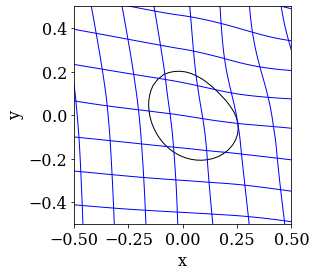

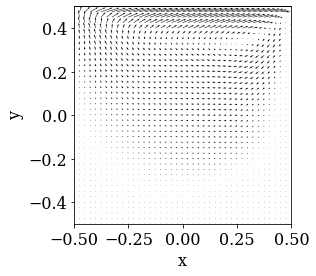

Level Set Advection Time:  0.004443645477294922
------------ Time = 1.0010000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.376505858280502e-13
Total poisson time : 0.00031065940856933594
Total INS time : 0.003564119338989258
Max, Min, U   : 2.0, -0.18571354355356062
Max, Min, V   : 0.34367035352107733, -0.47141817678321685
Max, Min, P   : -1.214570924185273, -3.1965871011132134
Max, Min, DIV : 3.9968028886505635e-15, -3.3861802251067274e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004439592361450195
------------ Time = 1.0020000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.894688848091707e-13
Total poisson time : 0.0002586841583251953
Total INS time : 0.004167079925537109
Max, Min, U   : 2.0, -0.18569256721208788
Max, Min, V   : 0.3436750706092063, -0.47148182597846217
Max, Min, P   : -1.1949563717165121, -3.177028071284223
Max, Min, DIV : 4.2049697057677804e-15, -3.77475828372553

Level Set Advection Time:  0.004822969436645508
------------ Time = 1.023999999999998 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.495512629787393e-13
Total poisson time : 0.0002338886260986328
Total INS time : 0.003381490707397461
Max, Min, U   : 2.0, -0.18523525845040886
Max, Min, V   : 0.34377587692660105, -0.4728458661679377
Max, Min, P   : -1.2517582435526127, -3.235027034187278
Max, Min, DIV : 3.3306690738754696e-15, -3.219646771412954e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004767417907714844
------------ Time = 1.024999999999998 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.502272088873267e-13
Total poisson time : 0.00025010108947753906
Total INS time : 0.003804922103881836
Max, Min, U   : 2.0, -0.18523747752582614
Max, Min, V   : 0.34378032898668015, -0.47290626482309805
Max, Min, P   : -1.227161060172614, -3.210484614236603
Max, Min, DIV : 4.178948853628128e-15, -3.95516952522712e-15


Level Set Advection Time:  0.004880666732788086
------------ Time = 1.0469999999999955 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.630766573109732e-13
Total poisson time : 0.00023126602172851562
Total INS time : 0.003471851348876953
Max, Min, U   : 2.0, -0.18524075005738377
Max, Min, V   : 0.34387539084907826, -0.4742007976631951
Max, Min, P   : -1.2407027619265467, -3.2252054053169528
Max, Min, DIV : 4.246603069191224e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004361867904663086
------------ Time = 1.0479999999999954 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.420027792864602e-15
Total poisson time : 0.00025010108947753906
Total INS time : 0.0033948421478271484
Max, Min, U   : 2.0, -0.18523874726141346
Max, Min, V   : 0.3438795893464154, -0.4742581314701572
Max, Min, P   : -1.2406139213149483, -3.2251705124188748
Max, Min, DIV : 3.885780586188048e-15, -3.663735981263016



Level Set Advection Time:  0.004383563995361328
------------ Time = 1.0709999999999928 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.534677678452896e-14
Total poisson time : 0.00023937225341796875
Total INS time : 0.00420379638671875
Max, Min, U   : 2.0, -0.18514435989983377
Max, Min, V   : 0.34397325337011486, -0.4755418740488004
Max, Min, P   : -1.3046024355209531, -3.2903825855059496
Max, Min, DIV : 3.9968028886505635e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004691362380981445
------------ Time = 1.0719999999999927 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.991118966354568e-14
Total poisson time : 0.00024819374084472656
Total INS time : 0.003405332565307617
Max, Min, U   : 2.0, -0.1851382520782841
Max, Min, V   : 0.34397720370497287, -0.47559620542529385
Max, Min, P   : -1.3053414042965925, -3.291168630504617
Max, Min, DIV : 3.885780586188048e-15, -4.44089209850062



Level Set Advection Time:  0.004359006881713867
------------ Time = 1.0939999999999903 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.5269041095703956e-13
Total poisson time : 0.00023126602172851562
Total INS time : 0.004141569137573242
Max, Min, U   : 2.0, -0.1849628652409396
Max, Min, V   : 0.3440618015961209, -0.47676191857001077
Max, Min, P   : -1.35470371367886, -3.341648233056159
Max, Min, DIV : 3.497202527569243e-15, -4.052314039881821e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004376888275146484
------------ Time = 1.0949999999999902 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.489182398364724e-13
Total poisson time : 0.0002484321594238281
Total INS time : 0.003474712371826172
Max, Min, U   : 2.0, -0.18495305238489035
Max, Min, V   : 0.34406553950314317, -0.47681357746399067
Max, Min, P   : -1.3505118085542425, -3.3375078472981263
Max, Min, DIV : 3.552713678800501e-15, -3.3306690738754696

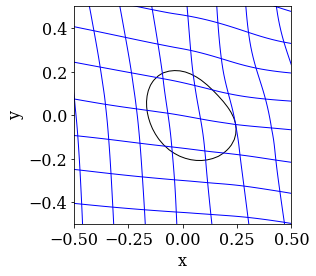

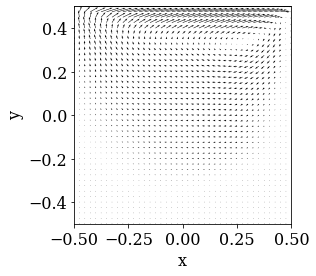

Level Set Advection Time:  0.00442194938659668
------------ Time = 1.1009999999999895 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.076604274419775e-13
Total poisson time : 0.0003142356872558594
Total INS time : 0.0035479068756103516
Max, Min, U   : 2.0, -0.18489095694373472
Max, Min, V   : 0.34408777527920176, -0.477121163384055
Max, Min, P   : -1.3586636954016886, -3.345967867279158
Max, Min, DIV : 3.9968028886505635e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004411935806274414
------------ Time = 1.1019999999999894 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.628427280743636e-13
Total poisson time : 0.00025177001953125
Total INS time : 0.0037841796875
Max, Min, U   : 2.0, -0.18488007675469417
Max, Min, V   : 0.34409144957984833, -0.4771720359263148
Max, Min, P   : -1.3349446221249957, -3.3222999851159765
Max, Min, DIV : 3.9968028886505635e-15, -4.052314039881821e-15
Qin

Level Set Advection Time:  0.004904508590698242
------------ Time = 1.123999999999987 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.966487650621242e-13
Total poisson time : 0.00023508071899414062
Total INS time : 0.0034732818603515625
Max, Min, U   : 2.0, -0.1846037040962913
Max, Min, V   : 0.3441700689469402, -0.47826363472926026
Max, Min, P   : -1.3527418515517275, -3.341216113344002
Max, Min, DIV : 3.774758283725532e-15, -3.4555691641457997e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004385471343994141
------------ Time = 1.124999999999987 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.683669926767963e-13
Total poisson time : 0.0002422332763671875
Total INS time : 0.003849029541015625
Max, Min, U   : 2.0, -0.18458950993921192
Max, Min, V   : 0.3441735444110547, -0.47831202473964135
Max, Min, P   : -1.375782619434876, -3.3643072738188535
Max, Min, DIV : 3.70536934468646e-15, -3.9968028886505635e-15

Level Set Advection Time:  0.00439453125
------------ Time = 1.1479999999999844 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.056775605323249e-12
Total poisson time : 0.0002465248107910156
Total INS time : 0.004505634307861328
Max, Min, U   : 2.0, -0.1842661644237001
Max, Min, V   : 0.34425120905806267, -0.47939658329895074
Max, Min, P   : -1.5874441106708723, -3.5770900130562047
Max, Min, DIV : 3.677613769070831e-15, -3.969047313034935e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00439906120300293
------------ Time = 1.1489999999999843 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.696853243128822e-13
Total poisson time : 0.000232696533203125
Total INS time : 0.0034589767456054688
Max, Min, U   : 2.0, -0.18425787374546373
Max, Min, V   : 0.3442544911870803, -0.47944253386530855
Max, Min, P   : -1.6054598391852257, -3.5951548836672864
Max, Min, DIV : 3.802513859341161e-15, -4.135580766728708e-15
Qin, 

Max, Min, V   : 0.34432479942788935, -0.4804290695984752
Max, Min, P   : -1.7214625565633137, -3.712189989799188
Max, Min, DIV : 3.608224830031759e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004415750503540039
------------ Time = 1.1719999999999817 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.038479425512608e-13
Total poisson time : 0.00023937225341796875
Total INS time : 0.004080772399902344
Max, Min, U   : 2.0, -0.1840368791514983
Max, Min, V   : 0.34432791347627817, -0.4804728338691348
Max, Min, P   : -1.6972553531706402, -3.6880306551905564
Max, Min, DIV : 4.218847493575595e-15, -3.622102617839573e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0044057369232177734
------------ Time = 1.1729999999999816 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2771379335915846e-13
Total poisson time : 0.00023484230041503906
Total INS time : 0.004148006439208984
Max, Min,

Total INS time : 0.003396749496459961
Max, Min, U   : 2.0, -0.18377478902604716
Max, Min, V   : 0.34439464064234004, -0.48141269412737536
Max, Min, P   : -1.896291671195853, -3.8881003482766685
Max, Min, DIV : 3.948230631323213e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043735504150390625
------------ Time = 1.1949999999999792 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.601360240386254e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.004113197326660156
Max, Min, U   : 2.0, -0.1837617498603533
Max, Min, V   : 0.3443975969215589, -0.48145439907281173
Max, Min, P   : -1.9082231944091288, -3.9000786981252875
Max, Min, DIV : 3.885780586188048e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004393577575683594
------------ Time = 1.195999999999979 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6461468214139606e-13
Total poisson

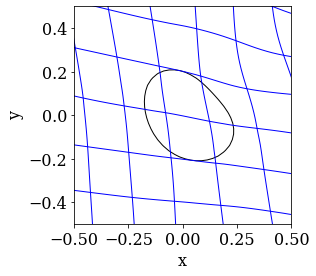

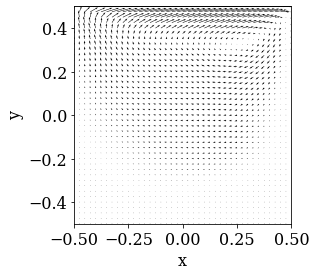

Level Set Advection Time:  0.004464626312255859
------------ Time = 1.2009999999999785 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.88501116736949e-13
Total poisson time : 0.00030612945556640625
Total INS time : 0.0035452842712402344
Max, Min, U   : 2.0, -0.1836813942177389
Max, Min, V   : 0.3444151915123062, -0.48170280353709294
Max, Min, P   : -1.9036625482487606, -3.8957980175073463
Max, Min, DIV : 3.9968028886505635e-15, -3.219646771412954e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004436016082763672
------------ Time = 1.2019999999999784 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0447264316473665e-13
Total poisson time : 0.00024819374084472656
Total INS time : 0.003541707992553711
Max, Min, U   : 2.0, -0.18366765222071366
Max, Min, V   : 0.3444181003103727, -0.4817439020971854
Max, Min, P   : -1.8934012219394676, -3.8855831862280508
Max, Min, DIV : 3.219646771412954e-15, -3.83026943495679e

Level Set Advection Time:  0.0047760009765625
------------ Time = 1.223999999999976 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.545525436381359e-13
Total poisson time : 0.00023174285888671875
Total INS time : 0.003892183303833008
Max, Min, U   : 2.0, -0.18334564780910007
Max, Min, V   : 0.3444806710867324, -0.48262742368056083
Max, Min, P   : -2.003748624219867, -3.996939609093581
Max, Min, DIV : 3.5041414214731503e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043299198150634766
------------ Time = 1.2249999999999759 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.118823636724356e-13
Total poisson time : 0.00023365020751953125
Total INS time : 0.0037794113159179688
Max, Min, U   : 2.0, -0.183330079836469
Max, Min, V   : 0.34448344737743014, -0.48266665725345587
Max, Min, P   : -2.01206365005327, -4.005300928060092
Max, Min, DIV : 3.6637359812630166e-15, -3.885780586188048e-15


Level Set Advection Time:  0.00434565544128418
------------ Time = 1.2479999999999734 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.192365566520886e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.004187107086181641
Max, Min, U   : 2.0, -0.1829525979041444
Max, Min, V   : 0.3445458323922734, -0.4835479549557518
Max, Min, P   : -2.093985387065332, -4.088210569188947
Max, Min, DIV : 3.497202527569243e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004343748092651367
------------ Time = 1.2489999999999732 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2671011964103356e-12
Total poisson time : 0.0002295970916748047
Total INS time : 0.003642559051513672
Max, Min, U   : 2.0, -0.18293534822303306
Max, Min, V   : 0.344548473061286, -0.48358535183972995
Max, Min, P   : -2.127713825554104, -4.121983940418416
Max, Min, DIV : 3.83026943495679e-15, -3.7192471324942744e-15
Qin,

Level Set Advection Time:  0.004342317581176758
------------ Time = 1.2719999999999707 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.987357419536407e-14
Total poisson time : 0.00023102760314941406
Total INS time : 0.0040130615234375
Max, Min, U   : 2.0, -0.1825168710425946
Max, Min, V   : 0.3446076535945684, -0.4844250824436077
Max, Min, P   : -2.2556906517702364, -4.250980773369881
Max, Min, DIV : 3.9968028886505635e-15, -3.83026943495679e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004346609115600586
------------ Time = 1.2729999999999706 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2689342071220068e-12
Total poisson time : 0.0002620220184326172
Total INS time : 0.0033724308013916016
Max, Min, U   : 2.0, -0.1824977736258119
Max, Min, V   : 0.3446101600490331, -0.4844607216376606
Max, Min, P   : -2.2897033786275998, -4.285037665920573
Max, Min, DIV : 4.107825191113079e-15, -3.497202527569243e-15
Qi

Level Set Advection Time:  0.0043392181396484375
------------ Time = 1.295999999999968 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.316188094677607e-13
Total poisson time : 0.0002307891845703125
Total INS time : 0.0038971900939941406
Max, Min, U   : 2.0, -0.18203859589758986
Max, Min, V   : 0.34466647799531946, -0.4852615132249184
Max, Min, P   : -2.3562322074526616, -4.352533830648051
Max, Min, DIV : 4.107825191113079e-15, -3.4416913763379853e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004353761672973633
------------ Time = 1.296999999999968 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2233471873913267e-13
Total poisson time : 0.00023412704467773438
Total INS time : 0.003881216049194336
Max, Min, U   : 2.0, -0.18201776999551866
Max, Min, V   : 0.34466887070097246, -0.4852955297321173
Max, Min, P   : -2.3621929273394047, -4.358537343835195
Max, Min, DIV : 3.524958103184872e-15, -3.552713678800501e

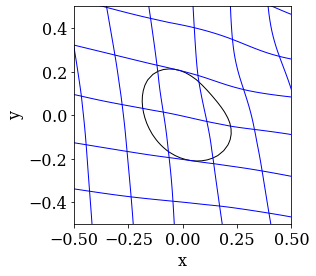

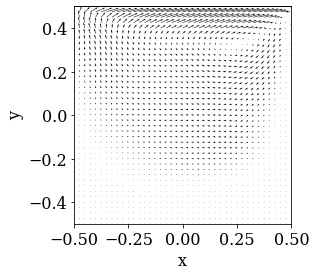

Level Set Advection Time:  0.0044209957122802734
------------ Time = 1.3009999999999675 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.437259748201063e-14
Total poisson time : 0.00030994415283203125
Total INS time : 0.0035448074340820312
Max, Min, U   : 2.0, -0.18193433118791316
Max, Min, V   : 0.34467838905074083, -0.48543092551943434
Max, Min, P   : -2.432626454592358, -4.429127150096333
Max, Min, DIV : 4.3298697960381105e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004381418228149414
------------ Time = 1.3019999999999674 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2815125891750708e-12
Total poisson time : 0.00024008750915527344
Total INS time : 0.003663778305053711
Max, Min, U   : 2.0, -0.1819133884708863
Max, Min, V   : 0.3446807556443045, -0.4854646077027157
Max, Min, P   : -2.466888642598027, -4.4634318582788755
Max, Min, DIV : 3.774758283725532e-15, -3.802513859341161

Level Set Advection Time:  0.004326820373535156
------------ Time = 1.3249999999999649 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.496949346446686e-14
Total poisson time : 0.00023221969604492188
Total INS time : 0.0045986175537109375
Max, Min, U   : 2.0, -0.18141455504390394
Max, Min, V   : 0.34473383695322324, -0.4862214052379986
Max, Min, P   : -2.541464824063703, -4.538977326791393
Max, Min, DIV : 3.469446951953614e-15, -3.7192471324942744e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043182373046875
------------ Time = 1.3259999999999648 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6095786372727925e-14
Total poisson time : 0.00023055076599121094
Total INS time : 0.0037500858306884766
Max, Min, U   : 2.0, -0.18139214861317457
Max, Min, V   : 0.3447360879632448, -0.4862535475800384
Max, Min, P   : -2.540748276564312, -4.538302620814306
Max, Min, DIV : 3.1086244689504383e-15, -3.552713678800501e-

Level Set Advection Time:  0.0043468475341796875
------------ Time = 1.3489999999999622 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.76949640073944e-13
Total poisson time : 0.00023031234741210938
Total INS time : 0.0039403438568115234
Max, Min, U   : 2.0, -0.18086321216773774
Max, Min, V   : 0.34478663939197535, -0.48697601085711556
Max, Min, P   : -2.6516923417057625, -4.650162799039702
Max, Min, DIV : 3.774758283725532e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004336357116699219
------------ Time = 1.3499999999999621 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.543313756248873e-13
Total poisson time : 0.00023102760314941406
Total INS time : 0.004011631011962891
Max, Min, U   : 2.0, -0.18083977675822555
Max, Min, V   : 0.34478878651362704, -0.48700670924875217
Max, Min, P   : -2.661590647784108, -4.66010169460373
Max, Min, DIV : 3.70536934468646e-15, -4.135580766728708e

Level Set Advection Time:  0.004896402359008789
------------ Time = 1.3719999999999597 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.15971959220598e-13
Total poisson time : 0.00023317337036132812
Total INS time : 0.0035109519958496094
Max, Min, U   : 2.0, -0.18031190092647364
Max, Min, V   : 0.34483493250248975, -0.4876674174537736
Max, Min, P   : -2.6874629003102646, -4.686861920359273
Max, Min, DIV : 4.440892098500626e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043239593505859375
------------ Time = 1.3729999999999596 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2015610361499065e-13
Total poisson time : 0.0002295970916748047
Total INS time : 0.003525972366333008
Max, Min, U   : 2.0, -0.1802873708740274
Max, Min, V   : 0.3448369818022461, -0.48769679624866646
Max, Min, P   : -2.6906019560840284, -4.6900405579133295
Max, Min, DIV : 3.885780586188048e-15, -4.440892098500626e

Level Set Advection Time:  0.004812002182006836
------------ Time = 1.3949999999999572 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6590503793549637e-13
Total poisson time : 0.00023865699768066406
Total INS time : 0.003487825393676758
Max, Min, U   : 2.0, -0.1797367668258468
Max, Min, V   : 0.34488103423236455, -0.4883291960929357
Max, Min, P   : -2.759734773475091, -4.76002948141247
Max, Min, DIV : 3.9968028886505635e-15, -3.6914915568786455e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004328727722167969
------------ Time = 1.395999999999957 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.617622822649795e-13
Total poisson time : 0.00023794174194335938
Total INS time : 0.0038673877716064453
Max, Min, U   : 2.0, -0.17971136803745305
Max, Min, V   : 0.3448829951268447, -0.4883573305216471
Max, Min, P   : -2.767210897745545, -4.767531588698039
Max, Min, DIV : 3.9968028886505635e-15, -4.218847493575595e-1

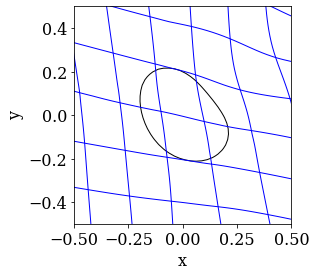

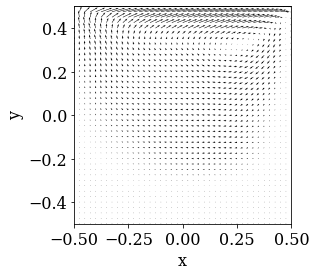

Level Set Advection Time:  0.004475831985473633
------------ Time = 1.4009999999999565 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0465054905037947e-13
Total poisson time : 0.0003113746643066406
Total INS time : 0.003559112548828125
Max, Min, U   : 2.0, -0.1795837130879522
Max, Min, V   : 0.3448927491524333, -0.48849723523430977
Max, Min, P   : -2.8439435502164234, -4.844459748952011
Max, Min, DIV : 3.6637359812630166e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004368305206298828
------------ Time = 1.4019999999999564 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0438340306294713e-13
Total poisson time : 0.00024390220642089844
Total INS time : 0.0041277408599853516
Max, Min, U   : 2.0, -0.17955806484203524
Max, Min, V   : 0.3448946877678883, -0.4885250577755708
Max, Min, P   : -2.8411543626453066, -4.84170740190218
Max, Min, DIV : 4.3021142204224816e-15, -3.497202527569243e

Level Set Advection Time:  0.005041360855102539
------------ Time = 1.423999999999954 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.62330133419863e-13
Total poisson time : 0.00022840499877929688
Total INS time : 0.0034248828887939453
Max, Min, U   : 2.0, -0.17924073427228743
Max, Min, V   : 0.34493643787909517, -0.4891243319582898
Max, Min, P   : -2.920664158584108, -4.922009716962148
Max, Min, DIV : 3.3306690738754696e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004309177398681641
------------ Time = 1.4249999999999539 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.5080386442623827e-13
Total poisson time : 0.00023055076599121094
Total INS time : 0.003487110137939453
Max, Min, U   : 2.0, -0.17922748395499208
Max, Min, V   : 0.3449382941228566, -0.4891509967059553
Max, Min, P   : -2.9303554793155193, -4.931738194157734
Max, Min, DIV : 3.219646771412954e-15, -4.107825191113079e-1

Level Set Advection Time:  0.004327297210693359
------------ Time = 1.4479999999999513 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.429680439098916e-13
Total poisson time : 0.00022912025451660156
Total INS time : 0.004378795623779297
Max, Min, U   : 2.0, -0.17890777350413778
Max, Min, V   : 0.34497998824726533, -0.48975081208855165
Max, Min, P   : -3.103509650753458, -5.105729959752656
Max, Min, DIV : 4.107825191113079e-15, -4.052314039881821e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00462794303894043
------------ Time = 1.4489999999999512 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2579519085207713e-14
Total poisson time : 0.00022864341735839844
Total INS time : 0.003405332565307617
Max, Min, U   : 2.0, -0.1788932635763293
Max, Min, V   : 0.3449817581639403, -0.4897763142501673
Max, Min, P   : -3.1038087848051625, -5.106065157599607
Max, Min, DIV : 3.885780586188048e-15, -4.440892098500626e-15

Level Set Advection Time:  0.0044896602630615234
------------ Time = 1.4719999999999487 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3902937296580625e-13
Total poisson time : 0.0002295970916748047
Total INS time : 0.003982067108154297
Max, Min, U   : 2.0, -0.17855094126646723
Max, Min, V   : 0.3450219147621699, -0.4903512775486337
Max, Min, P   : -3.1213636817234014, -5.124365019727891
Max, Min, DIV : 4.107825191113079e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004442930221557617
------------ Time = 1.4729999999999486 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6768283546791818e-13
Total poisson time : 0.00024199485778808594
Total INS time : 0.0044939517974853516
Max, Min, U   : 2.0, -0.1785353773726007
Max, Min, V   : 0.3450236292210533, -0.4903757631224706
Max, Min, P   : -3.116444368990761, -5.119480700037294
Max, Min, DIV : 3.9968028886505635e-15, -3.885780586188048e

Level Set Advection Time:  0.00435948371887207
------------ Time = 1.495999999999946 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7737920560428415e-13
Total poisson time : 0.00023174285888671875
Total INS time : 0.00438690185546875
Max, Min, U   : 2.0, -0.1781671018702133
Max, Min, V   : 0.3450621343177583, -0.49092697235618976
Max, Min, P   : -3.3283337574129317, -5.332152536823679
Max, Min, DIV : 3.552713678800501e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00464630126953125
------------ Time = 1.496999999999946 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.020397780172076e-13
Total poisson time : 0.00023055076599121094
Total INS time : 0.004060506820678711
Max, Min, U   : 2.0, -0.17815071305896713
Max, Min, V   : 0.3450637693590068, -0.49095042596748983
Max, Min, P   : -3.3149913649316542, -5.318844525000061
Max, Min, DIV : 3.6637359812630166e-15, -3.3861802251067274e-15


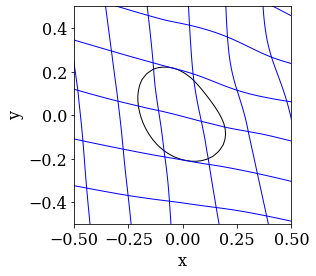

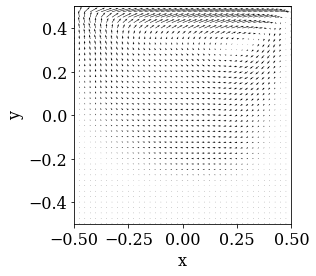

Level Set Advection Time:  0.0045049190521240234
------------ Time = 1.5009999999999455 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4738468283970046e-13
Total poisson time : 0.00030303001403808594
Total INS time : 0.003525972366333008
Max, Min, U   : 2.0, -0.17808472135566397
Max, Min, V   : 0.3450702780313593, -0.49104382170556543
Max, Min, P   : -3.363945044028486, -5.367935291130172
Max, Min, DIV : 4.163336342344337e-15, -3.941291737419306e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004372358322143555
------------ Time = 1.5019999999999454 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.86377506019371e-13
Total poisson time : 0.00024700164794921875
Total INS time : 0.00433802604675293
Max, Min, U   : 2.0, -0.17806811547074203
Max, Min, V   : 0.34507189737069316, -0.4910670663646575
Max, Min, P   : -3.3444749413970936, -5.348499345979413
Max, Min, DIV : 4.107825191113079e-15, -4.274358644806853e-1

Level Set Advection Time:  0.004362344741821289
------------ Time = 1.5249999999999428 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.850614047325846e-13
Total poisson time : 0.00022935867309570312
Total INS time : 0.0044040679931640625
Max, Min, U   : 2.0, -0.1776845044065404
Max, Min, V   : 0.3451085306092638, -0.4915910629259003
Max, Min, P   : -3.5534285588717927, -5.558179732018868
Max, Min, DIV : 3.774758283725532e-15, -3.497202527569243e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004456520080566406
------------ Time = 1.5259999999999427 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.586705702330366e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.0033540725708007812
Max, Min, U   : 2.0, -0.1776676879901532
Max, Min, V   : 0.34511009206199134, -0.49161338103414925
Max, Min, P   : -3.546431533441285, -5.551214377500004
Max, Min, DIV : 3.7192471324942744e-15, -3.885780586188048e-1

Level Set Advection Time:  0.0043561458587646484
------------ Time = 1.5489999999999402 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1695582276731819e-13
Total poisson time : 0.00026535987854003906
Total INS time : 0.004527091979980469
Max, Min, U   : 2.0, -0.17727109803049618
Max, Min, V   : 0.3451451884159887, -0.4921160414404344
Max, Min, P   : -3.6418191445138692, -5.647374260933296
Max, Min, DIV : 4.052314039881821e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004324674606323242
------------ Time = 1.54999999999994 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.349687382135284e-13
Total poisson time : 0.0002694129943847656
Total INS time : 0.0041391849517822266
Max, Min, U   : 2.0, -0.17725344857077052
Max, Min, V   : 0.3451466787908389, -0.49213743723879544
Max, Min, P   : -3.6666691361021724, -5.672256823780827
Max, Min, DIV : 3.95516952522712e-15, -3.497202527569243e-15

Max, Min, U   : 2.0, -0.17697276480658622
Max, Min, V   : 0.34517885629463463, -0.49259902226272756
Max, Min, P   : -3.767164339483314, -5.773428206246483
Max, Min, DIV : 3.9968028886505635e-15, -3.635980405647388e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043256282806396484
------------ Time = 1.5729999999999376 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7063880805260266e-13
Total poisson time : 0.0002300739288330078
Total INS time : 0.003851175308227539
Max, Min, U   : 2.0, -0.1769620074216319
Max, Min, V   : 0.3451802956643899, -0.4926196073813252
Max, Min, P   : -3.7719742133528373, -5.778270132577595
Max, Min, DIV : 3.885780586188048e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004435062408447266
------------ Time = 1.5739999999999374 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.399267676951294e-14
Total poisson time : 0.00022912025451660156
Total IN

Level Set Advection Time:  0.004354953765869141
------------ Time = 1.595999999999935 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1405512994813565e-12
Total poisson time : 0.00023055076599121094
Total INS time : 0.004517078399658203
Max, Min, U   : 2.0, -0.17670769755784735
Max, Min, V   : 0.3452127003353665, -0.4930835349076444
Max, Min, P   : -3.8509017782617936, -5.8578849592400335
Max, Min, DIV : 4.163336342344337e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0045926570892333984
------------ Time = 1.596999999999935 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.508764830718822e-13
Total poisson time : 0.0002346038818359375
Total INS time : 0.004016399383544922
Max, Min, U   : 2.0, -0.17669635427201086
Max, Min, V   : 0.34521407890548084, -0.4931032974471232
Max, Min, P   : -3.857666109571769, -5.864680058387734
Max, Min, DIV : 3.7192471324942744e-15, -4.007211229506424e-

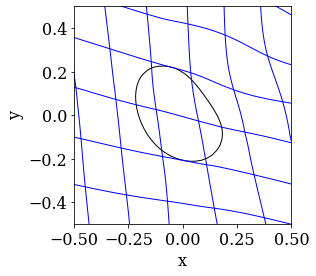

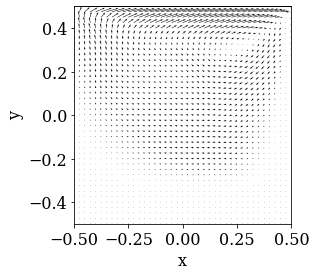

Level Set Advection Time:  0.004492998123168945
------------ Time = 1.6009999999999345 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2673938812015176e-13
Total poisson time : 0.00030994415283203125
Total INS time : 0.003529787063598633
Max, Min, U   : 2.0, -0.1766507115268496
Max, Min, V   : 0.3452195660753777, -0.49318200633507003
Max, Min, P   : -3.888343022089726, -5.895479633037625
Max, Min, DIV : 3.9968028886505635e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00435638427734375
------------ Time = 1.6019999999999344 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.537390326276398e-13
Total poisson time : 0.000240325927734375
Total INS time : 0.00447392463684082
Max, Min, U   : 2.0, -0.1766392342164205
Max, Min, V   : 0.3452209311447218, -0.4932015985385014
Max, Min, P   : -3.894972001841946, -5.902139167897903
Max, Min, DIV : 3.83026943495679e-15, -3.774758283725532e-15
Qin, 

Level Set Advection Time:  0.0043621063232421875
------------ Time = 1.6249999999999318 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.691256948504836e-14
Total poisson time : 0.00023174285888671875
Total INS time : 0.004477739334106445
Max, Min, U   : 2.0, -0.17637322196179603
Max, Min, V   : 0.34525160437066676, -0.493642955746305
Max, Min, P   : -4.013457966889212, -6.021286164585504
Max, Min, DIV : 3.594347042223944e-15, -3.427813588530171e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043599605560302734
------------ Time = 1.6259999999999317 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3570777869492316e-14
Total poisson time : 0.0002300739288330078
Total INS time : 0.003477334976196289
Max, Min, U   : 2.0, -0.17636134354680297
Max, Min, V   : 0.3452529143853627, -0.4936617669851433
Max, Min, P   : -4.013079488835591, -6.020933452920543
Max, Min, DIV : 4.128641872824801e-15, -3.3306690738754696e-1

Level Set Advection Time:  0.00492095947265625
------------ Time = 1.6479999999999293 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1700577826541041e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.0034265518188476562
Max, Min, U   : 2.0, -0.17609565002254643
Max, Min, V   : 0.3452813586464565, -0.49406832367676184
Max, Min, P   : -4.053039209309306, -6.061458910012063
Max, Min, DIV : 4.085273785925381e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0045049190521240234
------------ Time = 1.6489999999999292 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.86463779472682e-13
Total poisson time : 0.0002384185791015625
Total INS time : 0.0038352012634277344
Max, Min, U   : 2.0, -0.17608340232404454
Max, Min, V   : 0.3452826347787326, -0.4940864816039073
Max, Min, P   : -4.071759463893717, -6.080207144697279
Max, Min, DIV : 4.399258735077183e-15, -3.877106968808164e-15


Level Set Advection Time:  0.004834651947021484
------------ Time = 1.6709999999999268 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.5059066351585194e-14
Total poisson time : 0.00022864341735839844
Total INS time : 0.0034317970275878906
Max, Min, U   : 2.0, -0.1758085706521366
Max, Min, V   : 0.3453100779302867, -0.49447838812610784
Max, Min, P   : -4.1896168118849095, -6.198666695488875
Max, Min, DIV : 3.774758283725532e-15, -3.7539416020138106e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004320859909057617
------------ Time = 1.6719999999999267 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2430371771329307e-13
Total poisson time : 0.0002300739288330078
Total INS time : 0.0035054683685302734
Max, Min, U   : 2.0, -0.17579584471640985
Max, Min, V   : 0.3453112980653137, -0.49449586316907984
Max, Min, P   : -4.192900909277266, -6.201977775736769
Max, Min, DIV : 3.552713678800501e-15, -3.996802888650563

Total poisson time : 0.0002307891845703125
Total INS time : 0.004075050354003906
Max, Min, U   : 2.0, -0.1755112322906819
Max, Min, V   : 0.34533757733617115, -0.49487304872643595
Max, Min, P   : -4.28167517950611, -6.291348151584313
Max, Min, DIV : 4.0245584642661925e-15, -4.246603069191224e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004340410232543945
------------ Time = 1.6949999999999241 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.247935250223971e-13
Total poisson time : 0.00022983551025390625
Total INS time : 0.004361391067504883
Max, Min, U   : 2.0, -0.17549815200267238
Max, Min, V   : 0.3453387511451404, -0.49488987858944145
Max, Min, P   : -4.295841384087851, -6.305531414868356
Max, Min, DIV : 4.440892098500626e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004336118698120117
------------ Time = 1.695999999999924 ---------------
Number of poisson iterations    : None
Final poisson residu

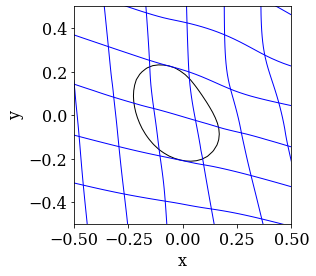

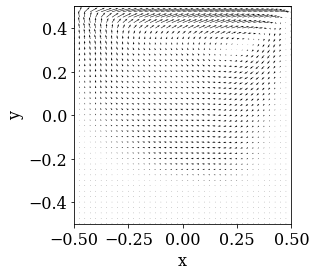

Level Set Advection Time:  0.005397319793701172
------------ Time = 1.7009999999999235 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.023931540529789e-13
Total poisson time : 0.000316619873046875
Total INS time : 0.0035610198974609375
Max, Min, U   : 2.0, -0.17542081814130844
Max, Min, V   : 0.34534575382139776, -0.49499028810036144
Max, Min, P   : -4.29137199815743, -6.301191717965828
Max, Min, DIV : 4.218847493575595e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004353523254394531
------------ Time = 1.7019999999999234 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.689482004890675e-13
Total poisson time : 0.00024175643920898438
Total INS time : 0.0034515857696533203
Max, Min, U   : 2.0, -0.175407939162113
Max, Min, V   : 0.34534691287647434, -0.49500692498900833
Max, Min, P   : -4.310743376017175, -6.320589079790467
Max, Min, DIV : 3.774758283725532e-15, -3.608224830031759e-15


Level Set Advection Time:  0.004369258880615234
------------ Time = 1.723999999999921 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.558198491443162e-13
Total poisson time : 0.0002319812774658203
Total INS time : 0.003601551055908203
Max, Min, U   : 2.0, -0.17512071926185052
Max, Min, V   : 0.34537186722294805, -0.4953660210674428
Max, Min, P   : -4.424420839063123, -6.43482983910859
Max, Min, DIV : 3.6637359812630166e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004312753677368164
------------ Time = 1.7249999999999208 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.92491541033509e-13
Total poisson time : 0.00023055076599121094
Total INS time : 0.00411677360534668
Max, Min, U   : 2.0, -0.1751074933877649
Max, Min, V   : 0.3453729772840506, -0.4953820330996241
Max, Min, P   : -4.443051845232696, -6.453486710159005
Max, Min, DIV : 3.3653635433950058e-15, -3.885780586188048e-15
Qin,

Max, Min, U   : 2.0, -0.1748127969251571
Max, Min, V   : 0.3453969510388786, -0.4957278327404115
Max, Min, P   : -4.523998739398997, -6.534983845867361
Max, Min, DIV : 2.6229018956769323e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043070316314697266
------------ Time = 1.7479999999999183 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.104336684804203e-13
Total poisson time : 0.00022983551025390625
Total INS time : 0.004021406173706055
Max, Min, U   : 2.0, -0.17479925667980106
Max, Min, V   : 0.3453980187015311, -0.4957432564005382
Max, Min, P   : -4.539804950708942, -6.550815057389838
Max, Min, DIV : 4.440892098500626e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004328250885009766
------------ Time = 1.7489999999999182 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1975520498413487e-13
Total poisson time : 0.00022935867309570312
Total INS

Level Set Advection Time:  0.006819963455200195
------------ Time = 1.768999999999916 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.905720367657653e-13
Total poisson time : 0.0004000663757324219
Total INS time : 0.0046041011810302734
Max, Min, U   : 2.0, -0.17451641344970595
Max, Min, V   : 0.345420212405672, -0.496061975842438
Max, Min, P   : -4.63986831083531, -6.651366067939237
Max, Min, DIV : 4.3298697960381105e-15, -3.4416913763379853e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004475116729736328
------------ Time = 1.7699999999999159 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.204558944300898e-13
Total poisson time : 0.00031304359436035156
Total INS time : 0.0046002864837646484
Max, Min, U   : 2.0, -0.17450294877649528
Max, Min, V   : 0.34542125242623856, -0.49607689845438113
Max, Min, P   : -4.625669315347748, -6.637191635158876
Max, Min, DIV : 4.107825191113079e-15, -3.4139358007223564e-15



Level Set Advection Time:  0.0045778751373291016
------------ Time = 1.7929999999999133 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.598199618980945e-13
Total poisson time : 0.0002307891845703125
Total INS time : 0.004186868667602539
Max, Min, U   : 2.0, -0.1741907909639882
Max, Min, V   : 0.34544472407169613, -0.49641377622492266
Max, Min, P   : -4.707110562688962, -6.719152064370521
Max, Min, DIV : 4.163336342344337e-15, -3.54230533794464e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004399538040161133
------------ Time = 1.7939999999999132 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2100622678025699e-13
Total poisson time : 0.00023627281188964844
Total INS time : 0.003662586212158203
Max, Min, U   : 2.0, -0.1741771010528297
Max, Min, V   : 0.3454457273498148, -0.4964281577353677
Max, Min, P   : -4.703936371003916, -6.715997465582566
Max, Min, DIV : 3.747002708109903e-15, -3.219646771412954e-15

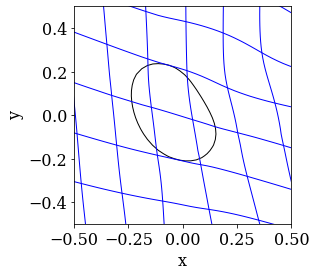

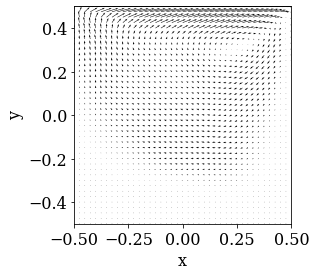

Level Set Advection Time:  0.004485607147216797
------------ Time = 1.8009999999999124 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.646313969298017e-13
Total poisson time : 0.000308990478515625
Total INS time : 0.0036687850952148438
Max, Min, U   : 2.0, -0.17408145871117542
Max, Min, V   : 0.34545273045601604, -0.49652827913198055
Max, Min, P   : -4.778337877603378, -6.790543595366967
Max, Min, DIV : 3.6637359812630166e-15, -3.712308238590367e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0044023990631103516
------------ Time = 1.8019999999999123 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.152572084051923e-13
Total poisson time : 0.00024008750915527344
Total INS time : 0.003582000732421875
Max, Min, U   : 2.0, -0.17406773889640648
Max, Min, V   : 0.3454537343465996, -0.4965425198079072
Max, Min, P   : -4.791549973567145, -6.803760381293323
Max, Min, DIV : 4.274358644806853e-15, -3.9968028886505635e-



Level Set Advection Time:  0.004377841949462891
------------ Time = 1.8249999999999098 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.662519182252441e-13
Total poisson time : 0.00023818016052246094
Total INS time : 0.004217863082885742
Max, Min, U   : 2.0, -0.17375581982781085
Max, Min, V   : 0.3454763556899219, -0.49686420283146404
Max, Min, P   : -4.802212125689392, -6.81492020816613
Max, Min, DIV : 3.3584246494910985e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00474238395690918
------------ Time = 1.8259999999999097 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5650687107538266e-13
Total poisson time : 0.00024437904357910156
Total INS time : 0.004026889801025391
Max, Min, U   : 2.0, -0.17374223685331008
Max, Min, V   : 0.34547731748207583, -0.4968779316091382
Max, Min, P   : -4.795398883650489, -6.808129585313145
Max, Min, DIV : 4.163336342344337e-15, -3.6914915568786455e

Level Set Advection Time:  0.004349470138549805
------------ Time = 1.8479999999999073 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.204169531270794e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.0044803619384765625
Max, Min, U   : 2.0, -0.17344192220274104
Max, Min, V   : 0.34549804804349743, -0.4971746471866953
Max, Min, P   : -4.8761261564179, -6.889359254204188
Max, Min, DIV : 4.218847493575595e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004687070846557617
------------ Time = 1.8489999999999072 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.132550685554629e-14
Total poisson time : 0.00022935867309570312
Total INS time : 0.003941059112548828
Max, Min, U   : 2.0, -0.17342821118333582
Max, Min, V   : 0.3454989716259023, -0.49718789629802396
Max, Min, P   : -4.8738294738466985, -6.887084418023544
Max, Min, DIV : 4.440892098500626e-15, -4.2049697057677804e-15

Level Set Advection Time:  0.004472255706787109
------------ Time = 1.8719999999999046 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2423543955824657e-13
Total poisson time : 0.00022983551025390625
Total INS time : 0.0039713382720947266
Max, Min, U   : 2.0, -0.17311171235469766
Max, Min, V   : 0.34551975609520097, -0.4974869685282256
Max, Min, P   : -4.889021269589021, -6.902765504622531
Max, Min, DIV : 4.107825191113079e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004363059997558594
------------ Time = 1.8729999999999045 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.268676598446865e-13
Total poisson time : 0.00022745132446289062
Total INS time : 0.0038237571716308594
Max, Min, U   : 2.0, -0.17309790848583878
Max, Min, V   : 0.3455206403387723, -0.497499728583184
Max, Min, P   : -4.903815521721485, -6.917580562447713
Max, Min, DIV : 3.6914915568786455e-15, -4.218847493575595e

Level Set Advection Time:  0.004336118698120117
------------ Time = 1.895999999999902 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2019905912507049e-13
Total poisson time : 0.0002300739288330078
Total INS time : 0.004475116729736328
Max, Min, U   : 2.0, -0.17286231377034164
Max, Min, V   : 0.34554066165229036, -0.4977880957521733
Max, Min, P   : -4.9481273635992755, -6.962346851190194
Max, Min, DIV : 3.9968028886505635e-15, -3.913536161803677e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004734039306640625
------------ Time = 1.8969999999999019 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7563754738658232e-14
Total poisson time : 0.00023031234741210938
Total INS time : 0.004019975662231445
Max, Min, U   : 2.0, -0.17285752384672412
Max, Min, V   : 0.34554151653212467, -0.49780040999336284
Max, Min, P   : -4.948591607174145, -6.962831573047103
Max, Min, DIV : 3.552713678800501e-15, -3.83026943495679e-

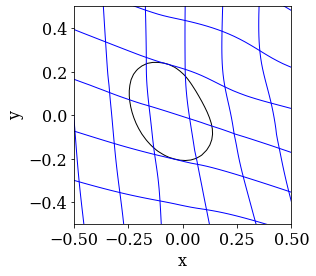

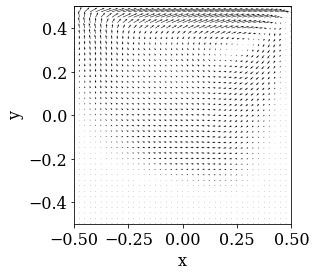

Level Set Advection Time:  0.004503488540649414
------------ Time = 1.9009999999999014 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.071987880017156e-13
Total poisson time : 0.0003097057342529297
Total INS time : 0.003633737564086914
Max, Min, U   : 2.0, -0.17283826209985872
Max, Min, V   : 0.3455449205983342, -0.49784947718988
Max, Min, P   : -4.894704305903754, -6.9090257634778265
Max, Min, DIV : 3.497202527569243e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004403114318847656
------------ Time = 1.9019999999999013 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.043482550712237e-14
Total poisson time : 0.00024080276489257812
Total INS time : 0.004181623458862305
Max, Min, U   : 2.0, -0.1728334215420415
Max, Min, V   : 0.34554576777718365, -0.497861696678692
Max, Min, P   : -4.892216602427094, -6.906558327610473
Max, Min, DIV : 3.6637359812630166e-15, -3.802513859341161e-15
Qin

Level Set Advection Time:  0.00438237190246582
------------ Time = 1.923999999999899 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2948353365643533e-13
Total poisson time : 0.00023889541625976562
Total INS time : 0.003919839859008789
Max, Min, U   : 2.0, -0.17273078832543534
Max, Min, V   : 0.3455642729461025, -0.4981265222549659
Max, Min, P   : -5.033413350186173, -7.048161453673929
Max, Min, DIV : 3.885780586188048e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004365205764770508
------------ Time = 1.9249999999998988 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.657128270580071e-13
Total poisson time : 0.00023221969604492188
Total INS time : 0.003456592559814453
Max, Min, U   : 2.0, -0.17272613844242374
Max, Min, V   : 0.34556510079536423, -0.498138366152225
Max, Min, P   : -5.018427015921939, -7.03319446233833
Max, Min, DIV : 3.774758283725532e-15, -3.3480163086352377e-15
Qi

Level Set Advection Time:  0.004385232925415039
------------ Time = 1.9479999999998963 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.915769425122889e-13
Total poisson time : 0.00023794174194335938
Total INS time : 0.004639148712158203
Max, Min, U   : 2.0, -0.17343873358768236
Max, Min, V   : 0.34558386629406246, -0.49840633789274874
Max, Min, P   : -5.0185684609212515, -7.033719600024567
Max, Min, DIV : 4.052314039881821e-15, -4.0245584642661925e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004374027252197266
------------ Time = 1.9489999999998961 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7895971637498565e-13
Total poisson time : 0.00023031234741210938
Total INS time : 0.003821134567260742
Max, Min, U   : 2.0, -0.17348547468248285
Max, Min, V   : 0.34558466600314897, -0.49841778818926863
Max, Min, P   : -5.023378850414637, -7.038548117769733
Max, Min, DIV : 3.885780586188048e-15, -3.33066907387546

Level Set Advection Time:  0.004364967346191406
------------ Time = 1.9719999999998936 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5785340956635002e-13
Total poisson time : 0.00023055076599121094
Total INS time : 0.0044403076171875
Max, Min, U   : 2.0, -0.17450330277628878
Max, Min, V   : 0.34560295554637144, -0.49867737473201157
Max, Min, P   : -5.241147377689123, -7.256665653855252
Max, Min, DIV : 3.885780586188048e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004334211349487305
------------ Time = 1.9729999999998935 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4801445465110905e-13
Total poisson time : 0.0002288818359375
Total INS time : 0.003442049026489258
Max, Min, U   : 2.0, -0.17454514098003077
Max, Min, V   : 0.3456037389537446, -0.4986884854710792
Max, Min, P   : -5.250761833058518, -7.266297131112043
Max, Min, DIV : 3.816391647148976e-15, -4.3298697960381105e-15
Qi

Level Set Advection Time:  0.004375457763671875
------------ Time = 1.995999999999891 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.156046944069731e-13
Total poisson time : 0.00022983551025390625
Total INS time : 0.004564046859741211
Max, Min, U   : 2.0, -0.1754471995288677
Max, Min, V   : 0.3456213384261404, -0.49893960741967347
Max, Min, P   : -5.2846603803844525, -7.3006041625981375
Max, Min, DIV : 3.608224830031759e-15, -3.219646771412954e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004349708557128906
------------ Time = 1.9969999999998909 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.390502977742112e-12
Total poisson time : 0.0002307891845703125
Total INS time : 0.0038928985595703125
Max, Min, U   : 2.0, -0.17548384865003389
Max, Min, V   : 0.3456220870998644, -0.49895033727602117
Max, Min, P   : -5.322388049868009, -7.338349469640102
Max, Min, DIV : 3.885780586188048e-15, -4.052314039881821e-15

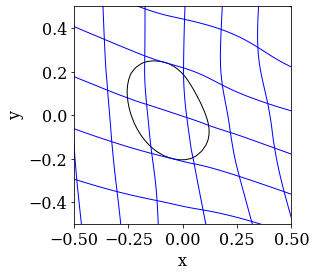

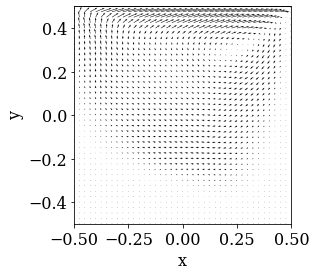

Level Set Advection Time:  0.004427433013916016
------------ Time = 2.0009999999998906 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.700450712706234e-13
Total poisson time : 0.0003082752227783203
Total INS time : 0.003567218780517578
Max, Min, U   : 2.0, -0.17562836066733445
Max, Min, V   : 0.34562506842426627, -0.4989931012749606
Max, Min, P   : -5.327968150642454, -7.343999724651218
Max, Min, DIV : 3.552713678800501e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004438638687133789
------------ Time = 2.0019999999998905 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5845513797915816e-13
Total poisson time : 0.00024318695068359375
Total INS time : 0.003910064697265625
Max, Min, U   : 2.0, -0.17566397037006803
Max, Min, V   : 0.34562581043405993, -0.49900375350702947
Max, Min, P   : -5.335060699321934, -7.351109711467078
Max, Min, DIV : 3.497202527569243e-15, -4.381911500317415e-1

Level Set Advection Time:  0.0048220157623291016
------------ Time = 2.023999999999888 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.5357402410162934e-14
Total poisson time : 0.00023221969604492188
Total INS time : 0.00402379035949707
Max, Min, U   : 2.0, -0.17628107532889262
Max, Min, V   : 0.3456418759985528, -0.4992344334640623
Max, Min, P   : -5.502536171625467, -7.518948047553494
Max, Min, DIV : 4.107825191113079e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043904781341552734
------------ Time = 2.024999999999888 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6295921647438423e-13
Total poisson time : 0.00023889541625976562
Total INS time : 0.004063844680786133
Max, Min, U   : 2.0, -0.17630709781698395
Max, Min, V   : 0.3456425918331677, -0.4992447470502814
Max, Min, P   : -5.506843409974417, -7.52327207875737
Max, Min, DIV : 3.9968028886505635e-15, -3.4416913763379853e-15

Level Set Advection Time:  0.0049114227294921875
------------ Time = 2.0469999999998856 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.5618302388301055e-13
Total poisson time : 0.00023174285888671875
Total INS time : 0.004033327102661133
Max, Min, U   : 2.0, -0.17728371159405476
Max, Min, V   : 0.3456580878005086, -0.4994680848519685
Max, Min, P   : -5.62544951380688, -7.642222249962085
Max, Min, DIV : 4.107825191113079e-15, -4.0245584642661925e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004385232925415039
------------ Time = 2.0479999999998855 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.302071184056956e-13
Total poisson time : 0.0002658367156982422
Total INS time : 0.003420114517211914
Max, Min, U   : 2.0, -0.17733457669964023
Max, Min, V   : 0.34565877851483595, -0.4994780710233079
Max, Min, P   : -5.6087503118629485, -7.625539708026913
Max, Min, DIV : 3.2751579226442118e-15, -4.107825191113079e-

Level Set Advection Time:  0.004973411560058594
------------ Time = 2.069999999999883 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.4870752389719004e-14
Total poisson time : 0.00023293495178222656
Total INS time : 0.003426790237426758
Max, Min, U   : 2.0, -0.17839082613609195
Max, Min, V   : 0.3456736718409162, -0.499694154632932
Max, Min, P   : -5.823930548976671, -7.841067478536962
Max, Min, DIV : 2.9976021664879227e-15, -3.524958103184872e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004374027252197266
------------ Time = 2.070999999999883 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.208360614639782e-13
Total poisson time : 0.00023627281188964844
Total INS time : 0.004243135452270508
Max, Min, U   : 2.0, -0.1784319073820634
Max, Min, V   : 0.3456743400504951, -0.49970382654643153
Max, Min, P   : -5.807127433791683, -7.824280032155864
Max, Min, DIV : 3.9968028886505635e-15, -3.885780586188048e-15
Q

Level Set Advection Time:  0.004914045333862305
------------ Time = 2.0929999999998805 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.91079552878221e-13
Total poisson time : 0.00023031234741210938
Total INS time : 0.004111289978027344
Max, Min, U   : 2.0, -0.17929166690346704
Max, Min, V   : 0.34568874065173555, -0.4999131417731345
Max, Min, P   : -6.007151584117051, -8.02460997885934
Max, Min, DIV : 3.83026943495679e-15, -3.469446951953614e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004388093948364258
------------ Time = 2.0939999999998804 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.81485272576276e-13
Total poisson time : 0.0002372264862060547
Total INS time : 0.003414154052734375
Max, Min, U   : 2.0, -0.1793292202140979
Max, Min, V   : 0.3456893821485411, -0.4999225005751798
Max, Min, P   : -6.025732041847722, -8.04320604406328
Max, Min, DIV : 3.0808688933348094e-15, -4.218847493575595e-15
Qin, Q

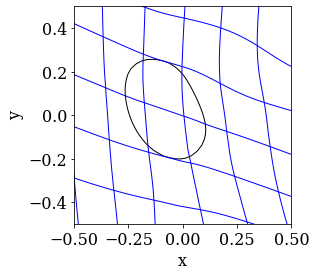

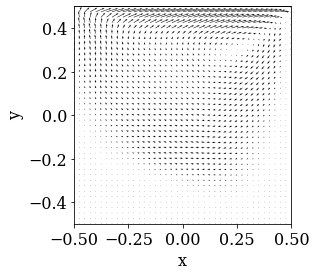

Level Set Advection Time:  0.004450321197509766
------------ Time = 2.1009999999998796 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.476795620350213e-13
Total poisson time : 0.0003070831298828125
Total INS time : 0.003557920455932617
Max, Min, U   : 2.0, -0.17958819111331184
Max, Min, V   : 0.3456938543748063, -0.4999876705863998
Max, Min, P   : -6.118612251266207, -8.13616308296754
Max, Min, DIV : 3.83026943495679e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0044023990631103516
------------ Time = 2.1019999999998795 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.996720763567043e-13
Total poisson time : 0.00024318695068359375
Total INS time : 0.003945350646972656
Max, Min, U   : 2.0, -0.1796208172860364
Max, Min, V   : 0.34569448822729304, -0.49999692600345175
Max, Min, P   : -6.13912969535157, -8.156695844195367
Max, Min, DIV : 3.774758283725532e-15, -4.052314039881821e-15
Qin

Level Set Advection Time:  0.00492405891418457
------------ Time = 2.123999999999877 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.88794985338674e-12
Total poisson time : 0.00023627281188964844
Total INS time : 0.004037380218505859
Max, Min, U   : 2.0, -0.18029519049107998
Max, Min, V   : 0.34570830144230197, -0.500197653797805
Max, Min, P   : -6.372569068341113, -8.390424535544247
Max, Min, DIV : 2.914335439641036e-15, -3.0253577421035516e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004641294479370117
------------ Time = 2.124999999999877 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0653426070207205e-13
Total poisson time : 0.00023627281188964844
Total INS time : 0.003686666488647461
Max, Min, U   : 2.0, -0.1803252853440852
Max, Min, V   : 0.34570893291627347, -0.5002066752164699
Max, Min, P   : -6.36977787526097, -8.387625648621471
Max, Min, DIV : 3.816391647148976e-15, -4.107825191113079e-15
Qin,

Level Set Advection Time:  0.004381895065307617
------------ Time = 2.1479999999998745 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.016614265855125e-13
Total poisson time : 0.0002396106719970703
Total INS time : 0.004486799240112305
Max, Min, U   : 2.0, -0.1809307411105824
Max, Min, V   : 0.34572317460625485, -0.500411044240413
Max, Min, P   : -6.595664520494148, -8.61380715198155
Max, Min, DIV : 3.774758283725532e-15, -3.1155633628543455e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004392147064208984
------------ Time = 2.1489999999998743 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.879383697821884e-14
Total poisson time : 0.00023126602172851562
Total INS time : 0.004347562789916992
Max, Min, U   : 2.0, -0.18096022758579014
Max, Min, V   : 0.3457237809069613, -0.5004197910877142
Max, Min, P   : -6.5975727024636495, -8.615728603235583
Max, Min, DIV : 4.3298697960381105e-15, -4.274358644806853e-15
Q



Level Set Advection Time:  0.004390716552734375
------------ Time = 2.171999999999872 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4945358896049546e-13
Total poisson time : 0.00024962425231933594
Total INS time : 0.00401616096496582
Max, Min, U   : 2.0, -0.18159699343164667
Max, Min, V   : 0.3457375287492199, -0.500618060865106
Max, Min, P   : -6.828812201440862, -8.84726483577455
Max, Min, DIV : 3.8441472227646045e-15, -3.858025010572419e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00439763069152832
------------ Time = 2.1729999999998717 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.468513263869103e-13
Total poisson time : 0.0002353191375732422
Total INS time : 0.004294633865356445
Max, Min, U   : 2.0, -0.18162271112637182
Max, Min, V   : 0.3457381228730822, -0.500626568259533
Max, Min, P   : -6.843963012351929, -8.862424168710254
Max, Min, DIV : 3.774758283725532e-15, -3.941291737419306e-15
Qin,

Level Set Advection Time:  0.004385471343994141
------------ Time = 2.1949999999998693 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.447518890505913e-13
Total poisson time : 0.00023674964904785156
Total INS time : 0.004452943801879883
Max, Min, U   : 2.0, -0.18213305724262052
Max, Min, V   : 0.3457511660535088, -0.5008117638339976
Max, Min, P   : -6.973907907709958, -8.992601068034267
Max, Min, DIV : 4.440892098500626e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004375934600830078
------------ Time = 2.195999999999869 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.580595765633619e-14
Total poisson time : 0.0002315044403076172
Total INS time : 0.0038368701934814453
Max, Min, U   : 2.0, -0.18215417185604016
Max, Min, V   : 0.3457517446316112, -0.5008200571658245
Max, Min, P   : -6.975682140509277, -8.994387591017267
Max, Min, DIV : 3.552713678800501e-15, -3.552713678800501e-15
Qi

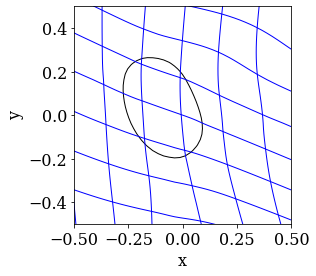

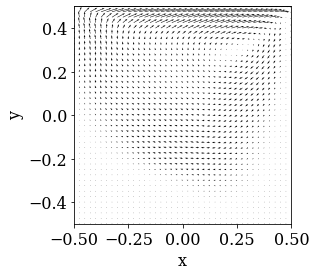

Level Set Advection Time:  0.0044498443603515625
------------ Time = 2.2009999999998686 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.994180705643174e-13
Total poisson time : 0.0003159046173095703
Total INS time : 0.0035321712493896484
Max, Min, U   : 2.0, -0.18225090625208928
Max, Min, V   : 0.3457546280412764, -0.5008613821680518
Max, Min, P   : -7.034976715095204, -9.053745040141086
Max, Min, DIV : 4.107825191113079e-15, -3.4416913763379853e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004421234130859375
------------ Time = 2.2019999999998685 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.7444500031390584e-15
Total poisson time : 0.00024247169494628906
Total INS time : 0.004238605499267578
Max, Min, U   : 2.0, -0.18226637397740791
Max, Min, V   : 0.3457552043571906, -0.500869623198058
Max, Min, P   : -7.035036379290423, -9.053816912836144
Max, Min, DIV : 3.608224830031759e-15, -3.7192471324942744e-1

Level Set Advection Time:  0.004913806915283203
------------ Time = 2.223999999999866 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6500645450640946e-14
Total poisson time : 0.00023126602172851562
Total INS time : 0.0034532546997070312
Max, Min, U   : 2.0, -0.18257736558045004
Max, Min, V   : 0.3457675808235882, -0.5010482044603711
Max, Min, P   : -7.218380868067641, -9.237419534450853
Max, Min, DIV : 3.9968028886505635e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004399538040161133
------------ Time = 2.224999999999866 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0339490816745606e-13
Total poisson time : 0.00023317337036132812
Total INS time : 0.0040514469146728516
Max, Min, U   : 2.0, -0.18259030527698772
Max, Min, V   : 0.3457681305119388, -0.5010561990728875
Max, Min, P   : -7.221102548192065, -9.240152472576556
Max, Min, DIV : 3.552713678800501e-15, -3.858025010572419e-1

Level Set Advection Time:  0.004419565200805664
------------ Time = 2.2479999999998634 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2963057761374364e-13
Total poisson time : 0.0002377033233642578
Total INS time : 0.004479169845581055
Max, Min, U   : 2.0, -0.18319566127858386
Max, Min, V   : 0.34578051041986047, -0.5012372272197535
Max, Min, P   : -7.4291753369782265, -9.448414483068706
Max, Min, DIV : 3.566591466608315e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004424095153808594
------------ Time = 2.2489999999998633 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3217976014727457e-13
Total poisson time : 0.00023293495178222656
Total INS time : 0.0034821033477783203
Max, Min, U   : 2.0, -0.18322543264099392
Max, Min, V   : 0.3457810386405137, -0.5012449787318028
Max, Min, P   : -7.425521544858179, -9.444770492927136
Max, Min, DIV : 4.218847493575595e-15, -4.107825191113079e-

Level Set Advection Time:  0.004395961761474609
------------ Time = 2.271999999999861 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.234638039038249e-13
Total poisson time : 0.00023293495178222656
Total INS time : 0.004558086395263672
Max, Min, U   : 2.0, -0.1838621430647086
Max, Min, V   : 0.3457930794058243, -0.5014209590665151
Max, Min, P   : -7.607754827161585, -9.627217800953401
Max, Min, DIV : 3.885780586188048e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004384040832519531
------------ Time = 2.2729999999998607 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0556725133778928e-14
Total poisson time : 0.00023698806762695312
Total INS time : 0.004000425338745117
Max, Min, U   : 2.0, -0.1838883177498624
Max, Min, V   : 0.34579359176978, -0.5014284948054161
Max, Min, P   : -7.608027721557895, -9.627500992349264
Max, Min, DIV : 3.989863994746656e-15, -3.9968028886505635e-15
Qin,

Level Set Advection Time:  0.004406452178955078
------------ Time = 2.295999999999858 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0950420419144995e-13
Total poisson time : 0.000232696533203125
Total INS time : 0.004437446594238281
Max, Min, U   : 2.0, -0.1844568499676478
Max, Min, V   : 0.3458052883591658, -0.5015996375398399
Max, Min, P   : -7.740672756809529, -9.760353223562625
Max, Min, DIV : 3.9968028886505635e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004370450973510742
------------ Time = 2.296999999999858 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.927929864622112e-14
Total poisson time : 0.00023818016052246094
Total INS time : 0.004103899002075195
Max, Min, U   : 2.0, -0.18448107778171283
Max, Min, V   : 0.34580580156968216, -0.5016070104648473
Max, Min, P   : -7.742526704463356, -9.76219493690638
Max, Min, DIV : 3.885780586188048e-15, -3.2751579226442118e-15
Qin

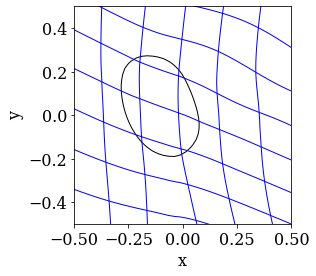

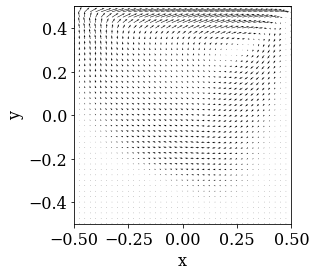

Level Set Advection Time:  0.004486560821533203
------------ Time = 2.3009999999998576 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.83819066716532e-13
Total poisson time : 0.00030517578125
Total INS time : 0.003552675247192383
Max, Min, U   : 2.0, -0.18457637382685355
Max, Min, V   : 0.3458078434211885, -0.5016364165292556
Max, Min, P   : -7.7549866296202214, -9.774693264573564
Max, Min, DIV : 3.552713678800501e-15, -3.7192471324942744e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004421234130859375
------------ Time = 2.3019999999998575 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.531246543115109e-13
Total poisson time : 0.00024127960205078125
Total INS time : 0.0035500526428222656
Max, Min, U   : 2.0, -0.18459980577040266
Max, Min, V   : 0.3458083512789652, -0.501643746534776
Max, Min, P   : -7.748061549030646, -9.767777718884886
Max, Min, DIV : 3.316791286067655e-15, -3.9968028886505635e-15
Qin, 

Level Set Advection Time:  0.004854679107666016
------------ Time = 2.323999999999855 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.000482841905922e-12
Total poisson time : 0.0002465248107910156
Total INS time : 0.003437519073486328
Max, Min, U   : 2.0, -0.18506218429856816
Max, Min, V   : 0.34581934261452446, -0.5018030102325439
Max, Min, P   : -7.853290555064439, -9.87320541845031
Max, Min, DIV : 4.052314039881821e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00438237190246582
------------ Time = 2.324999999999855 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3755563531617715e-13
Total poisson time : 0.00023365020751953125
Total INS time : 0.0034568309783935547
Max, Min, U   : 2.0, -0.18507803729461503
Max, Min, V   : 0.34581983594767235, -0.5018101646424981
Max, Min, P   : -7.8599173014746775, -9.879841747001876
Max, Min, DIV : 3.7192471324942744e-15, -3.9968028886505635e-15

Level Set Advection Time:  0.004389286041259766
------------ Time = 2.3479999999998524 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0504641070352166e-12
Total poisson time : 0.00023317337036132812
Total INS time : 0.004571437835693359
Max, Min, U   : 2.0, -0.18538952103670583
Max, Min, V   : 0.34583096463620516, -0.5019725259690514
Max, Min, P   : -8.074550229241384, -10.094670820631984
Max, Min, DIV : 3.9968028886505635e-15, -3.3861802251067274e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004412651062011719
------------ Time = 2.3489999999998523 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.352683802137002e-14
Total poisson time : 0.0002319812774658203
Total INS time : 0.003465890884399414
Max, Min, U   : 2.0, -0.18540212211740098
Max, Min, V   : 0.3458314398542592, -0.5019794919851904
Max, Min, P   : -8.072584264207485, -10.092714498987835
Max, Min, DIV : 3.552713678800501e-15, -4.440892098500626e

Max, Min, U   : 2.0, -0.18567232003921405
Max, Min, V   : 0.3458416756031198, -0.5021306851291878
Max, Min, P   : -8.16907741967574, -10.189389562260478
Max, Min, DIV : 3.9968028886505635e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004431486129760742
------------ Time = 2.37199999999985 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2314829346000546e-12
Total poisson time : 0.00023055076599121094
Total INS time : 0.0041234493255615234
Max, Min, U   : 2.0, -0.18568403965926192
Max, Min, V   : 0.3458421288632225, -0.5021374577972566
Max, Min, P   : -8.20133805012254, -10.221658827545497
Max, Min, DIV : 3.9968028886505635e-15, -3.3306690738754696e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004374265670776367
------------ Time = 2.3729999999998497 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.621439540184674e-13
Total poisson time : 0.00023055076599121094
Total INS



Level Set Advection Time:  0.004399538040161133
------------ Time = 2.3949999999998473 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7684303632502863e-13
Total poisson time : 0.00023174285888671875
Total INS time : 0.004221677780151367
Max, Min, U   : 2.0, -0.18590458541406343
Max, Min, V   : 0.3458524129170867, -0.5022911973143925
Max, Min, P   : -8.36615101575064, -10.386652423257296
Max, Min, DIV : 3.913536161803677e-15, -3.941291737419306e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004369974136352539
------------ Time = 2.395999999999847 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.729564407827667e-14
Total poisson time : 0.0002307891845703125
Total INS time : 0.004076957702636719
Max, Min, U   : 2.0, -0.1859112546143935
Max, Min, V   : 0.3458528545666534, -0.5022977977990516
Max, Min, P   : -8.36766587452209, -10.388174992986851
Max, Min, DIV : 3.885780586188048e-15, -3.1086244689504383e-15


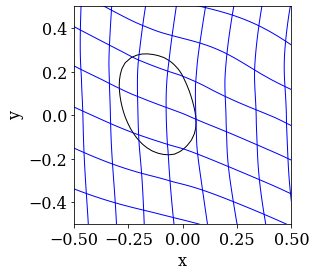

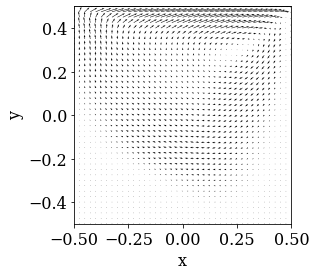

Level Set Advection Time:  0.0044519901275634766
------------ Time = 2.4009999999998466 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5848851666076926e-13
Total poisson time : 0.0003094673156738281
Total INS time : 0.003562450408935547
Max, Min, U   : 2.0, -0.1859432902458701
Max, Min, V   : 0.3458550522669723, -0.5023306880703013
Max, Min, P   : -8.454458699443506, -10.475011407993888
Max, Min, DIV : 4.135580766728708e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004427433013916016
------------ Time = 2.4019999999998465 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.921319324663313e-13
Total poisson time : 0.00024175643920898438
Total INS time : 0.0034782886505126953
Max, Min, U   : 2.0, -0.1859494774085845
Max, Min, V   : 0.3458554950815963, -0.5023372570305293
Max, Min, P   : -8.473755956368626, -10.49431042858149
Max, Min, DIV : 3.0531133177191805e-15, -3.0531133177191805e-1

Level Set Advection Time:  0.004784822463989258
------------ Time = 2.423999999999844 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3431803183076085e-12
Total poisson time : 0.0002315044403076172
Total INS time : 0.004027128219604492
Max, Min, U   : 2.0, -0.18604867201195605
Max, Min, V   : 0.34586494281301683, -0.5024796052268194
Max, Min, P   : -8.78384847306476, -10.804549705458482
Max, Min, DIV : 3.6637359812630166e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004663944244384766
------------ Time = 2.424999999999844 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1522528538207459e-13
Total poisson time : 0.00023221969604492188
Total INS time : 0.0034513473510742188
Max, Min, U   : 2.0, -0.186052155612901
Max, Min, V   : 0.3458653638282758, -0.5024859890576104
Max, Min, P   : -8.789557308400848, -10.810265008786109
Max, Min, DIV : 3.9968028886505635e-15, -3.774758283725532e-15

Level Set Advection Time:  0.00482940673828125
------------ Time = 2.4469999999998415 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2538540312035434e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.004023313522338867
Max, Min, U   : 2.0, -0.18626587067547942
Max, Min, V   : 0.3458745891074508, -0.5026249739569467
Max, Min, P   : -9.091571441432382, -11.112384689551293
Max, Min, DIV : 4.076600168545497e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004703998565673828
------------ Time = 2.4479999999998414 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1496653497891572e-14
Total poisson time : 0.00023126602172851562
Total INS time : 0.003934383392333984
Max, Min, U   : 2.0, -0.18628046327556202
Max, Min, V   : 0.34587500525850223, -0.5026312255868789
Max, Min, P   : -9.091870155719182, -11.11269014624135
Max, Min, DIV : 3.9968028886505635e-15, -3.677613769070831e-1



Level Set Advection Time:  0.004696846008300781
------------ Time = 2.470999999999839 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5885282572583677e-13
Total poisson time : 0.00023674964904785156
Total INS time : 0.004204511642456055
Max, Min, U   : 2.0, -0.18662460043046278
Max, Min, V   : 0.3458844719926852, -0.5027734033098668
Max, Min, P   : -9.316027644763425, -11.336964034347302
Max, Min, DIV : 4.348355443078988e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004422903060913086
------------ Time = 2.4719999999998388 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.79707549275343e-13
Total poisson time : 0.0002334117889404297
Total INS time : 0.004045248031616211
Max, Min, U   : 2.0, -0.1866398463663961
Max, Min, V   : 0.3458848820667782, -0.5027795252435259
Max, Min, P   : -9.323663136768234, -11.344605477020965
Max, Min, DIV : 3.3306690738754696e-15, -3.6637359812630166e-1

Level Set Advection Time:  0.004384517669677734
------------ Time = 2.4939999999998363 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.496362554246354e-13
Total poisson time : 0.00023317337036132812
Total INS time : 0.004682779312133789
Max, Min, U   : 2.0, -0.18690966429038308
Max, Min, V   : 0.3458939571922015, -0.5029133137168591
Max, Min, P   : -9.545110042611084, -11.566107847396161
Max, Min, DIV : 3.6637359812630166e-15, -2.886579864025407e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00437474250793457
------------ Time = 2.4949999999998362 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.520424189516546e-13
Total poisson time : 0.00023174285888671875
Total INS time : 0.0033850669860839844
Max, Min, U   : 2.0, -0.18692182106003183
Max, Min, V   : 0.3458943650736084, -0.5029193407776316
Max, Min, P   : -9.535226446516011, -11.5562288752604
Max, Min, DIV : 3.5388358909926865e-15, -3.3306690738754696e-1

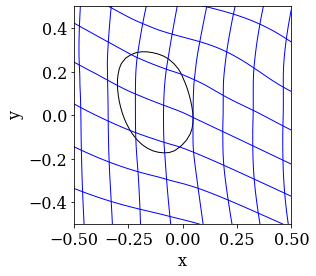

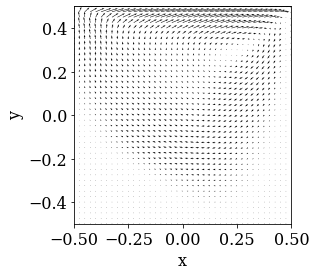

Level Set Advection Time:  0.0046062469482421875
------------ Time = 2.5009999999998356 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.348426079528569e-13
Total poisson time : 0.0003132820129394531
Total INS time : 0.003561258316040039
Max, Min, U   : 2.0, -0.18699377885529544
Max, Min, V   : 0.3458967940041917, -0.502955375012956
Max, Min, P   : -9.603307023390746, -11.624336358417983
Max, Min, DIV : 3.5110803153770576e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004465579986572266
------------ Time = 2.5019999999998355 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.050355619175177e-12
Total poisson time : 0.00024962425231933594
Total INS time : 0.004285335540771484
Max, Min, U   : 2.0, -0.1870055964375974
Max, Min, V   : 0.34589719587925594, -0.5029613594120012
Max, Min, P   : -9.631470754306756, -11.652504433117963
Max, Min, DIV : 3.6637359812630166e-15, -3.552713678800501e-

Level Set Advection Time:  0.0049495697021484375
------------ Time = 2.523999999999833 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0927089045748324e-13
Total poisson time : 0.00023245811462402344
Total INS time : 0.004029989242553711
Max, Min, U   : 2.0, -0.1871637707517766
Max, Min, V   : 0.3459057988136463, -0.5030913681568125
Max, Min, P   : -9.856429899514684, -11.87745892286596
Max, Min, DIV : 3.83026943495679e-15, -3.649858193455202e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004754066467285156
------------ Time = 2.524999999999833 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.279267270196452e-14
Total poisson time : 0.0002338886260986328
Total INS time : 0.003412961959838867
Max, Min, U   : 2.0, -0.1871672534622958
Max, Min, V   : 0.3459061774912631, -0.503097194744453
Max, Min, P   : -9.858691597705898, -11.879715739926114
Max, Min, DIV : 3.885780586188048e-15, -3.9968028886505635e-15
Qin,



Level Set Advection Time:  0.004415273666381836
------------ Time = 2.5479999999998304 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.108058506604213e-13
Total poisson time : 0.00023317337036132812
Total INS time : 0.00426936149597168
Max, Min, U   : 2.0, -0.1872240471089423
Max, Min, V   : 0.34591477729651987, -0.5032296867716762
Max, Min, P   : -10.178818362185346, -12.199912442828985
Max, Min, DIV : 3.552713678800501e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043947696685791016
------------ Time = 2.5489999999998303 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2601147634254256e-12
Total poisson time : 0.0002319812774658203
Total INS time : 0.004393339157104492
Max, Min, U   : 2.0, -0.18722591625895205
Max, Min, V   : 0.34591514600021905, -0.5032353815229308
Max, Min, P   : -10.213455553452206, -12.23456751933649
Max, Min, DIV : 3.7192471324942744e-15, -3.63598040564738

Level Set Advection Time:  0.004301548004150391
------------ Time = 2.569999999999828 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1098929507894004e-13
Total poisson time : 0.00023126602172851562
Total INS time : 0.003879547119140625
Max, Min, U   : 2.0, -0.18726425153394446
Max, Min, V   : 0.3459227963864249, -0.5033537716249858
Max, Min, P   : -10.37054910302311, -12.391783744851754
Max, Min, DIV : 3.83026943495679e-15, -4.3021142204224816e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004429817199707031
------------ Time = 2.570999999999828 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.717599130381246e-13
Total poisson time : 0.00023031234741210938
Total INS time : 0.003328084945678711
Max, Min, U   : 2.0, -0.18726597317923907
Max, Min, V   : 0.34592315602646895, -0.5033593523492527
Max, Min, P   : -10.383010870792104, -12.404249365855271
Max, Min, DIV : 3.1086244689504383e-15, -3.6914915568786455e

Level Set Advection Time:  0.0044748783111572266
------------ Time = 2.5939999999998253 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3853576234819877e-14
Total poisson time : 0.0002307891845703125
Total INS time : 0.0035877227783203125
Max, Min, U   : 2.0, -0.18726203339619715
Max, Min, V   : 0.34593140772689, -0.5034866326400396
Max, Min, P   : -10.57847656106469, -12.599792037587175
Max, Min, DIV : 3.6914915568786455e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004687309265136719
------------ Time = 2.5949999999998252 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0749785720747674e-12
Total poisson time : 0.0002295970916748047
Total INS time : 0.0040435791015625
Max, Min, U   : 2.0, -0.18726129770914365
Max, Min, V   : 0.3459317607561232, -0.5034921080471645
Max, Min, P   : -10.607331933659163, -12.628650442385531
Max, Min, DIV : 3.885780586188048e-15, -3.497202527569243e-15

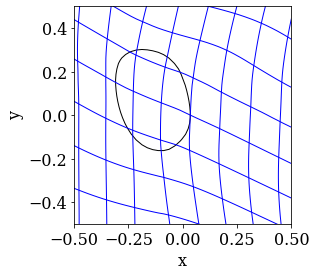

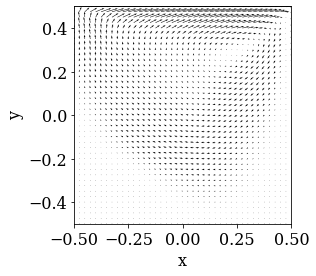

Level Set Advection Time:  0.004649639129638672
------------ Time = 2.6009999999998246 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.246678469989408e-13
Total poisson time : 0.0003097057342529297
Total INS time : 0.0035707950592041016
Max, Min, U   : 2.0, -0.18727903420334657
Max, Min, V   : 0.34593387067853965, -0.5035248623944686
Max, Min, P   : -10.704315382903921, -12.725664126185963
Max, Min, DIV : 3.6637359812630166e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.005075693130493164
------------ Time = 2.6019999999998245 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.85274102504274e-13
Total poisson time : 0.00024008750915527344
Total INS time : 0.004191160202026367
Max, Min, U   : 2.0, -0.1872917057322387
Max, Min, V   : 0.3459342212621446, -0.503530305936202
Max, Min, P   : -10.72290330381204, -12.74425033728174
Max, Min, DIV : 3.3306690738754696e-15, -3.164135620181696e-1

Level Set Advection Time:  0.0049397945404052734
------------ Time = 2.623999999999822 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4909495269414385e-14
Total poisson time : 0.00022983551025390625
Total INS time : 0.0040912628173828125
Max, Min, U   : 2.0, -0.1875422414898568
Max, Min, V   : 0.3459418574804408, -0.5036889336685139
Max, Min, P   : -10.91570848297633, -12.937145057285209
Max, Min, DIV : 4.135580766728708e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043621063232421875
------------ Time = 2.624999999999822 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.506547114078242e-13
Total poisson time : 0.00022983551025390625
Total INS time : 0.0035431385040283203
Max, Min, U   : 2.0, -0.18754930831939137
Max, Min, V   : 0.34594220771511663, -0.5036973077504783
Max, Min, P   : -10.900214807269185, -12.921645065330418
Max, Min, DIV : 3.497202527569243e-15, -3.552713678800501

Level Set Advection Time:  0.004872322082519531
------------ Time = 2.6469999999998195 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1378378437067385e-12
Total poisson time : 0.0002276897430419922
Total INS time : 0.004064321517944336
Max, Min, U   : 2.0, -0.18770223053152713
Max, Min, V   : 0.3459496851606228, -0.5038796054144578
Max, Min, P   : -11.158196264847593, -13.179681585999122
Max, Min, DIV : 3.635980405647388e-15, -3.0531133177191805e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004350900650024414
------------ Time = 2.6479999999998194 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.225700891046745e-13
Total poisson time : 0.00023436546325683594
Total INS time : 0.0035729408264160156
Max, Min, U   : 2.0, -0.18770902693097027
Max, Min, V   : 0.3459500175911329, -0.5038878094729256
Max, Min, P   : -11.149366509779098, -13.170854586096622
Max, Min, DIV : 3.7192471324942744e-15, -4.21884749357559

Level Set Advection Time:  0.004317283630371094
------------ Time = 2.670999999999817 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6405236610579376e-13
Total poisson time : 0.0002300739288330078
Total INS time : 0.004316091537475586
Max, Min, U   : 2.0, -0.18785178772364558
Max, Min, V   : 0.34595758437234436, -0.5040748120497045
Max, Min, P   : -11.291775057119095, -13.313309016238588
Max, Min, DIV : 3.774758283725532e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004433870315551758
------------ Time = 2.6719999999998167 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.078203356894416e-13
Total poisson time : 0.00022912025451660156
Total INS time : 0.003458261489868164
Max, Min, U   : 2.0, -0.18785696778023536
Max, Min, V   : 0.3459579118166194, -0.5040828764535648
Max, Min, P   : -11.278041020815568, -13.29957678830728
Max, Min, DIV : 4.218847493575595e-15, -4.052314039881821e-1

Level Set Advection Time:  0.004357576370239258
------------ Time = 2.694999999999814 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.683846738415564e-13
Total poisson time : 0.0002295970916748047
Total INS time : 0.004474639892578125
Max, Min, U   : 2.0, -0.18796744004662833
Max, Min, V   : 0.3459653128770894, -0.5042666300726713
Max, Min, P   : -11.567841730210763, -13.589385044314106
Max, Min, DIV : 4.3298697960381105e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0044269561767578125
------------ Time = 2.695999999999814 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.593540973871969e-13
Total poisson time : 0.0002281665802001953
Total INS time : 0.003563404083251953
Max, Min, U   : 2.0, -0.18797139457795645
Max, Min, V   : 0.3459656361180902, -0.5042745648981362
Max, Min, P   : -11.580215203885125, -13.601740267638803
Max, Min, DIV : 3.774758283725532e-15, -3.4416913763379853e-1

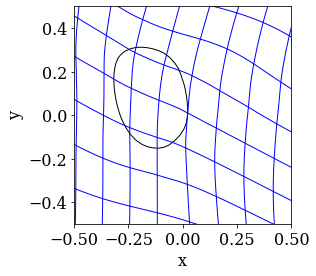

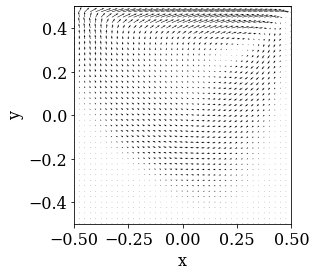

Level Set Advection Time:  0.004498958587646484
------------ Time = 2.7009999999998136 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2972083041102145e-12
Total poisson time : 0.00031065940856933594
Total INS time : 0.0035376548767089844
Max, Min, U   : 2.0, -0.18798193866996096
Max, Min, V   : 0.3459672708431152, -0.5043142298314033
Max, Min, P   : -11.574397182046047, -13.595879681281723
Max, Min, DIV : 3.885780586188048e-15, -4.08006961549745e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004391193389892578
------------ Time = 2.7019999999998134 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.391310210474164e-13
Total poisson time : 0.0002524852752685547
Total INS time : 0.0038504600524902344
Max, Min, U   : 2.0, -0.18798407757203717
Max, Min, V   : 0.3459675974702882, -0.5043221495952416
Max, Min, P   : -11.580782341801612, -13.60226484311926
Max, Min, DIV : 2.9698465908722937e-15, -3.6637359812630166

Level Set Advection Time:  0.0051157474517822266
------------ Time = 2.723999999999811 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.05086313443269e-13
Total poisson time : 0.00022983551025390625
Total INS time : 0.00397038459777832
Max, Min, U   : 2.0, -0.18799177324960525
Max, Min, V   : 0.3459746292497211, -0.5044949032181932
Max, Min, P   : -11.745753550047247, -13.767229586373798
Max, Min, DIV : 3.608224830031759e-15, -3.941291737419306e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004363536834716797
------------ Time = 2.724999999999811 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.504062098425394e-13
Total poisson time : 0.000232696533203125
Total INS time : 0.003470897674560547
Max, Min, U   : 2.0, -0.18799118903226858
Max, Min, V   : 0.34597494285672925, -0.5045026902199665
Max, Min, P   : -11.757175696100902, -13.778652976591887
Max, Min, DIV : 3.552713678800501e-15, -3.552713678800501e-15
Q

Level Set Advection Time:  0.005107402801513672
------------ Time = 2.7469999999998085 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.750156997925141e-13
Total poisson time : 0.0002295970916748047
Total INS time : 0.0038907527923583984
Max, Min, U   : 2.0, -0.18797910643965046
Max, Min, V   : 0.34598170299217473, -0.5046725123279706
Max, Min, P   : -11.946135117688549, -13.967633275525094
Max, Min, DIV : 3.9968028886505635e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004366874694824219
------------ Time = 2.7479999999998084 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5703277030141283e-13
Total poisson time : 0.00023293495178222656
Total INS time : 0.0037229061126708984
Max, Min, U   : 2.0, -0.18797856919901962
Max, Min, V   : 0.3459820043204292, -0.5046801640530195
Max, Min, P   : -11.950355097976487, -13.971853844249445
Max, Min, DIV : 3.6637359812630166e-15, -4.44089209850

Level Set Advection Time:  0.004878997802734375
------------ Time = 2.769999999999806 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2106178492295803e-13
Total poisson time : 0.00022792816162109375
Total INS time : 0.003535747528076172
Max, Min, U   : 2.0, -0.188089853545545
Max, Min, V   : 0.34598853822958175, -0.5048471163953472
Max, Min, P   : -12.156648445387459, -14.178139100477987
Max, Min, DIV : 3.802513859341161e-15, -3.788636071533347e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00431513786315918
------------ Time = 2.770999999999806 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.329755232621327e-13
Total poisson time : 0.0002300739288330078
Total INS time : 0.0033271312713623047
Max, Min, U   : 2.0, -0.18809858795142345
Max, Min, V   : 0.3459888329586472, -0.5048546502564122
Max, Min, P   : -12.17408816487845, -14.195578335107262
Max, Min, DIV : 4.052314039881821e-15, -4.163336342344337e-15
Q

Level Set Advection Time:  0.00491642951965332
------------ Time = 2.7929999999998034 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.9796125465488134e-13
Total poisson time : 0.00022840499877929688
Total INS time : 0.0034189224243164062
Max, Min, U   : 2.0, -0.18827943323743285
Max, Min, V   : 0.34599518338918944, -0.5050189477986238
Max, Min, P   : -12.310952821557862, -14.332399336882611
Max, Min, DIV : 3.774758283725532e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004503488540649414
------------ Time = 2.7939999999998033 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.776763511194013e-13
Total poisson time : 0.0002307891845703125
Total INS time : 0.00345611572265625
Max, Min, U   : 2.0, -0.18828722910430692
Max, Min, V   : 0.3459954664545203, -0.5050263510772097
Max, Min, P   : -12.303236644926132, -14.324681643292637
Max, Min, DIV : 3.566591466608315e-15, -4.218847493575595e-

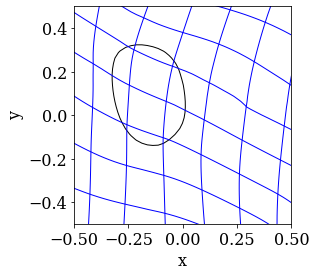

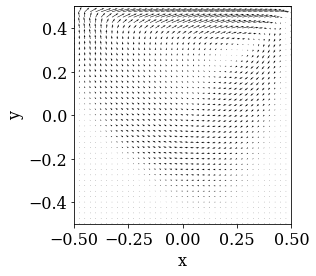

Level Set Advection Time:  0.0044324398040771484
------------ Time = 2.8009999999998025 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.964394286877814e-13
Total poisson time : 0.00031495094299316406
Total INS time : 0.0035653114318847656
Max, Min, U   : 2.0, -0.18834060360906013
Max, Min, V   : 0.34599743402076805, -0.5050780137776772
Max, Min, P   : -12.361889302546192, -14.383332959339393
Max, Min, DIV : 4.107825191113079e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004937887191772461
------------ Time = 2.8019999999998024 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.562092760703828e-13
Total poisson time : 0.0002739429473876953
Total INS time : 0.004447221755981445
Max, Min, U   : 2.0, -0.18834805881135364
Max, Min, V   : 0.3459977132269944, -0.5050853715528767
Max, Min, P   : -12.387366775226923, -14.408810159720481
Max, Min, DIV : 3.101685575046531e-15, -3.885780586188048

Level Set Advection Time:  0.005225419998168945
------------ Time = 2.8239999999998 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6275982865792259e-12
Total poisson time : 0.00023031234741210938
Total INS time : 0.0034558773040771484
Max, Min, U   : 2.0, -0.18844379034859504
Max, Min, V   : 0.3460041707810091, -0.5052474004930612
Max, Min, P   : -12.706036358275938, -14.72751339782488
Max, Min, DIV : 3.608224830031759e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004431724548339844
------------ Time = 2.8249999999998 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.3646458567226556e-13
Total poisson time : 0.0002491474151611328
Total INS time : 0.0038781166076660156
Max, Min, U   : 2.0, -0.1884481688456463
Max, Min, V   : 0.3460044526301636, -0.5052546970442754
Max, Min, P   : -12.715277282992535, -14.736770307218952
Max, Min, DIV : 3.608224830031759e-15, -4.052314039881821e-15
Qi

Level Set Advection Time:  0.00524139404296875
------------ Time = 2.8469999999997975 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.194082337130725e-13
Total poisson time : 0.00023031234741210938
Total INS time : 0.0033521652221679688
Max, Min, U   : 2.0, -0.18851528574177473
Max, Min, V   : 0.34601055021904503, -0.5054140440971322
Max, Min, P   : -13.0673397253598, -15.088838925811025
Max, Min, DIV : 3.774758283725532e-15, -4.274358644806853e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004351615905761719
------------ Time = 2.8479999999997974 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.327079036270661e-13
Total poisson time : 0.0002779960632324219
Total INS time : 0.004651784896850586
Max, Min, U   : 2.0, -0.1885180568821903
Max, Min, V   : 0.3460108183518132, -0.5054212165481329
Max, Min, P   : -13.05834906050238, -15.079846141292986
Max, Min, DIV : 3.9968028886505635e-15, -4.107825191113079e-15


Level Set Advection Time:  0.005505800247192383
------------ Time = 2.869999999999795 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.137250588156219e-13
Total poisson time : 0.00023746490478515625
Total INS time : 0.00331878662109375
Max, Min, U   : 2.0, -0.188575284195718
Max, Min, V   : 0.34601644135447074, -0.5055771101072937
Max, Min, P   : -13.200202384768682, -15.22162136972938
Max, Min, DIV : 4.218847493575595e-15, -3.469446951953614e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.006001710891723633
------------ Time = 2.870999999999795 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0168983098988927e-12
Total poisson time : 0.00055694580078125
Total INS time : 0.007820606231689453
Max, Min, U   : 2.0, -0.18857770528738063
Max, Min, V   : 0.34601668747180053, -0.5055841144284243
Max, Min, P   : -13.228067134318955, -15.249482530170162
Max, Min, DIV : 3.524958103184872e-15, -3.608224830031759e-15
Qin

Level Set Advection Time:  0.004926204681396484
------------ Time = 2.8929999999997924 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.738987281924455e-14
Total poisson time : 0.00023508071899414062
Total INS time : 0.003496408462524414
Max, Min, U   : 2.0, -0.18860291628103387
Max, Min, V   : 0.3460221254579483, -0.5057371458540489
Max, Min, P   : -13.438517605273724, -15.459961132805544
Max, Min, DIV : 3.5180192092809648e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004358530044555664
------------ Time = 2.8939999999997923 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4978069131460993e-13
Total poisson time : 0.0002338886260986328
Total INS time : 0.0034949779510498047
Max, Min, U   : 2.0, -0.18860231175435777
Max, Min, V   : 0.3460223682437827, -0.5057440416805529
Max, Min, P   : -13.448063009558624, -15.469506803259259
Max, Min, DIV : 3.969047313034935e-15, -4.440892098500626

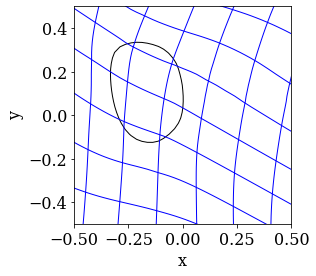

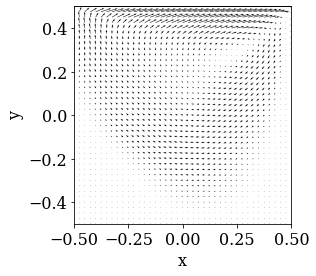

Level Set Advection Time:  0.0044329166412353516
------------ Time = 2.9009999999997915 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3147896887808917e-12
Total poisson time : 0.00031280517578125
Total INS time : 0.003583669662475586
Max, Min, U   : 2.0, -0.18859419387153561
Max, Min, V   : 0.3460240504141113, -0.5057921401992309
Max, Min, P   : -13.483411309622936, -15.504859665998868
Max, Min, DIV : 4.107825191113079e-15, -3.469446951953614e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004515171051025391
------------ Time = 2.9019999999997914 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.424353800864811e-13
Total poisson time : 0.0002510547637939453
Total INS time : 0.0037093162536621094
Max, Min, U   : 2.0, -0.18859258409488586
Max, Min, V   : 0.3460242897291188, -0.505798991214096
Max, Min, P   : -13.498247989578266, -15.51971197508726
Max, Min, DIV : 3.747002708109903e-15, -3.497202527569243e-15


Level Set Advection Time:  0.004472255706787109
------------ Time = 2.924999999999789 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.951912985844776e-13
Total poisson time : 0.00023603439331054688
Total INS time : 0.004522800445556641
Max, Min, U   : 2.0, -0.18855586403057875
Max, Min, V   : 0.3460296505128695, -0.5059549344498133
Max, Min, P   : -13.783158703875527, -15.80456146765998
Max, Min, DIV : 3.3306690738754696e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043413639068603516
------------ Time = 2.9259999999997888 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2575904967264115e-12
Total poisson time : 0.00023365020751953125
Total INS time : 0.003504514694213867
Max, Min, U   : 2.0, -0.18855429183936004
Max, Min, V   : 0.34602987856551715, -0.5059616478647551
Max, Min, P   : -13.81790819998121, -15.839323997755084
Max, Min, DIV : 3.774758283725532e-15, -3.330669073875469

Level Set Advection Time:  0.004332780838012695
------------ Time = 2.9489999999997862 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.5432999498429576e-13
Total poisson time : 0.00023555755615234375
Total INS time : 0.003908872604370117
Max, Min, U   : 2.0, -0.188518291375935
Max, Min, V   : 0.34603491739063935, -0.5061141988329684
Max, Min, P   : -13.972412260403239, -15.993789022592757
Max, Min, DIV : 3.885780586188048e-15, -4.274358644806853e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004365205764770508
------------ Time = 2.949999999999786 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.705196463327398e-13
Total poisson time : 0.0002300739288330078
Total INS time : 0.0037474632263183594
Max, Min, U   : 2.0, -0.18851646790712862
Max, Min, V   : 0.34603512856216384, -0.5061207518806675
Max, Min, P   : -13.996278127080721, -16.017649694638024
Max, Min, DIV : 4.246603069191224e-15, -4.218847493575595e-

Level Set Advection Time:  0.00440669059753418
------------ Time = 2.9729999999997836 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1148433162823336e-14
Total poisson time : 0.0002281665802001953
Total INS time : 0.0046482086181640625
Max, Min, U   : 2.0, -0.18847449286745177
Max, Min, V   : 0.3460398021366442, -0.5062695513710922
Max, Min, P   : -14.204278795212044, -16.22560546893847
Max, Min, DIV : 3.823330541052883e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004317522048950195
------------ Time = 2.9739999999997835 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.9906323054103706e-13
Total poisson time : 0.00023365020751953125
Total INS time : 0.0036749839782714844
Max, Min, U   : 2.0, -0.18847198393781506
Max, Min, V   : 0.3460399993247934, -0.5062759437491501
Max, Min, P   : -14.194185813392693, -16.215511872911552
Max, Min, DIV : 3.552713678800501e-15, -3.9968028886505635

Level Set Advection Time:  0.0043370723724365234
------------ Time = 2.996999999999781 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.807333484470174e-13
Total poisson time : 0.0002384185791015625
Total INS time : 0.004534006118774414
Max, Min, U   : 2.0, -0.1884021941561336
Max, Min, V   : 0.3460445809183679, -0.5064218171064995
Max, Min, P   : -14.478860067788291, -16.50019681657482
Max, Min, DIV : 3.885780586188048e-15, -2.9837243786801082e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004301309585571289
------------ Time = 2.997999999999781 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3500496589639223e-13
Total poisson time : 0.00023555755615234375
Total INS time : 0.003988981246948242
Max, Min, U   : 2.0, -0.1883987520571279
Max, Min, V   : 0.3460447772163513, -0.5064280973943132
Max, Min, P   : -14.47230989639319, -16.493648322001494
Max, Min, DIV : 3.0531133177191805e-15, -3.7192471324942744e-15

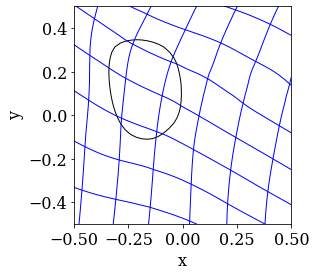

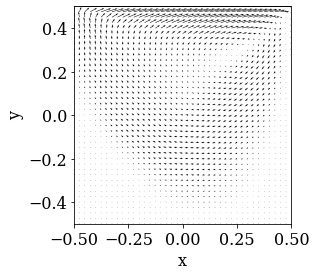

Level Set Advection Time:  0.0043792724609375
------------ Time = 3.0009999999997805 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.272261554039205e-13
Total poisson time : 0.0003108978271484375
Total INS time : 0.003520965576171875
Max, Min, U   : 2.0, -0.18838853812517667
Max, Min, V   : 0.34604536255396806, -0.5064468994326108
Max, Min, P   : -14.511216237147222, -16.532549285297957
Max, Min, DIV : 3.9968028886505635e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.005166053771972656
------------ Time = 3.0019999999997804 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4132299061803964e-12
Total poisson time : 0.00023674964904785156
Total INS time : 0.0038068294525146484
Max, Min, U   : 2.0, -0.1883851668355777
Max, Min, V   : 0.3460455549409342, -0.5064531497669619
Max, Min, P   : -14.550520098402018, -16.571854769437312
Max, Min, DIV : 3.885780586188048e-15, -3.9968028886505635e

Number of poisson iterations    : None
Final poisson residual : 4.955834736842689e-13
Total poisson time : 0.0002422332763671875
Total INS time : 0.004052400588989258
Max, Min, U   : 2.0, -0.18831373073308713
Max, Min, V   : 0.34604956097087264, -0.506588798218624
Max, Min, P   : -14.76113858275536, -16.78250701190291
Max, Min, DIV : 3.885780586188048e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.005775928497314453
------------ Time = 3.024999999999778 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.206928266696655e-13
Total poisson time : 0.0005011558532714844
Total INS time : 0.007057905197143555
Max, Min, U   : 2.0, -0.1883106391684212
Max, Min, V   : 0.3460497336999298, -0.5065948794180801
Max, Min, P   : -14.781621587516822, -16.802991358749253
Max, Min, DIV : 3.1086244689504383e-15, -2.8171909249863347e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004603147506713867
------------ Time = 3.025999

Level Set Advection Time:  0.004905223846435547
------------ Time = 3.0469999999997754 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6242601785504521e-12
Total poisson time : 0.00023221969604492188
Total INS time : 0.003925800323486328
Max, Min, U   : 2.0, -0.18823785993387737
Max, Min, V   : 0.3460533711415855, -0.5067268683853302
Max, Min, P   : -15.049991180356537, -17.071375796039607
Max, Min, DIV : 3.9968028886505635e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043468475341796875
------------ Time = 3.0479999999997753 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.9860911080287355e-13
Total poisson time : 0.00023126602172851562
Total INS time : 0.0040247440338134766
Max, Min, U   : 2.0, -0.18823410206330754
Max, Min, V   : 0.34605352648058574, -0.5067327767658879
Max, Min, P   : -15.057922362499298, -17.07930659545726
Max, Min, DIV : 3.941291737419306e-15, -3.55271367880

Level Set Advection Time:  0.004332542419433594
------------ Time = 3.070999999999773 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.991195886705622e-13
Total poisson time : 0.0002334117889404297
Total INS time : 0.004553794860839844
Max, Min, U   : 2.0, -0.1881478077571738
Max, Min, V   : 0.3460567899962282, -0.5068661122735612
Max, Min, P   : -15.26625376547771, -17.28777086805381
Max, Min, DIV : 4.052314039881821e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043337345123291016
------------ Time = 3.0719999999997727 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.630346651549798e-13
Total poisson time : 0.00022792816162109375
Total INS time : 0.003420591354370117
Max, Min, U   : 2.0, -0.18814419283039954
Max, Min, V   : 0.3460569217949558, -0.506871805239929
Max, Min, P   : -15.278678094053818, -17.300196982077473
Max, Min, DIV : 3.982925100842749e-15, -3.802513859341161e-15
Qi

Level Set Advection Time:  0.004339933395385742
------------ Time = 3.09499999999977 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.405387688290164e-13
Total poisson time : 0.00023055076599121094
Total INS time : 0.004368782043457031
Max, Min, U   : 2.0, -0.18805029219593714
Max, Min, V   : 0.34605966807471683, -0.5070001350281541
Max, Min, P   : -15.479984664278296, -17.501542608345538
Max, Min, DIV : 3.885780586188048e-15, -3.164135620181696e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043294429779052734
------------ Time = 3.09599999999977 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.621058432581347e-14
Total poisson time : 0.00022864341735839844
Total INS time : 0.0033447742462158203
Max, Min, U   : 2.0, -0.1880461332731084
Max, Min, V   : 0.346059777592464, -0.5070056046382622
Max, Min, P   : -15.481864907570987, -17.503423122848517
Max, Min, DIV : 4.107825191113079e-15, -3.552713678800501e-15


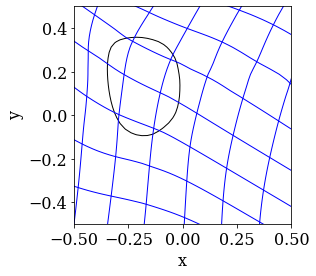

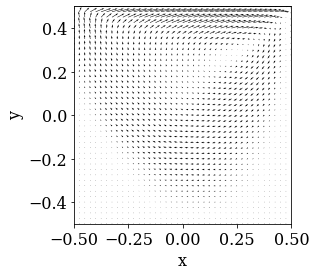

Level Set Advection Time:  0.0044291019439697266
------------ Time = 3.1009999999997695 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.018328268081248e-13
Total poisson time : 0.00030684471130371094
Total INS time : 0.0035505294799804688
Max, Min, U   : 2.0, -0.18805337825273694
Max, Min, V   : 0.3460602992933635, -0.5070327781795346
Max, Min, P   : -15.565924567817389, -17.58747409055705
Max, Min, DIV : 3.9968028886505635e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004452943801879883
------------ Time = 3.1019999999997694 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.02584750428172e-12
Total poisson time : 0.00024127960205078125
Total INS time : 0.003509521484375
Max, Min, U   : 2.0, -0.18805912267854225
Max, Min, V   : 0.34606040007745525, -0.5070381811478601
Max, Min, P   : -15.593690724768464, -17.615240291086323
Max, Min, DIV : 4.0419056990259605e-15, -4.3298697960381105e

Level Set Advection Time:  0.004376888275146484
------------ Time = 3.124999999999767 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.148851936447789e-13
Total poisson time : 0.00025773048400878906
Total INS time : 0.004431486129760742
Max, Min, U   : 2.0, -0.18817849408695583
Max, Min, V   : 0.3460625282907889, -0.5071599170315136
Max, Min, P   : -15.63620994886715, -17.657772936656606
Max, Min, DIV : 4.218847493575595e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043468475341796875
------------ Time = 3.1259999999997667 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.43106054947342e-13
Total poisson time : 0.0002467632293701172
Total INS time : 0.004311561584472656
Max, Min, U   : 2.0, -0.1881836324980974
Max, Min, V   : 0.34606260831613905, -0.5071650852068579
Max, Min, P   : -15.661623367089696, -17.683186962443084
Max, Min, DIV : 4.440892098500626e-15, -3.3306690738754696e-1

Level Set Advection Time:  0.004328250885009766
------------ Time = 3.148999999999764 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.247133963641625e-13
Total poisson time : 0.0002319812774658203
Total INS time : 0.0040967464447021484
Max, Min, U   : 2.0, -0.18830247039176012
Max, Min, V   : 0.34606414525575907, -0.5072809143996183
Max, Min, P   : -15.66440414897178, -17.68597060182156
Max, Min, DIV : 3.858025010572419e-15, -3.83026943495679e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004346370697021484
------------ Time = 3.149999999999764 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4727890707008845e-13
Total poisson time : 0.00023031234741210938
Total INS time : 0.0034296512603759766
Max, Min, U   : 2.0, -0.18830765917585532
Max, Min, V   : 0.34606419712352393, -0.5072858092640061
Max, Min, P   : -15.675843886874404, -17.69741067319674
Max, Min, DIV : 4.090477956353311e-15, -3.6637359812630166e-1

Level Set Advection Time:  0.0043468475341796875
------------ Time = 3.1729999999997616 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.844805984797083e-13
Total poisson time : 0.0002353191375732422
Total INS time : 0.004415273666381836
Max, Min, U   : 2.0, -0.1884218698057192
Max, Min, V   : 0.3460651587842604, -0.507395352333216
Max, Min, P   : -15.731490404667332, -17.75298400207464
Max, Min, DIV : 3.885780586188048e-15, -3.649858193455202e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043621063232421875
------------ Time = 3.1739999999997615 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.860638491662605e-13
Total poisson time : 0.0002319812774658203
Total INS time : 0.0039637088775634766
Max, Min, U   : 2.0, -0.18842589765572826
Max, Min, V   : 0.3460651952721083, -0.507399997284287
Max, Min, P   : -15.736479946041374, -17.757985128401423
Max, Min, DIV : 3.885780586188048e-15, -3.622102617839573e-15


Level Set Advection Time:  0.004342555999755859
------------ Time = 3.196999999999759 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.719682846516976e-13
Total poisson time : 0.00025963783264160156
Total INS time : 0.004564046859741211
Max, Min, U   : 2.0, -0.1885129658864735
Max, Min, V   : 0.3460655829037288, -0.5075030827078396
Max, Min, P   : -15.934437674875044, -17.955971588983488
Max, Min, DIV : 3.6637359812630166e-15, -3.8441472227646045e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.006258249282836914
------------ Time = 3.197999999999759 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4254928493321274e-13
Total poisson time : 0.00032258033752441406
Total INS time : 0.005118370056152344
Max, Min, U   : 2.0, -0.18851678103687752
Max, Min, V   : 0.3460655855085637, -0.5075074123741448
Max, Min, P   : -15.938325999172527, -17.959863224679406
Max, Min, DIV : 5.329070518200751e-15, -3.941291737419306e-

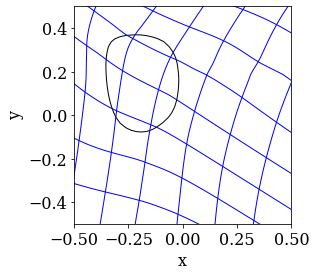

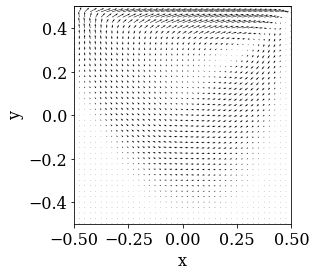

Level Set Advection Time:  0.0044901371002197266
------------ Time = 3.2009999999997585 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6034799657023978e-13
Total poisson time : 0.00030922889709472656
Total INS time : 0.003539562225341797
Max, Min, U   : 2.0, -0.18852824790938535
Max, Min, V   : 0.3460655845261294, -0.5075203190911125
Max, Min, P   : -15.999892444128177, -18.02143993261303
Max, Min, DIV : 3.816391647148976e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00435948371887207
------------ Time = 3.2019999999997584 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1894387709885904e-13
Total poisson time : 0.0002465248107910156
Total INS time : 0.0037860870361328125
Max, Min, U   : 2.0, -0.18853207722713647
Max, Min, V   : 0.3460655813247483, -0.5075245938965491
Max, Min, P   : -15.996756795686156, -18.01830780597727
Max, Min, DIV : 4.107825191113079e-15, -4.274358644806853e-

Level Set Advection Time:  0.004973888397216797
------------ Time = 3.223999999999756 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.728092863098646e-13
Total poisson time : 0.00023055076599121094
Total INS time : 0.003589630126953125
Max, Min, U   : 2.0, -0.18861701061180638
Max, Min, V   : 0.3460651726218139, -0.5076151472190481
Max, Min, P   : -16.222114079593624, -18.24374862805925
Max, Min, DIV : 4.052314039881821e-15, -3.497202527569243e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004347801208496094
------------ Time = 3.224999999999756 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.893296139699587e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.004169940948486328
Max, Min, U   : 2.0, -0.18862090193341427
Max, Min, V   : 0.34606513995614224, -0.5076191051312733
Max, Min, P   : -16.24134414635703, -18.26298298350244
Max, Min, DIV : 4.163336342344337e-15, -3.1363800445660672e-15
Q

Level Set Advection Time:  0.004369974136352539
------------ Time = 3.2479999999997533 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.1416285939667244e-15
Total poisson time : 0.0002353191375732422
Total INS time : 0.004253864288330078
Max, Min, U   : 2.0, -0.1887101771922501
Max, Min, V   : 0.3460640654854435, -0.5077062969668467
Max, Min, P   : -16.462840458528916, -18.484554703216155
Max, Min, DIV : 3.552713678800501e-15, -3.3861802251067274e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004345893859863281
------------ Time = 3.248999999999753 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.398365788235208e-14
Total poisson time : 0.00023293495178222656
Total INS time : 0.003962993621826172
Max, Min, U   : 2.0, -0.1887140954698073
Max, Min, V   : 0.34606400370330703, -0.5077099155364097
Max, Min, P   : -16.460636298739406, -18.482444907045835
Max, Min, DIV : 3.552713678800501e-15, -3.2057689836051395e-

Level Set Advection Time:  0.004348278045654297
------------ Time = 3.2719999999997507 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.565656079259793e-14
Total poisson time : 0.0005249977111816406
Total INS time : 0.0042514801025390625
Max, Min, U   : 2.0, -0.18879556589622648
Max, Min, V   : 0.3460624341971667, -0.5077897481787336
Max, Min, P   : -16.635855200115163, -18.65808170078021
Max, Min, DIV : 3.6637359812630166e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004348278045654297
------------ Time = 3.2729999999997506 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.0698963729556995e-13
Total poisson time : 0.0002434253692626953
Total INS time : 0.004024982452392578
Max, Min, U   : 2.0, -0.18879884975748631
Max, Min, V   : 0.34606235397690877, -0.5077930574064189
Max, Min, P   : -16.62725132940584, -18.6494860054691
Max, Min, DIV : 3.885780586188048e-15, -3.552713678800501e-15

Level Set Advection Time:  0.004354715347290039
------------ Time = 3.295999999999748 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3093805773269627e-13
Total poisson time : 0.00023436546325683594
Total INS time : 0.0041615962982177734
Max, Min, U   : 2.0, -0.18886982357272789
Max, Min, V   : 0.34605960179875983, -0.5078631235851296
Max, Min, P   : -16.716092555109462, -18.73897266796146
Max, Min, DIV : 4.052314039881821e-15, -3.9621084191310274e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004370450973510742
------------ Time = 3.296999999999748 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.646554165068337e-14
Total poisson time : 0.00023031234741210938
Total INS time : 0.004065513610839844
Max, Min, U   : 2.0, -0.18887287909950579
Max, Min, V   : 0.3460594556578419, -0.5078659292714903
Max, Min, P   : -16.716548475859376, -18.739572743621537
Max, Min, DIV : 4.246603069191224e-15, -3.774758283725532e

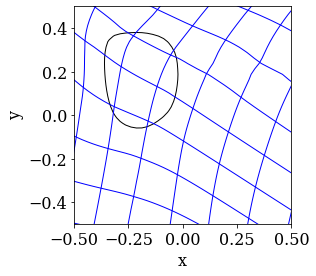

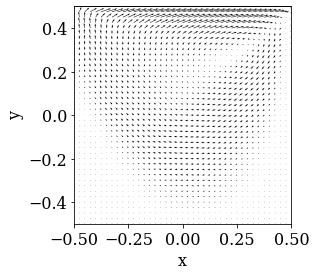

Level Set Advection Time:  0.004449605941772461
------------ Time = 3.3009999999997475 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.3664707108479736e-13
Total poisson time : 0.0003085136413574219
Total INS time : 0.0035543441772460938
Max, Min, U   : 2.0, -0.1888851370448988
Max, Min, V   : 0.34605885651846846, -0.5078769680882583
Max, Min, P   : -16.74910656417331, -18.77217499166632
Max, Min, DIV : 3.552713678800501e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004396915435791016
------------ Time = 3.3019999999997474 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.732906852805746e-13
Total poisson time : 0.00024008750915527344
Total INS time : 0.004197835922241211
Max, Min, U   : 2.0, -0.18888814037608823
Max, Min, V   : 0.34605870324686067, -0.5078796816088129
Max, Min, P   : -16.767100236935185, -18.790170548896366
Max, Min, DIV : 3.774758283725532e-15, -3.9968028886505635e

Level Set Advection Time:  0.004953622817993164
------------ Time = 3.323999999999745 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1266889169459233e-13
Total poisson time : 0.0002307891845703125
Total INS time : 0.0033674240112304688
Max, Min, U   : 2.0, -0.18895524159445784
Max, Min, V   : 0.34605476557460013, -0.5079340696042048
Max, Min, P   : -16.92986523632546, -18.95340737920611
Max, Min, DIV : 3.885780586188048e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004364013671875
------------ Time = 3.324999999999745 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.640426018065333e-13
Total poisson time : 0.00023293495178222656
Total INS time : 0.003368377685546875
Max, Min, U   : 2.0, -0.18895834648941648
Max, Min, V   : 0.34605455679406083, -0.5079362785332032
Max, Min, P   : -16.912342964590476, -18.935896057966456
Max, Min, DIV : 3.552713678800501e-15, -4.3298697960381105e-15


Number of poisson iterations    : None
Final poisson residual : 6.144078132378409e-13
Total poisson time : 0.0002536773681640625
Total INS time : 0.003851652145385742
Max, Min, U   : 2.0, -0.1891209248021777
Max, Min, V   : 0.34604960619412567, -0.5079797618225059
Max, Min, P   : -16.913517569729287, -18.93733916142844
Max, Min, DIV : 4.073130721593543e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004365205764770508
------------ Time = 3.3479999999997423 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5916867705645323e-13
Total poisson time : 0.00023508071899414062
Total INS time : 0.0041408538818359375
Max, Min, U   : 2.0, -0.1891399210729228
Max, Min, V   : 0.34604936122246427, -0.5079814937942281
Max, Min, P   : -16.920914780258173, -18.944745521661194
Max, Min, DIV : 3.6637359812630166e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004346370697021484
------------ Time = 3.34

Level Set Advection Time:  0.005012989044189453
------------ Time = 3.36999999999974 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.9949527064985215e-13
Total poisson time : 0.00023102760314941406
Total INS time : 0.003629446029663086
Max, Min, U   : 2.0, -0.18955032176962117
Max, Min, V   : 0.3460435950625131, -0.5080143266964987
Max, Min, P   : -16.947840172273253, -18.972049579653966
Max, Min, DIV : 4.163336342344337e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004342794418334961
------------ Time = 3.3709999999997398 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.346879828683761e-13
Total poisson time : 0.00024437904357910156
Total INS time : 0.0033762454986572266
Max, Min, U   : 2.0, -0.18956850650936735
Max, Min, V   : 0.3460433090178728, -0.5080155569571494
Max, Min, P   : -16.944172520187074, -18.96840219217886
Max, Min, DIV : 3.774758283725532e-15, -4.274358644806853e-1

Level Set Advection Time:  0.0043087005615234375
------------ Time = 3.3929999999997373 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.25208512519054e-14
Total poisson time : 0.00023174285888671875
Total INS time : 0.004054069519042969
Max, Min, U   : 2.0, -0.18995888033111566
Max, Min, V   : 0.34603663336217494, -0.5080370767278332
Max, Min, P   : -17.034523441923568, -19.059193804076365
Max, Min, DIV : 3.3306690738754696e-15, -3.7192471324942744e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004430055618286133
------------ Time = 3.3939999999997372 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2082822108162324e-13
Total poisson time : 0.00023436546325683594
Total INS time : 0.003411531448364258
Max, Min, U   : 2.0, -0.1899761290533836
Max, Min, V   : 0.34603630511125844, -0.5080377794795716
Max, Min, P   : -17.023627826286912, -19.048316425165236
Max, Min, DIV : 3.83026943495679e-15, -3.10862446895043

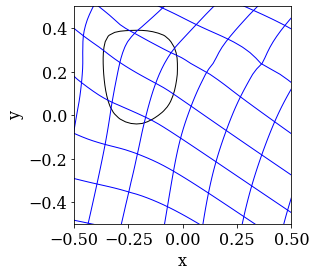

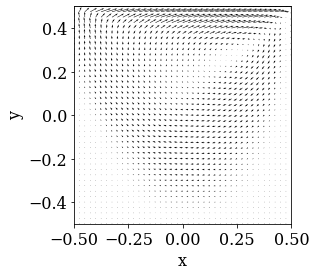

Level Set Advection Time:  0.004476308822631836
------------ Time = 3.4009999999997365 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.510416744448129e-13
Total poisson time : 0.00030922889709472656
Total INS time : 0.003596067428588867
Max, Min, U   : 2.0, -0.19009567006843764
Max, Min, V   : 0.3460339418981759, -0.5080419907352822
Max, Min, P   : -17.042550265358813, -19.067358513045036
Max, Min, DIV : 4.163336342344337e-15, -3.9065972678997696e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004415988922119141
------------ Time = 3.4019999999997363 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.79515499154939e-13
Total poisson time : 0.00024437904357910156
Total INS time : 0.004019737243652344
Max, Min, U   : 2.0, -0.19011255883423417
Max, Min, V   : 0.3460335943414581, -0.5080424885390371
Max, Min, P   : -17.06841500815114, -19.093245155240655
Max, Min, DIV : 3.6637359812630166e-15, -4.274358644806853e-

Level Set Advection Time:  0.006279945373535156
------------ Time = 3.423999999999734 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.352292904249066e-13
Total poisson time : 0.00044846534729003906
Total INS time : 0.005872011184692383
Max, Min, U   : 2.0, -0.1905729833154943
Max, Min, V   : 0.3460251076328021, -0.5080460270499408
Max, Min, P   : -17.300802565527917, -19.32602143624202
Max, Min, DIV : 3.774758283725532e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004453420639038086
------------ Time = 3.424999999999734 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2780106246271787e-12
Total poisson time : 0.0003268718719482422
Total INS time : 0.003645658493041992
Max, Min, U   : 2.0, -0.19059386880515766
Max, Min, V   : 0.3460246853527625, -0.508045840114073
Max, Min, P   : -17.334538056116525, -19.3597808620876
Max, Min, DIV : 3.9968028886505635e-15, -2.8935187579293142e-15
Q

Level Set Advection Time:  0.0049359798431396484
------------ Time = 3.4459999999997315 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.303032636787355e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.0038089752197265625
Max, Min, U   : 2.0, -0.19102157330863762
Max, Min, V   : 0.3460154014957925, -0.5080356779366966
Max, Min, P   : -17.38541131234258, -19.41123841926517
Max, Min, DIV : 3.83026943495679e-15, -3.219646771412954e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043201446533203125
------------ Time = 3.4469999999997314 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.412517364767291e-13
Total poisson time : 0.00024390220642089844
Total INS time : 0.0041065216064453125
Max, Min, U   : 2.0, -0.19104142859881373
Max, Min, V   : 0.34601493277812667, -0.5080348757174732
Max, Min, P   : -17.40253881276574, -19.42839764091959
Max, Min, DIV : 4.440892098500626e-15, -4.2760933682828295e-

Level Set Advection Time:  0.0043370723724365234
------------ Time = 3.469999999999729 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.873065549098602e-13
Total poisson time : 0.0002307891845703125
Total INS time : 0.003910541534423828
Max, Min, U   : 2.0, -0.19148221029452236
Max, Min, V   : 0.3460033636734699, -0.5080077450581587
Max, Min, P   : -17.53869547586465, -19.5653020479816
Max, Min, DIV : 3.6637359812630166e-15, -3.677613769070831e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004370212554931641
------------ Time = 3.4709999999997287 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3358633125668943e-13
Total poisson time : 0.0002295970916748047
Total INS time : 0.004010200500488281
Max, Min, U   : 2.0, -0.19150065388156212
Max, Min, V   : 0.3460028311259212, -0.5080061927268356
Max, Min, P   : -17.542221337426707, -19.56885471296489
Max, Min, DIV : 4.440892098500626e-15, -3.4139358007223564e-15


Level Set Advection Time:  0.00439763069152832
------------ Time = 3.493999999999726 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4306679850525953e-13
Total poisson time : 0.00024080276489257812
Total INS time : 0.0044097900390625
Max, Min, U   : 2.0, -0.1919109307923652
Max, Min, V   : 0.34598994678523143, -0.5079619182827656
Max, Min, P   : -17.703803741237472, -19.731156340045498
Max, Min, DIV : 4.125172425872847e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004378795623779297
------------ Time = 3.494999999999726 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.993424919226159e-13
Total poisson time : 0.0002522468566894531
Total INS time : 0.00399017333984375
Max, Min, U   : 2.0, -0.19192812946054466
Max, Min, V   : 0.34598934284264404, -0.5079595760455955
Max, Min, P   : -17.688054213537786, -19.71543663523887
Max, Min, DIV : 3.3306690738754696e-15, -4.440892098500626e-15
Qi

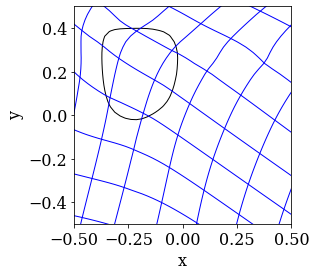

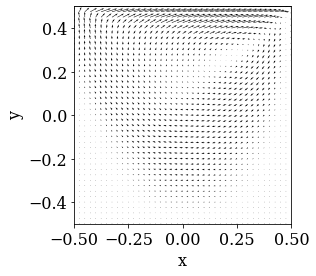

Level Set Advection Time:  0.004447460174560547
------------ Time = 3.5009999999997254 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.71333376496022e-13
Total poisson time : 0.00031280517578125
Total INS time : 0.003565073013305664
Max, Min, U   : 2.0, -0.19203000033498616
Max, Min, V   : 0.3459856432129299, -0.5079447456000818
Max, Min, P   : -17.645974400326136, -19.673550967369277
Max, Min, DIV : 3.3306690738754696e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043795108795166016
------------ Time = 3.5019999999997253 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.664309202916857e-13
Total poisson time : 0.0002448558807373047
Total INS time : 0.003409147262573242
Max, Min, U   : 2.0, -0.19204675810136843
Max, Min, V   : 0.34598501424836187, -0.5079421441304008
Max, Min, P   : -17.658452521926197, -19.686061305536867
Max, Min, DIV : 4.440892098500626e-15, -4.163336342344337e-15

Level Set Advection Time:  0.004372358322143555
------------ Time = 3.523999999999723 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.169715971445477e-13
Total poisson time : 0.00025963783264160156
Total INS time : 0.004170656204223633
Max, Min, U   : 2.0, -0.1923997328289397
Max, Min, V   : 0.3459703366523711, -0.5078754412884647
Max, Min, P   : -17.719729872047107, -19.747997085995465
Max, Min, DIV : 4.08006961549745e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004362344741821289
------------ Time = 3.524999999999723 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.811921039136037e-13
Total poisson time : 0.0003285408020019531
Total INS time : 0.0035088062286376953
Max, Min, U   : 2.0, -0.19241504394312484
Max, Min, V   : 0.34596963154450816, -0.5078719710823446
Max, Min, P   : -17.712084292947658, -19.740381418033866
Max, Min, DIV : 3.497202527569243e-15, -4.440892098500626e-15


------------ Time = 3.5469999999997204 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0108597906832402e-13
Total poisson time : 0.00023627281188964844
Total INS time : 0.0035431385040283203
Max, Min, U   : 2.0, -0.19273627720872183
Max, Min, V   : 0.3459533764571638, -0.5077859582956943
Max, Min, P   : -17.86835651673748, -19.8971668052675
Max, Min, DIV : 3.9968028886505635e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043828487396240234
------------ Time = 3.5479999999997203 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.9697791854224115e-13
Total poisson time : 0.0002529621124267578
Total INS time : 0.004208803176879883
Max, Min, U   : 2.0, -0.19275022563076014
Max, Min, V   : 0.34595260877060785, -0.5077816199216768
Max, Min, P   : -17.87855920760717, -19.907397092586724
Max, Min, DIV : 3.774758283725532e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advecti

Level Set Advection Time:  0.004361152648925781
------------ Time = 3.5709999999997177 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.623968552231073e-13
Total poisson time : 0.00025463104248046875
Total INS time : 0.004705905914306641
Max, Min, U   : 2.0, -0.1930530686298804
Max, Min, V   : 0.3459340983200999, -0.5076709053077889
Max, Min, P   : -18.0659467436021, -20.095781312790297
Max, Min, DIV : 3.6637359812630166e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00440526008605957
------------ Time = 3.5719999999997176 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6293458805906544e-13
Total poisson time : 0.0002925395965576172
Total INS time : 0.003455638885498047
Max, Min, U   : 2.0, -0.19306542159236173
Max, Min, V   : 0.34593324329272046, -0.5076655695851108
Max, Min, P   : -18.070269651323585, -20.10013119659263
Max, Min, DIV : 3.885780586188048e-15, -4.3298697960381105e-15

Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004426240921020508
------------ Time = 3.594999999999715 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.844098684026336e-13
Total poisson time : 0.00025463104248046875
Total INS time : 0.00421905517578125
Max, Min, U   : 2.0, -0.19332575779649405
Max, Min, V   : 0.34591132977699024, -0.5075262052339642
Max, Min, P   : -18.179055240773952, -20.210539603044673
Max, Min, DIV : 3.6637359812630166e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004367351531982422
------------ Time = 3.595999999999715 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.15022788267674e-14
Total poisson time : 0.000286102294921875
Total INS time : 0.0034313201904296875
Max, Min, U   : 2.0, -0.19333616964874364
Max, Min, V   : 0.3459103200155647, -0.5075195070799742
Max, Min, P   : -18.181339786628968, -20.212844043456126
Max, Min, DIV : 3.885780586188048e-

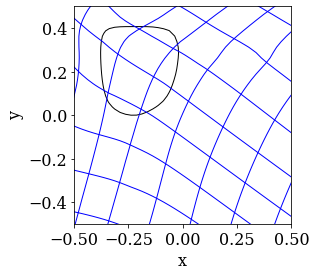

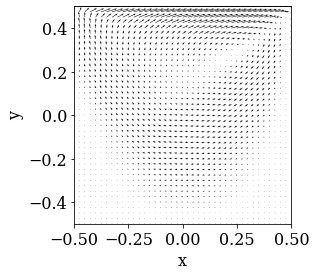

Level Set Advection Time:  0.0045011043548583984
------------ Time = 3.6009999999997144 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1090439587496523e-13
Total poisson time : 0.0003209114074707031
Total INS time : 0.0036468505859375
Max, Min, U   : 2.0, -0.19338710648388846
Max, Min, V   : 0.3459052216140598, -0.5074852819317223
Max, Min, P   : -18.282403306713086, -20.313992256788882
Max, Min, DIV : 3.83026943495679e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004925966262817383
------------ Time = 3.6019999999997143 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7750954494568032e-13
Total poisson time : 0.00025272369384765625
Total INS time : 0.0034439563751220703
Max, Min, U   : 2.0, -0.1933970691417082
Max, Min, V   : 0.34590419212107315, -0.5074782901199906
Max, Min, P   : -18.287148264703443, -20.318753548574097
Max, Min, DIV : 4.440892098500626e-15, -3.9968028886505635e

Level Set Advection Time:  0.0044040679931640625
------------ Time = 3.624999999999712 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3048793077624402e-13
Total poisson time : 0.00027179718017578125
Total INS time : 0.004163026809692383
Max, Min, U   : 2.0, -0.19360207885818193
Max, Min, V   : 0.3458791171257015, -0.5073020624845842
Max, Min, P   : -18.420218468827688, -20.45215072311189
Max, Min, DIV : 3.774758283725532e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004517793655395508
------------ Time = 3.6259999999997117 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.301114037176719e-13
Total poisson time : 0.00030875205993652344
Total INS time : 0.003865480422973633
Max, Min, U   : 2.0, -0.19360999857205755
Max, Min, V   : 0.3458779708719337, -0.5072937360528413
Max, Min, P   : -18.441002487357395, -20.472948405299515
Max, Min, DIV : 3.6637359812630166e-15, -3.774758283725532e

Level Set Advection Time:  0.0050814151763916016
------------ Time = 3.6479999999997093 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3058835354832643e-13
Total poisson time : 0.00023055076599121094
Total INS time : 0.0035321712493896484
Max, Min, U   : 2.0, -0.19384246423100657
Max, Min, V   : 0.3458515023020807, -0.5070959046423422
Max, Min, P   : -18.552662635993098, -20.58494260445211
Max, Min, DIV : 3.6637359812630166e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004700899124145508
------------ Time = 3.648999999999709 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3558681405981887e-13
Total poisson time : 0.000278472900390625
Total INS time : 0.003495454788208008
Max, Min, U   : 2.0, -0.19385248969539703
Max, Min, V   : 0.3458502414547752, -0.5070862383193836
Max, Min, P   : -18.55646605793579, -20.58876564512022
Max, Min, DIV : 3.774758283725532e-15, -3.3306690738754696e-

Level Set Advection Time:  0.005025148391723633
------------ Time = 3.6709999999997067 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4178662443115114e-13
Total poisson time : 0.0002346038818359375
Total INS time : 0.0037009716033935547
Max, Min, U   : 2.0, -0.1940535395787016
Max, Min, V   : 0.34582149954690705, -0.5068591395815182
Max, Min, P   : -18.730794039227, -20.76352644342551
Max, Min, DIV : 3.83026943495679e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0047724246978759766
------------ Time = 3.6719999999997066 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.794123327855894e-13
Total poisson time : 0.0002658367156982422
Total INS time : 0.0034329891204833984
Max, Min, U   : 2.0, -0.19406178889555592
Max, Min, V   : 0.34582013564534014, -0.5068481308350411
Max, Min, P   : -18.749672404871454, -20.782426728245454
Max, Min, DIV : 3.941291737419306e-15, -3.885780586188048e-1

Level Set Advection Time:  0.005070686340332031
------------ Time = 3.693999999999704 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.785302555563043e-13
Total poisson time : 0.00023245811462402344
Total INS time : 0.003464937210083008
Max, Min, U   : 2.0, -0.19422213449139608
Max, Min, V   : 0.3457886211716175, -0.506589298410435
Max, Min, P   : -18.865827276146792, -20.899349747368014
Max, Min, DIV : 4.052314039881821e-15, -3.5110803153770576e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004697322845458984
------------ Time = 3.694999999999704 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.1673288055553586e-13
Total poisson time : 0.00027680397033691406
Total INS time : 0.0035593509674072266
Max, Min, U   : 2.0, -0.19422846860254084
Max, Min, V   : 0.3457871318927447, -0.5065767968798136
Max, Min, P   : -18.876674741659567, -20.910589660473065
Max, Min, DIV : 4.440892098500626e-15, -3.573530360512223e-

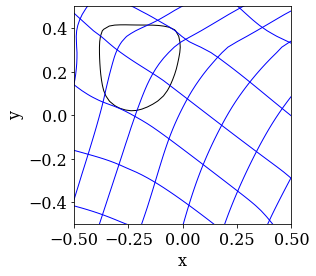

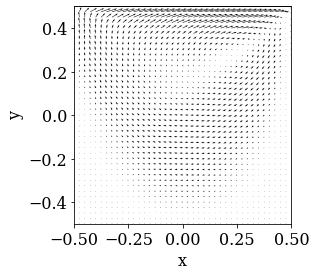

Level Set Advection Time:  0.004470348358154297
------------ Time = 3.7009999999997034 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0381484875729178e-13
Total poisson time : 0.0003204345703125
Total INS time : 0.0036008358001708984
Max, Min, U   : 2.0, -0.19426468258728108
Max, Min, V   : 0.3457780970295554, -0.506500441075201
Max, Min, P   : -18.92335435566976, -20.95766308482312
Max, Min, DIV : 3.552713678800501e-15, -3.7192471324942744e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0049190521240234375
------------ Time = 3.7019999999997033 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3353511230909558e-12
Total poisson time : 0.0002422332763671875
Total INS time : 0.00351715087890625
Max, Min, U   : 2.0, -0.19427041827006555
Max, Min, V   : 0.3457765742481891, -0.5064874884859116
Max, Min, P   : -18.88618152456175, -20.92052672583954
Max, Min, DIV : 3.7192471324942744e-15, -3.885780586188048e-15
Qi

Level Set Advection Time:  0.004403352737426758
------------ Time = 3.723999999999701 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.247059900494716e-13
Total poisson time : 0.00024056434631347656
Total INS time : 0.004192829132080078
Max, Min, U   : 2.0, -0.1943779163594877
Max, Min, V   : 0.34574193578479673, -0.5061864267591517
Max, Min, P   : -19.099887970302348, -21.135279085153677
Max, Min, DIV : 4.034966805122053e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004458427429199219
------------ Time = 3.7249999999997008 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.5110224796142784e-13
Total poisson time : 0.00030732154846191406
Total INS time : 0.004642486572265625
Max, Min, U   : 2.0, -0.1943818404755728
Max, Min, V   : 0.34574028464724477, -0.5061719217847204
Max, Min, P   : -19.109653084529217, -21.145098520200015
Max, Min, DIV : 4.107825191113079e-15, -3.7192471324942744e

Level Set Advection Time:  0.0050160884857177734
------------ Time = 3.7469999999996983 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.085543179221194e-13
Total poisson time : 0.0002357959747314453
Total INS time : 0.003560304641723633
Max, Min, U   : 2.0, -0.19444495835763165
Max, Min, V   : 0.34570228222041605, -0.5058338324271848
Max, Min, P   : -19.159950191809816, -21.196533371302127
Max, Min, DIV : 3.6637359812630166e-15, -4.371503159461554e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004781007766723633
------------ Time = 3.7479999999996982 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2094382613958883e-12
Total poisson time : 0.00024771690368652344
Total INS time : 0.003881692886352539
Max, Min, U   : 2.0, -0.19444677662693458
Max, Min, V   : 0.3457004813281554, -0.5058175925449805
Max, Min, P   : -19.1931059808751, -21.229739485578328
Max, Min, DIV : 3.83026943495679e-15, -3.9968028886505635e

Level Set Advection Time:  0.005159854888916016
------------ Time = 3.769999999999696 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0118664750570995e-13
Total poisson time : 0.00023794174194335938
Total INS time : 0.0036535263061523438
Max, Min, U   : 2.0, -0.1944629819293568
Max, Min, V   : 0.3456590016697718, -0.5054398322145464
Max, Min, P   : -19.252887358994457, -21.29064205809442
Max, Min, DIV : 3.9968028886505635e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0047359466552734375
------------ Time = 3.7709999999996957 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.703360116881977e-13
Total poisson time : 0.000263214111328125
Total INS time : 0.0034384727478027344
Max, Min, U   : 2.0, -0.19446255197390763
Max, Min, V   : 0.34565700178350595, -0.5054216143248043
Max, Min, P   : -19.271373020007335, -21.309174683998368
Max, Min, DIV : 3.885780586188048e-15, -4.107825191113079e

Level Set Advection Time:  0.004998207092285156
------------ Time = 3.7929999999996933 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.050263105111851e-13
Total poisson time : 0.00023484230041503906
Total INS time : 0.0033576488494873047
Max, Min, U   : 2.0, -0.19442590739379836
Max, Min, V   : 0.34561134013264033, -0.5049982218903504
Max, Min, P   : -19.421522519458705, -21.460575869439488
Max, Min, DIV : 3.552713678800501e-15, -2.9976021664879227e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0055735111236572266
------------ Time = 3.793999999999693 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0630903630887836e-13
Total poisson time : 0.0003788471221923828
Total INS time : 0.0058443546295166016
Max, Min, U   : 2.0, -0.19442695265663107
Max, Min, V   : 0.34560915455036384, -0.5049778803706241
Max, Min, P   : -19.411458724716322, -21.450559380385407
Max, Min, DIV : 4.3576253716537394e-15, -4.36456426555

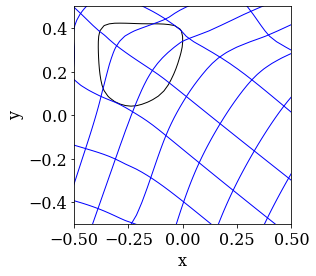

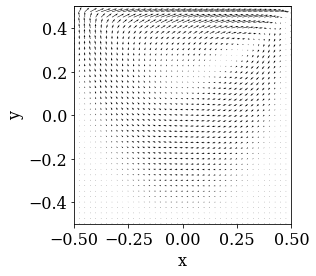

Level Set Advection Time:  0.004452943801879883
------------ Time = 3.8009999999996924 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.900580815872047e-13
Total poisson time : 0.00031638145446777344
Total INS time : 0.003648519515991211
Max, Min, U   : 2.0, -0.19443151261294744
Max, Min, V   : 0.34559372615232, -0.5048330978100547
Max, Min, P   : -19.401752451995858, -21.441195176526804
Max, Min, DIV : 4.3021142204224816e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004895925521850586
------------ Time = 3.8019999999996923 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.462622180001364e-13
Total poisson time : 0.00024437904357910156
Total INS time : 0.0037734508514404297
Max, Min, U   : 2.0, -0.19443184210485562
Max, Min, V   : 0.3455914870627831, -0.5048120345446468
Max, Min, P   : -19.386629201492685, -21.426120095272758
Max, Min, DIV : 4.246603069191224e-15, -2.886579864025407e-

Level Set Advection Time:  0.0051116943359375
------------ Time = 3.82399999999969 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.513527913247262e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.003818988800048828
Max, Min, U   : 2.0, -0.19441765059264485
Max, Min, V   : 0.34554002518900956, -0.5043240370467564
Max, Min, P   : -19.571661565583412, -21.611963730095116
Max, Min, DIV : 3.3306690738754696e-15, -4.274358644806853e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00481867790222168
------------ Time = 3.8249999999996898 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6840146188157078e-12
Total poisson time : 0.0002758502960205078
Total INS time : 0.003512859344482422
Max, Min, U   : 2.0, -0.1944160374006589
Max, Min, V   : 0.3455375963977232, -0.5043007477301003
Max, Min, P   : -19.616065467981304, -21.656398407861534
Max, Min, DIV : 3.83026943495679e-15, -3.497202527569243e-15
Qin

Level Set Advection Time:  0.004952907562255859
------------ Time = 3.8459999999996874 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.281490079534461e-12
Total poisson time : 0.000232696533203125
Total INS time : 0.003632783889770508
Max, Min, U   : 2.0, -0.19436220817512556
Max, Min, V   : 0.3454838292864159, -0.5037857300068701
Max, Min, P   : -19.760823476584385, -21.801732834154137
Max, Min, DIV : 3.552713678800501e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004670143127441406
------------ Time = 3.8469999999996873 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.239648648224216e-13
Total poisson time : 0.0002338886260986328
Total INS time : 0.0037751197814941406
Max, Min, U   : 2.0, -0.1943586595747317
Max, Min, V   : 0.3454811638499231, -0.5037599997445028
Max, Min, P   : -19.75752546349847, -21.798455996690073
Max, Min, DIV : 3.774758283725532e-15, -3.9968028886505635e-15


Level Set Advection Time:  0.004404306411743164
------------ Time = 3.869999999999685 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1258350297468862e-13
Total poisson time : 0.00023317337036132812
Total INS time : 0.004632711410522461
Max, Min, U   : 2.0, -0.19425182133141097
Max, Min, V   : 0.3454177786295988, -0.5031387671096863
Max, Min, P   : -19.89650839875265, -21.937770722702766
Max, Min, DIV : 3.552713678800501e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004390716552734375
------------ Time = 3.8709999999996847 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1260636632234563e-13
Total poisson time : 0.00023245811462402344
Total INS time : 0.004050016403198242
Max, Min, U   : 2.0, -0.1942460614756375
Max, Min, V   : 0.3454149262930249, -0.5031104464648557
Max, Min, P   : -19.89102710852672, -21.93229474977755
Max, Min, DIV : 4.107825191113079e-15, -3.774758283725532e-15


Level Set Advection Time:  0.004306316375732422
------------ Time = 3.8929999999996823 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.710299447983575e-13
Total poisson time : 0.00023627281188964844
Total INS time : 0.00430607795715332
Max, Min, U   : 2.0, -0.19409403939706316
Max, Min, V   : 0.3453526214433415, -0.5024656543970373
Max, Min, P   : -20.079226254675316, -22.12016138660384
Max, Min, DIV : 3.885780586188048e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043239593505859375
------------ Time = 3.893999999999682 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.593736623790042e-13
Total poisson time : 0.00022935867309570312
Total INS time : 0.003888845443725586
Max, Min, U   : 2.0, -0.19408603727156234
Max, Min, V   : 0.3453497445526102, -0.5024352821093697
Max, Min, P   : -20.06409112011475, -22.10501736926531
Max, Min, DIV : 3.3306690738754696e-15, -3.6637359812630166e-15

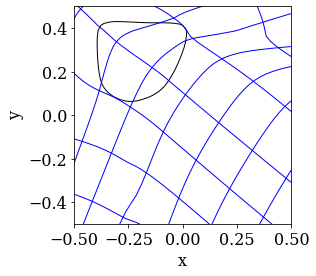

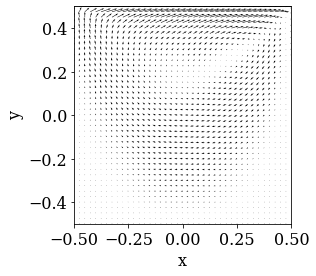

Level Set Advection Time:  0.004514217376708984
------------ Time = 3.9009999999996814 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.879212648433126e-13
Total poisson time : 0.00030994415283203125
Total INS time : 0.003718137741088867
Max, Min, U   : 2.0, -0.19402755061543267
Max, Min, V   : 0.3453291416214591, -0.5022191495318105
Max, Min, P   : -20.121412571827296, -22.162265433087125
Max, Min, DIV : 3.982925100842749e-15, -4.052314039881821e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0044400691986083984
------------ Time = 3.9019999999996813 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9775833205861027e-13
Total poisson time : 0.00024271011352539062
Total INS time : 0.004279136657714844
Max, Min, U   : 2.0, -0.19401873216115673
Max, Min, V   : 0.34532608263362785, -0.5021876022169701
Max, Min, P   : -20.126550806417022, -22.167389821588984
Max, Min, DIV : 3.774758283725532e-15, -3.99680288865056

Level Set Advection Time:  0.004974365234375
------------ Time = 3.923999999999679 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0210317270667668e-12
Total poisson time : 0.00022983551025390625
Total INS time : 0.003474712371826172
Max, Min, U   : 2.0, -0.19379747022699909
Max, Min, V   : 0.3452548133805407, -0.5014581888368586
Max, Min, P   : -20.367407282028008, -22.409206196869132
Max, Min, DIV : 4.107825191113079e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004368782043457031
------------ Time = 3.9249999999996787 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.160377091638508e-13
Total poisson time : 0.00024056434631347656
Total INS time : 0.003749847412109375
Max, Min, U   : 2.0, -0.193786278372017
Max, Min, V   : 0.34525139784194486, -0.5014234106171356
Max, Min, P   : -20.34732190070876, -22.38908445513011
Max, Min, DIV : 3.774758283725532e-15, -3.774758283725532e-15
Qin

Max, Min, P   : -20.41094622781594, -22.452439130173545
Max, Min, DIV : 3.816391647148976e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004337787628173828
------------ Time = 3.947999999999676 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.640705662296303e-14
Total poisson time : 0.0002453327178955078
Total INS time : 0.003789186477661133
Max, Min, U   : 2.0, -0.19357511147997128
Max, Min, V   : 0.34516778422266126, -0.5005800644357026
Max, Min, P   : -20.409292275190975, -22.450697529973233
Max, Min, DIV : 3.816391647148976e-15, -4.3298697960381105e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004359722137451172
------------ Time = 3.948999999999676 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.094606785857506e-13
Total poisson time : 0.0002295970916748047
Total INS time : 0.003413677215576172
Max, Min, U   : 2.0, -0.19356648840598123
Max, Min, V   : 0.34516394777

Level Set Advection Time:  0.0044133663177490234
------------ Time = 3.9709999999996737 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.59399961785586e-13
Total poisson time : 0.00023674964904785156
Total INS time : 0.004521608352661133
Max, Min, U   : 2.0, -0.1933586180443297
Max, Min, V   : 0.3450760595347794, -0.49965323522998895
Max, Min, P   : -20.670497880949597, -22.710392973621513
Max, Min, DIV : 4.052314039881821e-15, -4.052314039881821e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004360675811767578
------------ Time = 3.9719999999996736 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.211133369751306e-15
Total poisson time : 0.00023794174194335938
Total INS time : 0.0034999847412109375
Max, Min, U   : 2.0, -0.19334829429350367
Max, Min, V   : 0.34507196564645853, -0.4996111951546546
Max, Min, P   : -20.670360502821925, -22.71019742573767
Max, Min, DIV : 3.552713678800501e-15, -3.774758283725532e

Level Set Advection Time:  0.004826545715332031
------------ Time = 3.993999999999671 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2214115051907631e-12
Total poisson time : 0.0002315044403076172
Total INS time : 0.0037686824798583984
Max, Min, U   : 2.0, -0.1930928718933852
Max, Min, V   : 0.34498445857357174, -0.498666148708609
Max, Min, P   : -20.87461445035511, -22.913219706741646
Max, Min, DIV : 3.552713678800501e-15, -4.274358644806853e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004448413848876953
------------ Time = 3.994999999999671 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.157661541823244e-13
Total poisson time : 0.0002334117889404297
Total INS time : 0.003722667694091797
Max, Min, U   : 2.0, -0.19308026095424075
Max, Min, V   : 0.34498047769567214, -0.49863137281740105
Max, Min, P   : -20.849955531441346, -22.888492097399684
Max, Min, DIV : 3.635980405647388e-15, -2.886579864025407e-15

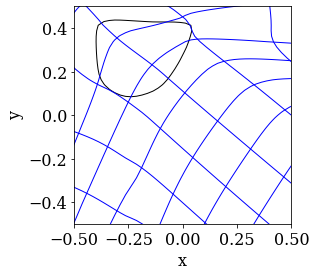

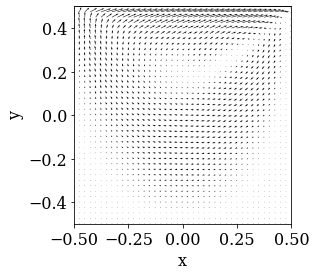

Level Set Advection Time:  0.004450321197509766
------------ Time = 4.000999999999671 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.179559555783838e-13
Total poisson time : 0.0003101825714111328
Total INS time : 0.0035500526428222656
Max, Min, U   : 2.0, -0.19300335931501358
Max, Min, V   : 0.3449558973357961, -0.4984195323133864
Max, Min, P   : -20.920510815754593, -22.958642446374636
Max, Min, DIV : 4.440892098500626e-15, -3.7192471324942744e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004399538040161133
------------ Time = 4.001999999999671 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1800712208412675e-13
Total poisson time : 0.00024175643920898438
Total INS time : 0.0042493343353271484
Max, Min, U   : 2.0, -0.1929903479651034
Max, Min, V   : 0.3449516898936813, -0.4983836917217842
Max, Min, P   : -20.92635777104835, -22.964381830502923
Max, Min, DIV : 3.885780586188048e-15, -3.774758283725532e-1

Max, Min, U   : 2.0, -0.19268909425258945
Max, Min, V   : 0.3448519306011682, -0.49755525950962476
Max, Min, P   : -21.08497226732414, -23.121498539319123
Max, Min, DIV : 3.802513859341161e-15, -4.3298697960381105e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004374265670776367
------------ Time = 4.024999999999679 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5554724379258837e-14
Total poisson time : 0.0002353191375732422
Total INS time : 0.0041043758392333984
Max, Min, U   : 2.0, -0.19267471298377056
Max, Min, V   : 0.34484709339118197, -0.4975157432819175
Max, Min, P   : -21.085745066083017, -23.122202514163245
Max, Min, DIV : 3.3306690738754696e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004338741302490234
------------ Time = 4.025999999999679 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2279055434215169e-13
Total poisson time : 0.00022935867309570312
Total



Level Set Advection Time:  0.004373311996459961
------------ Time = 4.0479999999996865 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1146773764106329e-13
Total poisson time : 0.0002357959747314453
Total INS time : 0.00396728515625
Max, Min, U   : 2.0, -0.19232559289968523
Max, Min, V   : 0.34473002928974056, -0.49656218919576794
Max, Min, P   : -21.142901412710994, -23.177931003065595
Max, Min, DIV : 3.6637359812630166e-15, -3.3306690738754696e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004381418228149414
------------ Time = 4.048999999999687 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.025674685143404e-13
Total poisson time : 0.00023245811462402344
Total INS time : 0.0033838748931884766
Max, Min, U   : 2.0, -0.19230947707959953
Max, Min, V   : 0.3447248031437527, -0.49651903153383636
Max, Min, P   : -21.161834681644734, -23.19679580518794
Max, Min, DIV : 4.218847493575595e-15, -3.996802888650563

Level Set Advection Time:  0.004340410232543945
------------ Time = 4.070999999999694 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2910249029056586e-13
Total poisson time : 0.0002295970916748047
Total INS time : 0.004190683364868164
Max, Min, U   : 2.0, -0.1919280394530011
Max, Min, V   : 0.34461658238483955, -0.4955551971169364
Max, Min, P   : -21.265125652333666, -23.29871448603666
Max, Min, DIV : 4.232725281383409e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004372358322143555
------------ Time = 4.0719999999996945 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.394663526137749e-13
Total poisson time : 0.00023698806762695312
Total INS time : 0.004040956497192383
Max, Min, U   : 2.0, -0.19190972613131219
Max, Min, V   : 0.34461151705685394, -0.49551001497265185
Max, Min, P   : -21.247551336650208, -23.280948120645768
Max, Min, DIV : 3.497202527569243e-15, -5.329070518200751e-

Level Set Advection Time:  0.006238698959350586
------------ Time = 4.094999999999702 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.7376293674277296e-13
Total poisson time : 0.0006346702575683594
Total INS time : 0.007467746734619141
Max, Min, U   : 2.0, -0.1914748366408853
Max, Min, V   : 0.34448357310925887, -0.4944152376143471
Max, Min, P   : -21.382908536652458, -23.414493172111257
Max, Min, DIV : 4.163336342344337e-15, -3.219646771412954e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004300355911254883
------------ Time = 4.0959999999997025 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.623207339140299e-14
Total poisson time : 0.00023484230041503906
Total INS time : 0.003484964370727539
Max, Min, U   : 2.0, -0.1914550867011621
Max, Min, V   : 0.34447812855732335, -0.49436665459375945
Max, Min, P   : -21.382062011490746, -23.41355380174744
Max, Min, DIV : 3.1086244689504383e-15, -4.440892098500626e-

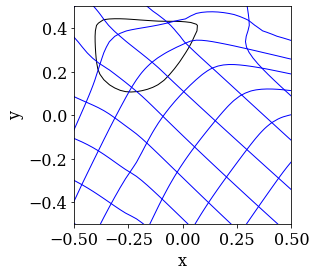

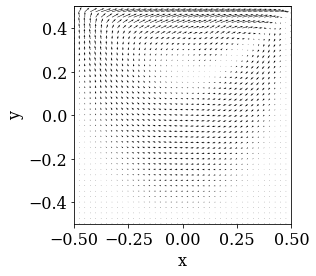

Level Set Advection Time:  0.0044100284576416016
------------ Time = 4.100999999999704 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.751926516254193e-13
Total poisson time : 0.00030875205993652344
Total INS time : 0.0035126209259033203
Max, Min, U   : 2.0, -0.19138037731824678
Max, Min, V   : 0.34445004103769516, -0.49412033377297543
Max, Min, P   : -21.401204793340952, -23.432235286100934
Max, Min, DIV : 4.218847493575595e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004535675048828125
------------ Time = 4.1019999999997045 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2497974068525858e-12
Total poisson time : 0.00040602684020996094
Total INS time : 0.00434422492980957
Max, Min, U   : 2.0, -0.19136823767115096
Max, Min, V   : 0.3444442619630458, -0.49407039244934947
Max, Min, P   : -21.43431128665475, -23.465263727334865
Max, Min, DIV : 3.552713678800501e-15, -3.55271367880050

Level Set Advection Time:  0.0048482418060302734
------------ Time = 4.123999999999712 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.598997086812974e-13
Total poisson time : 0.00032591819763183594
Total INS time : 0.004117727279663086
Max, Min, U   : 2.0, -0.19109291291631483
Max, Min, V   : 0.3443066032657674, -0.49291587478295656
Max, Min, P   : -21.54428418827774, -23.573155516669708
Max, Min, DIV : 4.093947403305265e-15, -3.5110803153770576e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004544973373413086
------------ Time = 4.124999999999712 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.064165799279888e-13
Total poisson time : 0.000232696533203125
Total INS time : 0.0034296512603759766
Max, Min, U   : 2.0, -0.1910800193082448
Max, Min, V   : 0.3443000224208651, -0.4928610887841954
Max, Min, P   : -21.528001231472164, -23.556776988991118
Max, Min, DIV : 3.164135620181696e-15, -3.802513859341161e-15

Level Set Advection Time:  0.004729270935058594
------------ Time = 4.14699999999972 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.553558907296941e-13
Total poisson time : 0.00022912025451660156
Total INS time : 0.0039691925048828125
Max, Min, U   : 2.0, -0.19078446722687795
Max, Min, V   : 0.3441599144019175, -0.49162665165784575
Max, Min, P   : -21.620322282927095, -23.647471546348708
Max, Min, DIV : 3.219646771412954e-15, -3.83026943495679e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004325151443481445
------------ Time = 4.14799999999972 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2486304057729378e-13
Total poisson time : 0.00023102760314941406
Total INS time : 0.0034627914428710938
Max, Min, U   : 2.0, -0.19076978671990527
Max, Min, V   : 0.3441558942020595, -0.4915738691950183
Max, Min, P   : -21.623828152555266, -23.6508321149051
Max, Min, DIV : 3.552713678800501e-15, -4.163336342344337e-15




Level Set Advection Time:  0.004317283630371094
------------ Time = 4.170999999999728 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3977068406857892e-13
Total poisson time : 0.00022840499877929688
Total INS time : 0.004332304000854492
Max, Min, U   : 2.0, -0.1904280977614218
Max, Min, V   : 0.3440216935703377, -0.4902579943132777
Max, Min, P   : -21.836286572699454, -23.86046501107373
Max, Min, DIV : 3.941291737419306e-15, -3.747002708109903e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004736185073852539
------------ Time = 4.171999999999728 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.234017273424276e-14
Total poisson time : 0.00023317337036132812
Total INS time : 0.0036995410919189453
Max, Min, U   : 2.0, -0.19041293425387762
Max, Min, V   : 0.3440145258039933, -0.49019670970008467
Max, Min, P   : -21.835082948206388, -23.859118320766086
Max, Min, DIV : 3.0531133177191805e-15, -4.052314039881821

Level Set Advection Time:  0.004793882369995117
------------ Time = 4.192999999999735 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1058412384031407e-13
Total poisson time : 0.0002281665802001953
Total INS time : 0.003664731979370117
Max, Min, U   : 2.0, -0.19008893226166412
Max, Min, V   : 0.34385337053654735, -0.4888501288425008
Max, Min, P   : -21.87154271001039, -23.893921124958442
Max, Min, DIV : 3.191891195797325e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043604373931884766
------------ Time = 4.193999999999735 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.26572095981895e-13
Total poisson time : 0.000232696533203125
Total INS time : 0.0034961700439453125
Max, Min, U   : 2.0, -0.1900728226903526
Max, Min, V   : 0.34384629564235236, -0.4887858314544156
Max, Min, P   : -21.888413602387814, -23.910692177061
Max, Min, DIV : 3.552713678800501e-15, -3.552713678800501e-15
Qin

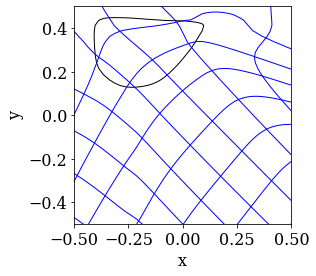

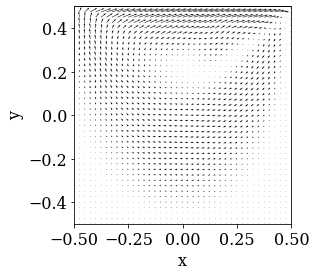

Level Set Advection Time:  0.0045948028564453125
------------ Time = 4.200999999999738 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.8436325128040513e-13
Total poisson time : 0.00031065940856933594
Total INS time : 0.0035440921783447266
Max, Min, U   : 2.0, -0.18995887585370622
Max, Min, V   : 0.3437942988727918, -0.48832662161080725
Max, Min, P   : -21.911957671834248, -23.933549004561563
Max, Min, DIV : 3.774758283725532e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.008830070495605469
------------ Time = 4.201999999999738 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0228567482876052e-12
Total poisson time : 0.0004980564117431641
Total INS time : 0.007053852081298828
Max, Min, U   : 2.0, -0.18994251626883302
Max, Min, V   : 0.3437866858427263, -0.4882600651843822
Max, Min, P   : -21.88497708161188, -23.906470351781383
Max, Min, DIV : 3.95516952522712e-15, -3.552713678800501e-

Level Set Advection Time:  0.004313468933105469
------------ Time = 4.223999999999745 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1952791642245975e-13
Total poisson time : 0.00023365020751953125
Total INS time : 0.0041005611419677734
Max, Min, U   : 2.0, -0.1895767229129599
Max, Min, V   : 0.3452378069821878, -0.4867460062865884
Max, Min, P   : -21.924802191284137, -23.944099237090704
Max, Min, DIV : 3.552713678800501e-15, -3.747002708109903e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004380941390991211
------------ Time = 4.224999999999746 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5772136593776165e-13
Total poisson time : 0.0002422332763671875
Total INS time : 0.0033483505249023438
Max, Min, U   : 2.0, -0.18955973751880348
Max, Min, V   : 0.3453685135007726, -0.4866747089753633
Max, Min, P   : -21.928330437722153, -23.947572755354386
Max, Min, DIV : 4.1772141301521515e-15, -3.608224830031759e

Level Set Advection Time:  0.004328012466430664
------------ Time = 4.247999999999753 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6640406490042187e-13
Total poisson time : 0.0002307891845703125
Total INS time : 0.004288196563720703
Max, Min, U   : 2.0, -0.18914605047988775
Max, Min, V   : 0.34818506719213865, -0.4851530799298781
Max, Min, P   : -22.004373654825134, -24.02163501553954
Max, Min, DIV : 3.552713678800501e-15, -3.1502578323738817e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004334926605224609
------------ Time = 4.248999999999754 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.596056952460362e-14
Total poisson time : 0.00022935867309570312
Total INS time : 0.003779172897338867
Max, Min, U   : 2.0, -0.18912779803076415
Max, Min, V   : 0.3482999445340715, -0.48508455215828117
Max, Min, P   : -22.005501405230163, -24.023216770178962
Max, Min, DIV : 4.163336342344337e-15, -4.052314039881821e-

Level Set Advection Time:  0.004797935485839844
------------ Time = 4.270999999999761 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.390687503502422e-13
Total poisson time : 0.0002288818359375
Total INS time : 0.0040435791015625
Max, Min, U   : 2.0, -0.18872319203999785
Max, Min, V   : 0.35109534160353073, -0.4834599921269017
Max, Min, P   : -22.17150692641216, -24.186859486283634
Max, Min, DIV : 3.552713678800501e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004523038864135742
------------ Time = 4.271999999999761 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.007447317150035e-14
Total poisson time : 0.0002300739288330078
Total INS time : 0.004023075103759766
Max, Min, U   : 2.0, -0.18870453391345257
Max, Min, V   : 0.35124821517513977, -0.48338158856589175
Max, Min, P   : -22.173277247561458, -24.188516101405227
Max, Min, DIV : 3.6637359812630166e-15, -4.218847493575595e-15
Qin

Level Set Advection Time:  0.0047495365142822266
------------ Time = 4.293999999999769 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.044532246547523e-13
Total poisson time : 0.0002422332763671875
Total INS time : 0.004060268402099609
Max, Min, U   : 2.0, -0.1882864916630108
Max, Min, V   : 0.3544009388489133, -0.4816070015120034
Max, Min, P   : -22.211767118891274, -24.225493958169018
Max, Min, DIV : 4.0245584642661925e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004529237747192383
------------ Time = 4.294999999999769 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.079089348598358e-14
Total poisson time : 0.00024056434631347656
Total INS time : 0.003871440887451172
Max, Min, U   : 2.0, -0.18826676137451498
Max, Min, V   : 0.35453467973035085, -0.4815276905027854
Max, Min, P   : -22.214092924098647, -24.227720652571804
Max, Min, DIV : 3.219646771412954e-15, -4.107825191113079e-

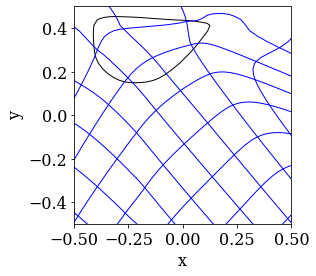

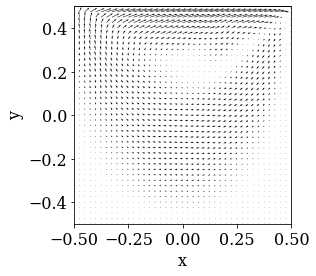

Level Set Advection Time:  0.004509449005126953
------------ Time = 4.300999999999771 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.004496415309599e-13
Total poisson time : 0.00031375885009765625
Total INS time : 0.0035381317138671875
Max, Min, U   : 2.0, -0.18814800243405413
Max, Min, V   : 0.3553203427276831, -0.4810488198453476
Max, Min, P   : -22.24044404028757, -24.253460255520118
Max, Min, DIV : 4.163336342344337e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004662036895751953
------------ Time = 4.301999999999771 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.395793269514545e-13
Total poisson time : 0.00024080276489257812
Total INS time : 0.0039365291595458984
Max, Min, U   : 2.0, -0.18812813714899196
Max, Min, V   : 0.3554484596815355, -0.4809685351037835
Max, Min, P   : -22.255398449141865, -24.268328612074207
Max, Min, DIV : 4.107825191113079e-15, -4.0245584642661925e-

Level Set Advection Time:  0.004363298416137695
------------ Time = 4.324999999999779 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.258226310015989e-13
Total poisson time : 0.00023293495178222656
Total INS time : 0.0040740966796875
Max, Min, U   : 2.0, -0.1876657775441349
Max, Min, V   : 0.35852362826752815, -0.4790876666694423
Max, Min, P   : -22.3735323539871, -24.384377968362855
Max, Min, DIV : 4.218847493575595e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0046041011810302734
------------ Time = 4.325999999999779 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2671691343652718e-13
Total poisson time : 0.00023627281188964844
Total INS time : 0.004230976104736328
Max, Min, U   : 2.0, -0.1876454057728517
Max, Min, V   : 0.35863104068097135, -0.47900456310353634
Max, Min, P   : -22.37037473932031, -24.381111716657465
Max, Min, DIV : 3.2751579226442118e-15, -3.6637359812630166e-15

Level Set Advection Time:  0.004835605621337891
------------ Time = 4.347999999999787 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1183092384418365e-13
Total poisson time : 0.00022840499877929688
Total INS time : 0.0036957263946533203
Max, Min, U   : 2.0, -0.1871797878138974
Max, Min, V   : 0.36086133035184953, -0.47741631564565157
Max, Min, P   : -22.311661202959534, -24.31986566069131
Max, Min, DIV : 3.0531133177191805e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004680156707763672
------------ Time = 4.348999999999787 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.501758864284613e-13
Total poisson time : 0.00023651123046875
Total INS time : 0.003515958786010742
Max, Min, U   : 2.0, -0.18715873246621037
Max, Min, V   : 0.36095391802072563, -0.4773364180687987
Max, Min, P   : -22.32687561738642, -24.334866823531303
Max, Min, DIV : 4.385380947269368e-15, -3.83026943495679e-15


Level Set Advection Time:  0.00490117073059082
------------ Time = 4.370999999999794 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.220800850094921e-13
Total poisson time : 0.0002338886260986328
Total INS time : 0.003426790237426758
Max, Min, U   : 2.0, -0.18669414198347753
Max, Min, V   : 0.3627728320133874, -0.4754368113975535
Max, Min, P   : -22.412830948608285, -24.416594537970923
Max, Min, DIV : 3.4416913763379853e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0046539306640625
------------ Time = 4.371999999999795 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.96522314564685e-13
Total poisson time : 0.00023031234741210938
Total INS time : 0.004138469696044922
Max, Min, U   : 2.0, -0.18667267548128733
Max, Min, V   : 0.3628455523361254, -0.4753459861475817
Max, Min, P   : -22.397212745363042, -24.400843086770568
Max, Min, DIV : 3.219646771412954e-15, -3.70536934468646e-15
Qin

Level Set Advection Time:  0.005043983459472656
------------ Time = 4.393999999999802 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0114043014037966e-13
Total poisson time : 0.0002295970916748047
Total INS time : 0.00407099723815918
Max, Min, U   : 2.0, -0.1862439934332699
Max, Min, V   : 0.3649343004344551, -0.4732926823059223
Max, Min, P   : -22.480190798902175, -24.480813865803686
Max, Min, DIV : 3.774758283725532e-15, -4.0245584642661925e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004661083221435547
------------ Time = 4.394999999999802 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.341666205508585e-13
Total poisson time : 0.00023889541625976562
Total INS time : 0.0042994022369384766
Max, Min, U   : 2.0, -0.1862252212550565
Max, Min, V   : 0.36504502928118643, -0.47320174438160667
Max, Min, P   : -22.462943113387812, -24.46341549493429
Max, Min, DIV : 4.052314039881821e-15, -3.774758283725532e-15

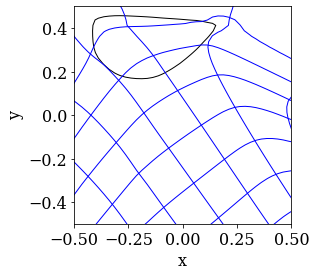

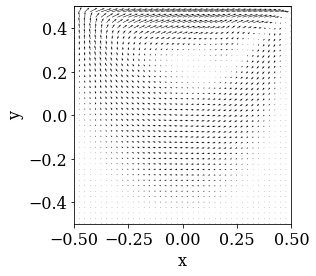

Level Set Advection Time:  0.004605531692504883
------------ Time = 4.400999999999804 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.867830830274724e-13
Total poisson time : 0.0003097057342529297
Total INS time : 0.003551006317138672
Max, Min, U   : 2.0, -0.1861120736763808
Max, Min, V   : 0.3656709663425439, -0.47265457977321756
Max, Min, P   : -22.51602311118013, -24.51562417012475
Max, Min, DIV : 3.7192471324942744e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004385948181152344
------------ Time = 4.401999999999805 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.540348046835517e-13
Total poisson time : 0.0002429485321044922
Total INS time : 0.004246234893798828
Max, Min, U   : 2.0, -0.18609312631679797
Max, Min, V   : 0.3657734463845715, -0.47256315098749224
Max, Min, P   : -22.52285320517722, -24.522298001593644
Max, Min, DIV : 3.6637359812630166e-15, -3.573530360512223e-15
Q

Level Set Advection Time:  0.005133628845214844
------------ Time = 4.423999999999812 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.705190495756092e-14
Total poisson time : 0.00023508071899414062
Total INS time : 0.003758668899536133
Max, Min, U   : 2.0, -0.18567171152481063
Max, Min, V   : 0.3677116864047996, -0.47053190911534304
Max, Min, P   : -22.70666286033695, -24.70236803259525
Max, Min, DIV : 3.9968028886505635e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004353761672973633
------------ Time = 4.424999999999812 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9797186665610295e-13
Total poisson time : 0.00023245811462402344
Total INS time : 0.0037512779235839844
Max, Min, U   : 2.0, -0.1856523081974846
Max, Min, V   : 0.36778767990504213, -0.47043849991209535
Max, Min, P   : -22.71188534422524, -24.707404700504057
Max, Min, DIV : 3.9968028886505635e-15, -4.3923198411732756

Level Set Advection Time:  0.0050508975982666016
------------ Time = 4.44699999999982 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.999759373465513e-13
Total poisson time : 0.0002288818359375
Total INS time : 0.0033235549926757812
Max, Min, U   : 2.0, -0.1852183050486423
Max, Min, V   : 0.3692701335045732, -0.4687062362702013
Max, Min, P   : -22.813355292260756, -24.805234507341243
Max, Min, DIV : 4.3298697960381105e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043451786041259766
------------ Time = 4.44799999999982 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.761228179380445e-13
Total poisson time : 0.0002307891845703125
Total INS time : 0.0037741661071777344
Max, Min, U   : 2.0, -0.18519870391391594
Max, Min, V   : 0.369328371829982, -0.4686203294847483
Max, Min, P   : -22.826272464691492, -24.81787312228557
Max, Min, DIV : 3.552713678800501e-15, -3.885780586188048e-15
Qin

Level Set Advection Time:  0.004340410232543945
------------ Time = 4.470999999999828 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.574113986493178e-13
Total poisson time : 0.00023102760314941406
Total INS time : 0.004456043243408203
Max, Min, U   : 2.0, -0.18474720427835567
Max, Min, V   : 0.3704451877672373, -0.46644016292306456
Max, Min, P   : -22.925209816344456, -24.91115498049864
Max, Min, DIV : 3.774758283725532e-15, -4.034966805122053e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004411220550537109
------------ Time = 4.471999999999828 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.128576606963186e-13
Total poisson time : 0.00037288665771484375
Total INS time : 0.0035445690155029297
Max, Min, U   : 2.0, -0.18472747167058481
Max, Min, V   : 0.3704843568821066, -0.46633779608905146
Max, Min, P   : -22.94144998551489, -24.927172274012978
Max, Min, DIV : 3.774758283725532e-15, -4.218847493575595e-1

Level Set Advection Time:  0.004845142364501953
------------ Time = 4.4939999999998355 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7865065440350965e-13
Total poisson time : 0.00023126602172851562
Total INS time : 0.0033354759216308594
Max, Min, U   : 2.0, -0.18423355415357368
Max, Min, V   : 0.371287232758718, -0.4639643469718026
Max, Min, P   : -22.879244523379292, -24.8605758547594
Max, Min, DIV : 4.218847493575595e-15, -4.052314039881821e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043871402740478516
------------ Time = 4.494999999999836 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.009313792614042e-13
Total poisson time : 0.0002384185791015625
Total INS time : 0.003882884979248047
Max, Min, U   : 2.0, -0.1842095594225684
Max, Min, V   : 0.371306065109185, -0.4638624907511174
Max, Min, P   : -22.89764115528078, -24.880393043485352
Max, Min, DIV : 3.927413949611491e-15, -3.6637359812630166e-15
Q

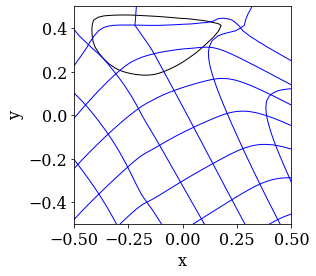

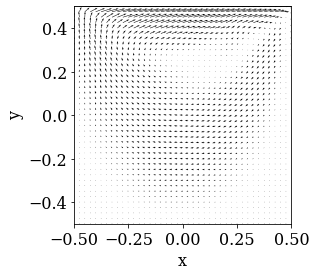

Level Set Advection Time:  0.004435539245605469
------------ Time = 4.500999999999838 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.619599369714046e-13
Total poisson time : 0.0003101825714111328
Total INS time : 0.00360870361328125
Max, Min, U   : 2.0, -0.1840685551900088
Max, Min, V   : 0.3714281135047214, -0.4632330886741625
Max, Min, P   : -22.924450508041094, -24.906344006072818
Max, Min, DIV : 3.913536161803677e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.005361318588256836
------------ Time = 4.501999999999838 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.444011507934883e-13
Total poisson time : 0.0002415180206298828
Total INS time : 0.003572702407836914
Max, Min, U   : 2.0, -0.18404516124439133
Max, Min, V   : 0.3714482616898954, -0.4631282721286166
Max, Min, P   : -22.94199139697741, -24.923739738880457
Max, Min, DIV : 4.107825191113079e-15, -3.552713678800501e-15
Qin,

Level Set Advection Time:  0.005132198333740234
------------ Time = 4.5239999999998455 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.373778618706713e-13
Total poisson time : 0.00022983551025390625
Total INS time : 0.003443479537963867
Max, Min, U   : 2.0, -0.18353056669563275
Max, Min, V   : 0.37123824764133406, -0.4608240535188701
Max, Min, P   : -23.120961501511523, -25.098808432840503
Max, Min, DIV : 3.9968028886505635e-15, -3.622102617839573e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.005122661590576172
------------ Time = 4.524999999999846 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.667311725752463e-13
Total poisson time : 0.00023889541625976562
Total INS time : 0.004173755645751953
Max, Min, U   : 2.0, -0.18350726325102315
Max, Min, V   : 0.3712116422119142, -0.46071895969325355
Max, Min, P   : -23.140175045654104, -25.117748366792025
Max, Min, DIV : 4.052314039881821e-15, -4.440892098500626

Level Set Advection Time:  0.004375457763671875
------------ Time = 4.546999999999853 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3398959096821521e-12
Total poisson time : 0.00023245811462402344
Total INS time : 0.004422187805175781
Max, Min, U   : 2.0, -0.18300881902232524
Max, Min, V   : 0.37047969345322845, -0.45861769888951204
Max, Min, P   : -23.25047890993595, -25.224999287166334
Max, Min, DIV : 3.649858193455202e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004390239715576172
------------ Time = 4.5479999999998535 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.970592767746754e-13
Total poisson time : 0.00023365020751953125
Total INS time : 0.004393577575683594
Max, Min, U   : 2.0, -0.18298603667129176
Max, Min, V   : 0.3704527942400091, -0.45853820220853586
Max, Min, P   : -23.236194615937453, -25.211581041055894
Max, Min, DIV : 4.274358644806853e-15, -3.989863994746656

Level Set Advection Time:  0.004366874694824219
------------ Time = 4.570999999999861 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.2275779756032643e-13
Total poisson time : 0.0002307891845703125
Total INS time : 0.0038585662841796875
Max, Min, U   : 2.0, -0.1824845535021749
Max, Min, V   : 0.3695664627939202, -0.4563115006634601
Max, Min, P   : -23.3549793418256, -25.324034082343566
Max, Min, DIV : 3.497202527569243e-15, -3.3306690738754696e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043828487396240234
------------ Time = 4.5719999999998615 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.382915998569645e-13
Total poisson time : 0.0002334117889404297
Total INS time : 0.004439592361450195
Max, Min, U   : 2.0, -0.18246557515596176
Max, Min, V   : 0.3695119244452035, -0.4562012627677687
Max, Min, P   : -23.372341287462643, -25.341132253330596
Max, Min, DIV : 3.552713678800501e-15, -3.9968028886505635e-1

Level Set Advection Time:  0.005214691162109375
------------ Time = 4.593999999999869 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0370564643829036e-12
Total poisson time : 0.00022792816162109375
Total INS time : 0.0033757686614990234
Max, Min, U   : 2.0, -0.18204403865462418
Max, Min, V   : 0.3680781089683344, -0.4536136842170923
Max, Min, P   : -23.397585885620302, -25.361276635648974
Max, Min, DIV : 3.706236706424448e-15, -3.7192471324942744e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.005037546157836914
------------ Time = 4.594999999999869 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0831528108811567e-12
Total poisson time : 0.0002357959747314453
Total INS time : 0.0035216808319091797
Max, Min, U   : 2.0, -0.1820249138087922
Max, Min, V   : 0.3680093137881764, -0.4534891922745317
Max, Min, P   : -23.368908275016615, -25.33243720722253
Max, Min, DIV : 3.8441472227646045e-15, -4.218847493575595e

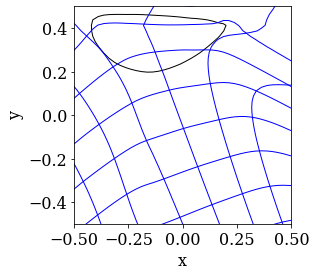

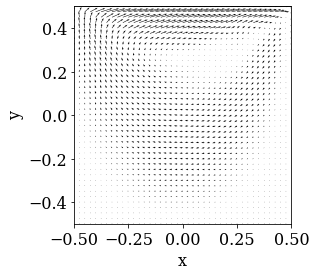

Level Set Advection Time:  0.004434108734130859
------------ Time = 4.600999999999871 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.551780862152951e-13
Total poisson time : 0.00033283233642578125
Total INS time : 0.0037343502044677734
Max, Min, U   : 2.0, -0.1819101658256849
Max, Min, V   : 0.3676076623913681, -0.45273096833677967
Max, Min, P   : -23.372718180451965, -25.335431922244453
Max, Min, DIV : 3.6637359812630166e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004806041717529297
------------ Time = 4.6019999999998715 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.637712337404996e-13
Total poisson time : 0.00024509429931640625
Total INS time : 0.0041310787200927734
Max, Min, U   : 2.0, -0.18189103492739642
Max, Min, V   : 0.36754238700101816, -0.4526030202876511
Max, Min, P   : -23.377396308500472, -25.339997982120174
Max, Min, DIV : 3.885780586188048e-15, -3.60822483003175

Level Set Advection Time:  0.004933595657348633
------------ Time = 4.623999999999879 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.926695602099942e-13
Total poisson time : 0.00022983551025390625
Total INS time : 0.003663778305053711
Max, Min, U   : 2.0, -0.18146093848584063
Max, Min, V   : 0.36527062562055657, -0.4500154343598635
Max, Min, P   : -23.48179397333054, -25.44369327586619
Max, Min, DIV : 3.885780586188048e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0048487186431884766
------------ Time = 4.624999999999879 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1768829368018945e-13
Total poisson time : 0.00023174285888671875
Total INS time : 0.0033309459686279297
Max, Min, U   : 2.0, -0.1814412348445119
Max, Min, V   : 0.3651703129806972, -0.4498980404171842
Max, Min, P   : -23.485152794776663, -25.446999240677947
Max, Min, DIV : 3.774758283725532e-15, -3.1086244689504383e-

Level Set Advection Time:  0.004891395568847656
------------ Time = 4.6469999999998866 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.463955375492699e-13
Total poisson time : 0.00022864341735839844
Total INS time : 0.003671407699584961
Max, Min, U   : 2.0, -0.18102563288833975
Max, Min, V   : 0.36319689098994035, -0.44716706488049224
Max, Min, P   : -23.436715343736957, -25.396597348151303
Max, Min, DIV : 3.608224830031759e-15, -3.747002708109903e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0049266815185546875
------------ Time = 4.647999999999887 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1312768149452798e-12
Total poisson time : 0.0002338886260986328
Total INS time : 0.00414586067199707
Max, Min, U   : 2.0, -0.18100671083162873
Max, Min, V   : 0.3631166757492008, -0.44704252966961167
Max, Min, P   : -23.46764352274734, -25.42752964222547
Max, Min, DIV : 4.440892098500626e-15, -3.400058012914542e-

Level Set Advection Time:  0.0045032501220703125
------------ Time = 4.670999999999895 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.805276635144027e-13
Total poisson time : 0.00023365020751953125
Total INS time : 0.004426240921020508
Max, Min, U   : 2.0, -0.18056748168077175
Max, Min, V   : 0.36130842621282006, -0.4451726168321941
Max, Min, P   : -23.60968346119786, -25.570292571176875
Max, Min, DIV : 3.885780586188048e-15, -2.886579864025407e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004565238952636719
------------ Time = 4.671999999999895 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.804325943083957e-13
Total poisson time : 0.00023245811462402344
Total INS time : 0.004285573959350586
Max, Min, U   : 2.0, -0.1805487438627493
Max, Min, V   : 0.3612316479010913, -0.44515675537061095
Max, Min, P   : -23.615774990085416, -25.577521822113944
Max, Min, DIV : 3.95516952522712e-15, -4.163336342344337e-15

Level Set Advection Time:  0.0052378177642822266
------------ Time = 4.693999999999902 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.44003555448931e-13
Total poisson time : 0.0002377033233642578
Total INS time : 0.003783702850341797
Max, Min, U   : 2.0, -0.18013220990231077
Max, Min, V   : 0.35954670082145185, -0.4445797574723803
Max, Min, P   : -23.664860841556802, -25.625140849468213
Max, Min, DIV : 3.3306690738754696e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.006681680679321289
------------ Time = 4.694999999999903 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.552194469489762e-13
Total poisson time : 0.00023484230041503906
Total INS time : 0.0033676624298095703
Max, Min, U   : 2.0, -0.18011288466107594
Max, Min, V   : 0.35942788515333873, -0.44454393903910816
Max, Min, P   : -23.680190191582522, -25.636620273321174
Max, Min, DIV : 3.6637359812630166e-15, -3.96904731303493

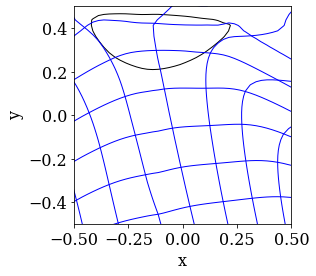

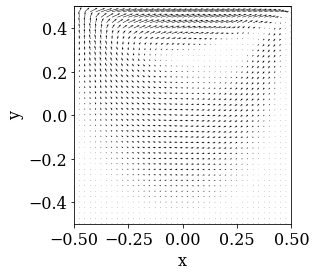

Level Set Advection Time:  0.0046234130859375
------------ Time = 4.700999999999905 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5694872971481307e-13
Total poisson time : 0.0003070831298828125
Total INS time : 0.0036468505859375
Max, Min, U   : 2.0, -0.1799967217028663
Max, Min, V   : 0.35878993083417704, -0.4443118778300801
Max, Min, P   : -23.696960925331112, -25.653181551328235
Max, Min, DIV : 3.677613769070831e-15, -3.1363800445660672e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004428386688232422
------------ Time = 4.701999999999905 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.252429290962924e-13
Total poisson time : 0.0002505779266357422
Total INS time : 0.003930330276489258
Max, Min, U   : 2.0, -0.17997873223381233
Max, Min, V   : 0.35868386116987194, -0.44427030236824805
Max, Min, P   : -23.702939267749382, -25.65906607819047
Max, Min, DIV : 3.608224830031759e-15, -4.08006961549745e-15
Qin

Level Set Advection Time:  0.008263349533081055
------------ Time = 4.723999999999912 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.098520890008989e-13
Total poisson time : 0.0002295970916748047
Total INS time : 0.0040934085845947266
Max, Min, U   : 2.0, -0.17957831170542468
Max, Min, V   : 0.3565694535087246, -0.4431933425788502
Max, Min, P   : -23.694667169153828, -25.650915037871503
Max, Min, DIV : 4.3021142204224816e-15, -4.343747583845925e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004393815994262695
------------ Time = 4.724999999999913 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.628514745159811e-13
Total poisson time : 0.00024056434631347656
Total INS time : 0.006407499313354492
Max, Min, U   : 2.0, -0.17956008257981856
Max, Min, V   : 0.356486846146216, -0.44314491640089876
Max, Min, P   : -23.676690957126485, -25.632994045642793
Max, Min, DIV : 3.552713678800501e-15, -4.107825191113079e-1

Level Set Advection Time:  0.004971027374267578
------------ Time = 4.74599999999992 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.995410141309028e-13
Total poisson time : 0.00023055076599121094
Total INS time : 0.003763437271118164
Max, Min, U   : 2.0, -0.1791786807923675
Max, Min, V   : 0.3548338656053834, -0.44209693230935093
Max, Min, P   : -23.64721287562205, -25.604635900451086
Max, Min, DIV : 3.164135620181696e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043735504150390625
------------ Time = 4.74699999999992 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3434432571949202e-12
Total poisson time : 0.00023555755615234375
Total INS time : 0.004517555236816406
Max, Min, U   : 2.0, -0.17916073120557044
Max, Min, V   : 0.3547471099383595, -0.4420460131864154
Max, Min, P   : -23.609086110679073, -25.56693225379591
Max, Min, DIV : 3.9968028886505635e-15, -3.774758283725532e-15


Level Set Advection Time:  0.005110740661621094
------------ Time = 4.768999999999927 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6067584867391286e-13
Total poisson time : 0.0002276897430419922
Total INS time : 0.0033440589904785156
Max, Min, U   : 2.0, -0.17876806013277907
Max, Min, V   : 0.3526612243816809, -0.44092099744087765
Max, Min, P   : -23.67382842788958, -25.635787006436768
Max, Min, DIV : 3.469446951953614e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0046901702880859375
------------ Time = 4.769999999999928 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.386221014093674e-13
Total poisson time : 0.00023651123046875
Total INS time : 0.0034868717193603516
Max, Min, U   : 2.0, -0.17875028748137023
Max, Min, V   : 0.3525904037599221, -0.44087039990404475
Max, Min, P   : -23.648645712088133, -25.610676088754644
Max, Min, DIV : 3.8719027983802334e-15, -3.191891195797325e-

Level Set Advection Time:  0.004374980926513672
------------ Time = 4.791999999999935 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0773369947309583e-13
Total poisson time : 0.0002338886260986328
Total INS time : 0.004624605178833008
Max, Min, U   : 2.0, -0.17835663952672676
Max, Min, V   : 0.3513948720886858, -0.43982393793824975
Max, Min, P   : -23.53435475137268, -25.497756825327272
Max, Min, DIV : 3.2578106878844437e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.009819507598876953
------------ Time = 4.792999999999935 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4271025010035073e-13
Total poisson time : 0.0004649162292480469
Total INS time : 0.005550861358642578
Max, Min, U   : 2.0, -0.17833867878338097
Max, Min, V   : 0.3513495734503421, -0.4397806865026487
Max, Min, P   : -23.524850688880885, -25.48829759097858
Max, Min, DIV : 3.802513859341161e-15, -3.552713678800501e-15

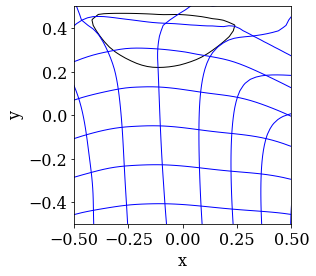

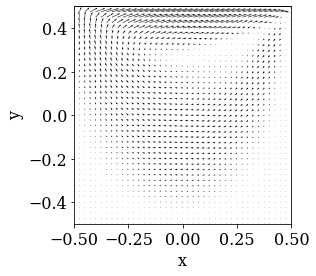

Level Set Advection Time:  0.004509687423706055
------------ Time = 4.800999999999938 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.2275802750650675e-13
Total poisson time : 0.00031638145446777344
Total INS time : 0.0036630630493164062
Max, Min, U   : 2.0, -0.1781941278056264
Max, Min, V   : 0.35102558309730914, -0.4394502621557905
Max, Min, P   : -23.52672736037016, -25.49029461109823
Max, Min, DIV : 3.552713678800501e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0049440860748291016
------------ Time = 4.801999999999938 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.824387692524123e-14
Total poisson time : 0.00025177001953125
Total INS time : 0.004305362701416016
Max, Min, U   : 2.0, -0.17817601438094968
Max, Min, V   : 0.35098963804062033, -0.43941102002709426
Max, Min, P   : -23.52517700483043, -25.488757162468417
Max, Min, DIV : 3.1086244689504383e-15, -4.274358644806853e-15

Level Set Advection Time:  0.0049855709075927734
------------ Time = 4.823999999999946 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.470478327867469e-15
Total poisson time : 0.0002372264862060547
Total INS time : 0.004107475280761719
Max, Min, U   : 2.0, -0.17778268282604903
Max, Min, V   : 0.3506339446670092, -0.43874098789916927
Max, Min, P   : -23.491187168990983, -25.450410001315287
Max, Min, DIV : 3.9968028886505635e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004786491394042969
------------ Time = 4.824999999999946 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.184498638642505e-13
Total poisson time : 0.00023674964904785156
Total INS time : 0.0039899349212646484
Max, Min, U   : 2.0, -0.17776525452351766
Max, Min, V   : 0.3506447241249251, -0.438712174778433
Max, Min, P   : -23.48304645993339, -25.44203137063902
Max, Min, DIV : 3.747002708109903e-15, -3.851086116668512e-15



Level Set Advection Time:  0.007957696914672852
------------ Time = 4.847999999999954 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.842060473632806e-13
Total poisson time : 0.0005450248718261719
Total INS time : 0.007949590682983398
Max, Min, U   : 2.0, -0.1773641109604636
Max, Min, V   : 0.35104888705171317, -0.4378964414698292
Max, Min, P   : -23.454996621055972, -25.407932142458197
Max, Min, DIV : 4.107825191113079e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004610300064086914
------------ Time = 4.848999999999954 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7012097977162864e-13
Total poisson time : 0.00023221969604492188
Total INS time : 0.0033986568450927734
Max, Min, U   : 2.0, -0.17734664231157166
Max, Min, V   : 0.35106515628123924, -0.43785452888758153
Max, Min, P   : -23.459458230294, -25.412191993548362
Max, Min, DIV : 4.107825191113079e-15, -4.163336342344337e-

Level Set Advection Time:  0.004416942596435547
------------ Time = 4.869999999999961 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.485371871474659e-13
Total poisson time : 0.0002319812774658203
Total INS time : 0.00429224967956543
Max, Min, U   : 2.0, -0.17698298559483266
Max, Min, V   : 0.3513935116821946, -0.43697986625790103
Max, Min, P   : -23.37749155530393, -25.327539965074017
Max, Min, DIV : 3.552713678800501e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004347801208496094
------------ Time = 4.870999999999961 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.51316279593956e-13
Total poisson time : 0.00022983551025390625
Total INS time : 0.0038285255432128906
Max, Min, U   : 2.0, -0.17696584431524764
Max, Min, V   : 0.3514081238444111, -0.436938450217043
Max, Min, P   : -23.387342650888005, -25.33722659788628
Max, Min, DIV : 4.107825191113079e-15, -3.7192471324942744e-15
Qi



Level Set Advection Time:  0.00432586669921875
------------ Time = 4.893999999999969 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.654642693639634e-13
Total poisson time : 0.00023365020751953125
Total INS time : 0.00422215461730957
Max, Min, U   : 2.0, -0.17657533944056686
Max, Min, V   : 0.3516852200012642, -0.4359627665899345
Max, Min, P   : -23.41807864166035, -25.363496274238827
Max, Min, DIV : 3.774758283725532e-15, -3.2751579226442118e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0047550201416015625
------------ Time = 4.894999999999969 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.872301719814234e-13
Total poisson time : 0.00023102760314941406
Total INS time : 0.003648042678833008
Max, Min, U   : 2.0, -0.17655899232983424
Max, Min, V   : 0.35180547484353714, -0.4359190561491248
Max, Min, P   : -23.39880412661668, -25.34407440444471
Max, Min, DIV : 3.4416913763379853e-15, -3.802513859341161e-1

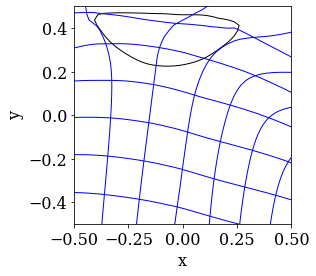

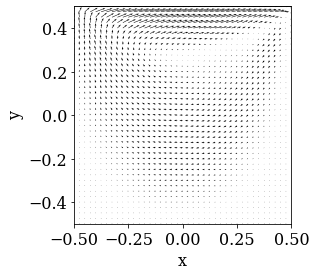

Level Set Advection Time:  0.004590272903442383
------------ Time = 4.900999999999971 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.720187704730871e-13
Total poisson time : 0.00035190582275390625
Total INS time : 0.0038933753967285156
Max, Min, U   : 2.0, -0.17646224896165397
Max, Min, V   : 0.352503398169095, -0.43565538481893035
Max, Min, P   : -23.359606388143952, -25.303009625238428
Max, Min, DIV : 4.163336342344337e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043675899505615234
------------ Time = 4.901999999999972 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.123145609561122e-13
Total poisson time : 0.00025844573974609375
Total INS time : 0.004143714904785156
Max, Min, U   : 2.0, -0.1764463493799567
Max, Min, V   : 0.3526161296961065, -0.43561127346902745
Max, Min, P   : -23.35429110353078, -25.297381133772536
Max, Min, DIV : 3.4416913763379853e-15, -3.9968028886505635e

Level Set Advection Time:  0.004900932312011719
------------ Time = 4.923999999999979 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2723333627834016e-13
Total poisson time : 0.00023031234741210938
Total INS time : 0.003475189208984375
Max, Min, U   : 2.0, -0.17611168778038633
Max, Min, V   : 0.35489564859005357, -0.43463773504441167
Max, Min, P   : -23.443781581202522, -25.37960072022014
Max, Min, DIV : 3.885780586188048e-15, -3.4416913763379853e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004550933837890625
------------ Time = 4.924999999999979 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.841257738387348e-13
Total poisson time : 0.0002334117889404297
Total INS time : 0.003674745559692383
Max, Min, U   : 2.0, -0.17609719983273223
Max, Min, V   : 0.3549924950224068, -0.4345942010098185
Max, Min, P   : -23.46386944343875, -25.39935193693124
Max, Min, DIV : 3.622102617839573e-15, -3.913536161803677e-15

Level Set Advection Time:  0.0048792362213134766
------------ Time = 4.946999999999987 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.923257901649791e-13
Total poisson time : 0.000232696533203125
Total INS time : 0.0040929317474365234
Max, Min, U   : 2.0, -0.17579423625438717
Max, Min, V   : 0.3571402659869, -0.43370795923753924
Max, Min, P   : -23.53417600178139, -25.46071192398791
Max, Min, DIV : 3.552713678800501e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004518985748291016
------------ Time = 4.947999999999987 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.9532258809702647e-13
Total poisson time : 0.00023221969604492188
Total INS time : 0.003930091857910156
Max, Min, U   : 2.0, -0.1757811368643788
Max, Min, V   : 0.35724770823710605, -0.4336798820602623
Max, Min, P   : -23.542118594701595, -25.468297768402454
Max, Min, DIV : 3.9968028886505635e-15, -4.246603069191224e-15




Level Set Advection Time:  0.004526376724243164
------------ Time = 4.970999999999995 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3608701578562387e-12
Total poisson time : 0.00023102760314941406
Total INS time : 0.004172325134277344
Max, Min, U   : 2.0, -0.17552611025516354
Max, Min, V   : 0.3594999376141482, -0.4328817604600912
Max, Min, P   : -23.474673318232796, -25.39338097551834
Max, Min, DIV : 4.218847493575595e-15, -3.83026943495679e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0044422149658203125
------------ Time = 4.971999999999995 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.597817817070531e-14
Total poisson time : 0.00023102760314941406
Total INS time : 0.004081249237060547
Max, Min, U   : 2.0, -0.17551571711076167
Max, Min, V   : 0.35958359660513745, -0.43283911938619357
Max, Min, P   : -23.473012860589602, -25.391404812691274
Max, Min, DIV : 3.774758283725532e-15, -3.747002708109903

Level Set Advection Time:  0.004552125930786133
------------ Time = 4.994000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.269390887855716e-13
Total poisson time : 0.0002372264862060547
Total INS time : 0.0045354366302490234
Max, Min, U   : 2.0, -0.17530253103467433
Max, Min, V   : 0.3613287512862822, -0.4317676716134752
Max, Min, P   : -23.383473729705912, -25.293050011657627
Max, Min, DIV : 4.052314039881821e-15, -4.0245584642661925e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004409313201904297
------------ Time = 4.995000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.545749446236524e-13
Total poisson time : 0.00023555755615234375
Total INS time : 0.004019498825073242
Max, Min, U   : 2.0, -0.17529373972116777
Max, Min, V   : 0.36141134221141813, -0.4317126079620615
Max, Min, P   : -23.38779590666266, -25.296965000006452
Max, Min, DIV : 3.885780586188048e-15, -4.066191827689636e-1

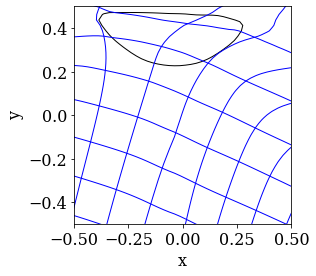

In [4]:
while scalars.time <= scalars.tmax:

    ins.advance()

    imbound.advect()

    # Display stats
    if scalars.nstep % 1 == 0:
        print("Level Set Advection Time: ", imbound._advection_time)
        flowx.io.display_stats(scalars)

    if scalars.nstep % 100 == 0:
        flowx.io.plot_vector(gridx, gridy, "velc")
        flowx.io.plot_contour(
            gridc, "ibmf", auxvars=["ibmx", "ibmy"], scalars=scalars, levels=[0]
        )

    scalars.advance()

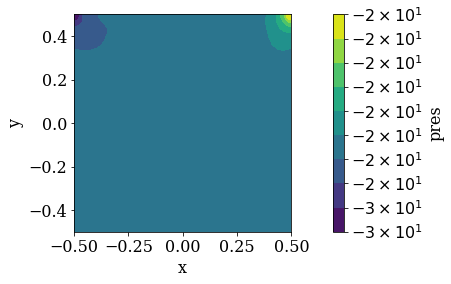

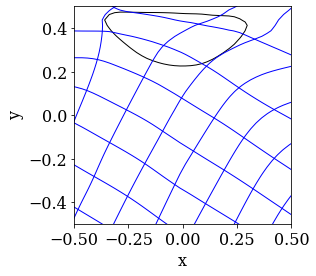

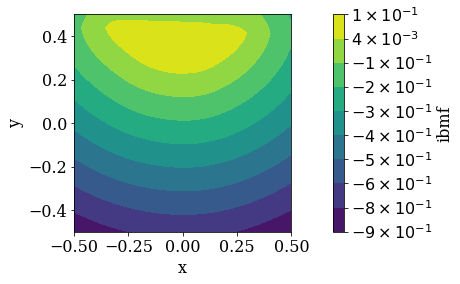

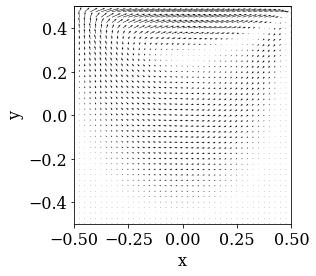

In [5]:
flowx.io.plot_contour(gridc, "pres")
flowx.io.plot_contour(
    gridc, "ibmf", auxvars=["ibmx", "ibmy"], scalars=scalars, levels=[0]
)
flowx.io.plot_contour(gridc, "ibmf")
flowx.io.plot_vector(gridx, gridy, "velc")